<div class="alert alert-success" style="background-color: gray; color: white;">
    <center><h1>Machine Learning Final Project</h1></center><br>
    <center>2023/2024</center>
</div>

### Group number  45 - Registration

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |          Catarina Reis |     20230981       | 
| 2    |     Eduardo Costa   |      r20201536     | 
| 3    |     Guilherme Curioso  |    20230558        | 
|4|     Mariana Cabral                       |       20230532            |
|5|                Tomás Castilho           |        20230518            |

**<h3>Table of Contents</h3>**
* [1. Data Exploration](#dataexploration)
    * [1.1 Imports](#imports)
    * [1.2 Loading Data](#loadingdata)
    * [1.3 Initial Analysis](#initialanalysis)
        * [1.3.1 Undesirable Characters](#undesirablecharacters)
        * [1.3.2 Types](#types)
        * [1.3.3 Missing Values](#missingvalues)
        * [1.3.4 Duplicate Records](#duplicaterecords)
        * [1.3.5 Data Statistics](#datastatistics)
    * [1.4 Visual Analysis](#visualanalysis)
        * [1.4.1 Categorical Variables Exploration](#categoricalvariablesexploration)
        * [1.4.2 Numerical Variables Exploration](#numericalvariablesexploration)
* [2. Data Preparation and Preprocessing](#datapreprocessing)
    *  [2.1 Coherence Checking](#coherence)
    *  [2.2 Feature Engineering](#featureengineering)
    *  [2.3 Splitting the Data ](#splitting)
    *  [2.4 Outlier Removal](#outlierremoval)
        * [2.4.1 Inter Quartile Range](#iqr)
        * [2.4.2 Z-score](#z-score)
        * [2.4.3 Manually ](#manually)
        * [2.4.4 Both 3 ](#both3)
    *  [2.5 Scaling the Data](#scaling)
    *  [2.6 Treating Missing Values](#treatingmissingvalues)
    *  [2.7 Encoding the Data](#encoding)
         * [2.7.1 Nominal Variables](#nominal)
         * [2.7.2 Ordinal Variables](#ordinal)
         * [2.7.3 Targets](#targets)
    *  [2.8 Feature Selection Binary Target](#featureselection-bin)
         * [2.8.1 Numerical Variables](#bin-numerical)
         * [2.8.2 Categorical Variables](#bin-categorical)
         * [2.8.3 Both](#bin-both)
         * [2.8.4 Feature Selection Results ](#bin-results)
    *  [2.9 Feature Selection Multiclass Target](#featureselection-multiclass)
         * [2.9.1 Numerical Variables](#mult-numerical)
         * [2.9.2 Categorical Variables](#mult-categorical)
         * [2.9.3 Both](#mult-both)
         * [2.9.4 Feature Selection Results ](#mult-results)     
* [3. Modeling](#modeling)
    *  [3.1 Set-up](#set-up)
    *  [3.2 Modeling for Binary Target ](#bin-model)
        *  [3.2.1 Simple Models (without SMOTE)](#bin-without)
        *  [3.2.2 Models with SMOTE](#bin-with)
        *  [3.2.3 Optimization: 3 best ](#bin-optimization3best)
        *  [3.2.4 Optimization: Other Models ](#bin-optimizationother)

    *  [3.3 Modeling for Multiclass Target ](#mult-model)
        *  [3.3.1 Simple Models (without SMOTE)](#mult-without)
        *  [3.3.2 Models with SMOTE](#mult-with)
        *  [3.2.3 Optimization: 3 best ](#mult-optimization3best)
        *  [3.3.4 Optimization: Other Models ](#mult-optimizationother)
    
    *  [3.4 Extra: HistGradientBoosting ](#extra-model)   
        *  [3.4.1 Binary Target ](#binhgb)
        *  [3.4.2 Multiclass Target](#multhgb)
* [4. Deployment- Test Dataset](#d-teste)   

     </li>
</ul>


## 1.Data Exploration</font><div id="dataexploration"></div>

### 1.1 Imports <a class="anchor" id="imports"></a>

In [207]:
import pandas as pd
import numpy as np

# ---data partition
from sklearn.model_selection import train_test_split

# ---data transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter


#-- outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

# --feature selection
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2


#--visualization
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import ceil
import matplotlib.patches as mpatches
import graphviz
import pydotplus


#--models
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV, 
    RepeatedStratifiedKFold
)

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import (
    AdaBoostClassifier, 
    RandomForestClassifier,
    HistGradientBoostingClassifier
)

#-- assessment
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
import time


#-- warnings
import warnings

### 1.2 Loading Data <a class="anchor" id="loadingdata"></a>

In [208]:
# Reading the data
train_original= pd.read_csv('train.csv', delimiter=',')

In [209]:
train = train_original.copy()

**Note:** *Patient ID !=Encounter ID*<br>
The Patient ID is used to identify and track individual patients over time, while the Encounter ID is used to identify and organize data for each separate healthcare visit or admission that a patient undergoes. 








**Why is the encounter_id as index and not the patient_id?**  We could have more than one visit for a certain patient, but each visit is unique: <br>

The same patient visit different times
* train_original.patient_id.isnull().sum()=0
* train_original.patient_id.count()=71236 
* train_original.patient_id.nunique() =53985
* train_original.patient_id.duplicated().sum()=17251


Each visit is unique
* train.encounter_id.nunique() = 71236

In [210]:
train.set_index('encounter_id',inplace=True)
train.head()

country  patient_id             race  gender      age weight  \
encounter_id                                                                
533253           USA       70110        Caucasian  Female  [70-80)      ?   
426224           USA    29775006  AfricanAmerican    Male  [50-60)      ?   
634063           USA    80729253        Caucasian  Female  [60-70)      ?   
890610           USA     2919042  AfricanAmerican    Male  [60-70)      ?   
654194           USA    84871971        Caucasian  Female  [70-80)      ?   

             payer_code  outpatient_visits_in_previous_year  \
encounter_id                                                  
533253                ?                                   0   
426224                ?                                   0   
634063                ?                                   0   
890610               MC                                   0   
654194               HM                                   1   

              emergency_visits_in_previous_year  \
encounter_id                                      
533253                                        0   
426224                                        0   
634063                                        0   
890610                                        0   
654194                                        0   

              inpatient_visits_in_previous_year  ... secondary_diagnosis  \
encounter_id                                     ...                       
533253                                        2  ...                 276   
426224                                        0  ...                 785   
634063                                        1  ...                 135   
890610                                        1  ...                 562   
654194                                        0  ...                 599   

             additional_diagnosis  number_diagnoses glucose_test_result  \
encounter_id                                                              
533253                        466                 8                 NaN   
426224                        162                 9                 NaN   
634063                        250                 6                 NaN   
890610                        455                 5                 NaN   
654194                        428                 9                 NaN   

             a1c_test_result  change_in_meds_during_hospitalization  \
encounter_id                                                          
533253                   NaN                                     No   
426224                   NaN                                     No   
634063                   NaN                                     Ch   
890610                   NaN                                     No   
654194                   NaN                                     No   

              prescribed_diabetes_meds                  medication  \
encounter_id                                                         
533253                              No                          []   
426224                             Yes                 ['insulin']   
634063                             Yes  ['glimepiride', 'insulin']   
890610                              No                          []   
654194                              No                          []   

              readmitted_binary readmitted_multiclass  
encounter_id                                           
533253                       No              >30 days  
426224                       No                    No  
634063                       No                    No  
890610                       No                    No  
654194                       No              >30 days  

[5 rows x 30 columns]

### 1.3 Initial Analysis <a class="anchor" id="initialanalysis"></a>

In [211]:
# --- Print Dataset Info ---
print('\033[0m\033[90m*' * 20)
print('\033[1m' + '-> Dataset Info' + '\033[0m')
print('   Total Rows:', train.shape[0]) 
print( '   Total Columns:', train.shape[1])
print('\033[0m\033[90m*' * 20)

# --- Print Dataset Detail ---
print('\033[1m' + '-> Dataset Details' + '\033[0m')
train.info(memory_usage=False)


********************
-> Dataset Info
   Total Rows: 71236
   Total Columns: 30
********************
-> Dataset Details
<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   67682 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 71236 non-null  object
 6   payer_code                             71236 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_

#### 1.3.1 Undesireble characters <a class="anchor" id="undesirablecharacters"></a>

In [212]:
undesirable_chars = ["?", " "]
initial_count = train.isna().sum()

train.replace(undesirable_chars, np.nan, inplace=True)

replacements_count = train.isna().sum()-initial_count 
print('\033[1m' + '-> Undesirable Characters' + '\033[0m')
print(" Number of Undesirable Characters Replaced:\n" , replacements_count)

-> Undesirable Characters
 Number of Undesirable Characters Replaced:
 country                                      0
patient_id                                   0
race                                      1516
gender                                       0
age                                          0
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                               0
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                        0
admission_source                             0
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                   

In [213]:
# --- Print Dataset Detail ---
print('\033[1m' + '-> Dataset Details' + '\033[0m')
train.info(memory_usage=False)

-> Dataset Details
<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   66166 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 2246 non-null   object
 6   payer_code                             43035 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object


#### 1.3.2 Types <a class="anchor" id="types"></a>

In [214]:
# Dataset data types
train.dtypes

country                                  object
patient_id                                int64
race                                     object
gender                                   object
age                                      object
weight                                   object
payer_code                               object
outpatient_visits_in_previous_year        int64
emergency_visits_in_previous_year         int64
inpatient_visits_in_previous_year         int64
admission_type                           object
medical_specialty                        object
average_pulse_bpm                         int64
discharge_disposition                    object
admission_source                         object
length_of_stay_in_hospital                int64
number_lab_tests                          int64
non_lab_procedures                        int64
number_of_medications                     int64
primary_diagnosis                        object
secondary_diagnosis                     

**Problems:**<br>   
**1)** `race` & `payer_code`& `medical_specialty` &`discharge_disposition` => object must be a string, but we will only convert it after fixing the missing values
   
**2)** `gender` & `admission_type` => object must be a string.<br>
   * **2.1:**  train.gender.unique() = array(['Female', 'Male', 'Unknown/Invalid'], dtype=object) => 'Unknown/Invalid'  it´s like a NA? It´s just 3 observations! Or it´s a 3rd gender? all of the 3 observations have the same value in both our targets (check: train.loc[train.gender=='Unknown/Invalid'][["readmitted_binary","readmitted_multiclass"]])
   
   * **2.2:**  train.admission_type.unique() = array(['Emergency', nan, 'Elective', 'Urgent', 'Not Available', 'Newborn','Not Mapped', 'Trauma Center'], dtype=object)
       + 'Not Available' it´s like a NA, because it represents a lack of information
       + 'Not Mapped' <=> other category that didn't match the standard ==> stays like that
   * **2.3:**  train.admission_source.unique() = array([' Emergency Room', 'Clinic Referral', nan,' Transfer from another health care facility',' Physician Referral', 'Transfer from a hospital', 'HMO Referral',' Transfer from a Skilled Nursing Facility (SNF)', ' Not Mapped',' Not Available', ' Court/Law Enforcement',' Transfer from hospital inpt/same fac reslt in a sep claim',' Transfer from critial access hospital', ' Extramural Birth','Normal Delivery', ' Transfer from Ambulatory Surgery Center',' Sick Baby'], dtype=object)
       + 'Not Available' it´s like a NA, because it represents a lack of information
       + 'Not Mapped' <=> other category that didn't match the standard ==> stays like that
   <br>
   
**3)** `age` & `weight` => object we will treat it like a  categorical ordinal<br>
    * **3.1:**  train.age.unique()= array(['[70-80)', '[50-60)', '[60-70)', '[80-90)', nan, '[40-50)','[20-30)', '[30-40)', '[90-100)', '[10-20)', '[0-10)'],dtype=object)<br>
    * **3.2:**  train.weight.unique()=   array([nan, '[50-75)', '[100-125)', '[75-100)', '[125-150)', '[25-50)', '>200', '[0-25)', '[150-175)', '[175-200)'], dtype=object)

**4)** `primary_diagnosis`& `secondary_diagnosis` & `additional_diagnosis` => object that should stay like that because it has numbers and sometimes numbers mixed with characters 

**5)** `change_in_meds_during_hospitalization` & `prescribed_diabetes_meds` => object that should be encoded as a binnary

**6)** `patient_id`=> integer but it corresponds to a number that identifies a patient, we will treat it as a category and not a number to compute the distance, so we convert it into a string

**7)**  `glucose_test_result`& `a1c_test_result`=> object we will treat it like a  categorical ordinal and has no class none<br> 
 *  **7.1:** train.glucose_test_result.unique()=array([nan, '>300', 'Norm', '>200'],dtype=object)
   The class “none” if not measured it´s not in the values => corresponds to the missing data

* **7.2:** train.a1c_test_result.unique()=array([nan, 'Norm', '>8', '>7'], dtype=object)
<br>The class “none” if not measured it´s not in the values => corresponds to the missing data

In [215]:
#2.1  
#Let´s try to change the 3rd gender to an NA, but keep in mind the influence on the targets:
#train.loc[train.gender=='Unknown/Invalid'][["readmitted_binary","readmitted_multiclass"]]

#train.gender.unique() = array(['Female', 'Male', 'Unknown/Invalid']
train.gender.replace("Unknown/Invalid" , np.nan , inplace=True)
train.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [216]:
#2.2
#train.admission_type.unique()= array(['Emergency', nan, 'Elective', 'Urgent', 'Not Available', 'Newborn','Not Mapped', 'Trauma Center'], dtype=object)
train.admission_type.replace("Not Available" , np.nan , inplace=True)
train.admission_type.unique()

array(['Emergency', nan, 'Elective', 'Urgent', 'Newborn', 'Not Mapped',
       'Trauma Center'], dtype=object)

In [217]:
#2.3
#train.admission_type.unique()
train.admission_source.replace(" Not Available" , np.nan , inplace=True)
train.admission_source.unique()

array([' Emergency Room', 'Clinic Referral', nan,
       ' Transfer from another health care facility',
       ' Physician Referral', 'Transfer from a hospital', 'HMO Referral',
       ' Transfer from a Skilled Nursing Facility (SNF)', ' Not Mapped',
       ' Court/Law Enforcement',
       ' Transfer from hospital inpt/same fac reslt in a sep claim',
       ' Transfer from critial access hospital', ' Extramural Birth',
       'Normal Delivery', ' Transfer from Ambulatory Surgery Center',
       ' Sick Baby'], dtype=object)

In [218]:
#6) fiz isto pq depois ia dar problemas par ver as estatísticas das categóricas
train['patient_id'] = train['patient_id'].astype(str)

In [219]:
#7.1
#train.glucose_test_result.unique()=array([nan, '>300', 'Norm', '>200'], dtype=object)
train.glucose_test_result.replace(np.nan, "None", inplace=True)
train.glucose_test_result.unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [220]:
#7.2
#train.a1c_test_result.unique()= array([nan, 'Norm', '>8', '>7'], dtype=object)
train.a1c_test_result.replace(np.nan, "None", inplace=True)
train.a1c_test_result.unique()

array(['None', 'Norm', '>8', '>7'], dtype=object)

#### 1.3.3 Missing Values <a class="anchor" id="missingvalues"></a>

In [221]:
# Count of missing values
a=train.isnull().sum()
# % of missing values
missing_percentage=(a/train.isnull().count())*100

In [222]:
missing_data = pd.DataFrame({'Missings values': a.sort_values(ascending=False), '% Missing values': missing_percentage.sort_values(ascending=False)})
missing_data= missing_data[missing_data["Missings values"]!=0]
print("\033[1m-> Missing data:\033[0m")
missing_data

-> Missing data:


Missings values  % Missing values
weight                           68990         96.847100
medical_specialty                34922         49.022966
payer_code                       28201         39.588130
admission_type                    7026          9.862991
race                              5070          7.117188
admission_source                  4806          6.746589
age                               3557          4.993262
discharge_disposition             2590          3.635802
additional_diagnosis              1008          1.415015
secondary_diagnosis                262          0.367792
primary_diagnosis                   16          0.022461
gender                               3          0.004211

**Problems:**<br>
* **1)** `weight` => has less than 5% non-missing values so we decided to drop that variable
* **2)** `medical_specialty`==> has proxi 49% missing values

->  We should considered droping them!

#### 1.3.4 Duplicate Records <a class="anchor" id="duplicaterecords"></a>

In [223]:
# Duplicated observations
train.duplicated().sum()

0

#### 1.3.5 Data Statistics <a class="anchor" id="datastatistics"></a>

we decided to divide the variables into categories based on their characteristics or nature because I think it´s a good approach to perform a more specific and focused analysis. This can help me apply appropriate statistical and analytical techniques to each category, leading to more meaningful insights and results.<br>


| Metric (Continuous) Features          | Non-Metric (Categorical or Discrete) Features |
| ------------------------------------- | -------------------------------------------- |
| outpatient_visits_in_previous_year    | patient_id                               |
| emergency_visits_in_previous_year     | race                                         |
| inpatient_visits_in_previous_year     | gender                                       |
| average_pulse_bpm                     | payer_code                                   |
| length_of_stay_in_hospital            | admission_type                               |
| number_lab_tests                      | medical_specialty                            |
| non_lab_procedures                    | discharge_disposition                        |
| number_of_medications                 | admission_source                             |
| number_diagnoses                      | primary_diagnosis                            |
|                                       | secondary_diagnosis                          |
|                                       | additional_diagnosis                         |
|                                       | glucose_test_result                          |
|                                       | a1c_test_result                              |
|                                       | change_in_meds_during_hospitalization        |
|                                       | prescribed_diabetes_meds                     |
|                                       | medication                                   |
|                                       | age                                          |
|                                       | country                                          |
|                                       | weight                                       |
|                                      | readmitted_binary     
|                                       | readmitted_multiclass	                                          |

In [224]:
# All the numerical variables
numerical = [ "outpatient_visits_in_previous_year", "emergency_visits_in_previous_year", "inpatient_visits_in_previous_year", "average_pulse_bpm", "length_of_stay_in_hospital", "number_lab_tests", "non_lab_procedures", "number_of_medications", "number_diagnoses"]

# All the categorical variables
categorical = ['readmitted_multiclass','readmitted_binary','weight','country', 'age', 'medication', 'prescribed_diabetes_meds','change_in_meds_during_hospitalization','a1c_test_result','glucose_test_result','additional_diagnosis','secondary_diagnosis','primary_diagnosis','admission_source', 'discharge_disposition','medical_specialty','admission_type','payer_code','gender','race','patient_id']

##### **1) Numerical Variables**

In [225]:
train[numerical].describe().T

count       mean        std   min   25%  \
outpatient_visits_in_previous_year  71236.0   0.369588   1.287469   0.0   0.0   
emergency_visits_in_previous_year   71236.0   0.196249   0.910854   0.0   0.0   
inpatient_visits_in_previous_year   71236.0   0.640154   1.267271   0.0   0.0   
average_pulse_bpm                   71236.0  99.611222  23.040521  60.0  80.0   
length_of_stay_in_hospital          71236.0   4.391024   2.988739   1.0   2.0   
number_lab_tests                    71236.0  43.095654  19.642919   1.0  31.0   
non_lab_procedures                  71236.0   1.340923   1.706664   0.0   0.0   
number_of_medications               71236.0  15.995452   8.122347   1.0  10.0   
number_diagnoses                    71236.0   7.421023   1.937809   1.0   6.0   

                                      50%    75%    max  
outpatient_visits_in_previous_year    0.0    0.0   42.0  
emergency_visits_in_previous_year     0.0    0.0   76.0  
inpatient_visits_in_previous_year     0.0    1.0   21.0  
average_pulse_bpm                   100.0  119.0  139.0  
length_of_stay_in_hospital            4.0    6.0   14.0  
number_lab_tests                     44.0   57.0  121.0  
non_lab_procedures                    1.0    2.0    6.0  
number_of_medications                15.0   20.0   75.0  
number_diagnoses                      8.0    9.0   16.0

**Problems:** 
By looking into the distance between the mean and the median, and the max from the rest, may indicate outliers.<br> ->**Most critical cases:**
* outpatient_visits_in_previous_year
* emergency_visits_in_previous_year
* inpatient_visits_in_previous_year
* number_lab_tests
* number_of_medications
      

##### **2) Categorical Variables**

In [226]:
train[categorical].describe().T

count unique                 top   freq
readmitted_multiclass                  71236      3                  No  38405
readmitted_binary                      71236      2                  No  63286
weight                                  2246      9            [75-100)    933
country                                71236      1                 USA  71236
age                                    67679     10             [70-80)  17359
medication                             71236    303         ['insulin']  21715
prescribed_diabetes_meds               71236      2                 Yes  54890
change_in_meds_during_hospitalization  71236      2                  No  38326
a1c_test_result                        71236      4                None  59320
glucose_test_result                    71236      4                None  67548
additional_diagnosis                   70228    746                 250   8070
secondary_diagnosis                    70974    698                 276   4694
primary_diagnosis                      71220    686                 428   4776
admission_source                       66430     15      Emergency Room  40319
discharge_disposition                  68646     25  Discharged to home  42256
medical_specialty                      36314     68    InternalMedicine  10292
admission_type                         64210      6           Emergency  37742
payer_code                             43035     17                  MC  22683
gender                                 71233      2              Female  38228
race                                   66166      5           Caucasian  50693
patient_id                             71236  53985            88785891     33

In [227]:
train.readmitted_binary.value_counts(normalize="True")

readmitted_binary
No     0.888399
Yes    0.111601
Name: proportion, dtype: float64

In [228]:
train.readmitted_multiclass.value_counts(normalize="True")

readmitted_multiclass
No          0.539123
>30 days    0.349276
<30 days    0.111601
Name: proportion, dtype: float64

**Problems**:Considering that all patients are from the **USA**, the 'country' feature will be dropped as it added no meaningful variation. 

>Considering that all patients are from the **USA**, the 'country' feature will be dropped as it added no meaningful variation.
> Notably, the dataset reveals that the majority of patients are of **Caucasian race**, with the most common age bracket falling between **70-80 years**. We can also see that the majority of the patients are **woman**, representing 53.7% of our patients.

> Patients, on average, experienced 0.64 hospital stays for extended care, 0.20 sudden health emergencies, and 0.37 brief medical check-ins before their hospital encounters.

> The prevalence of 'Emergency' as the dominant **admission type** (37,742 occurrences) highlights the high frequency of urgent healthcare encounters within our dataset. This insight underscores the importance of considering the urgency and context of admissions, especially in the context of predicting readmissions. 

> In our dataset, 'medical_specialty' reflects the variety of medical fields where patients were admitted, with **'Internal Medicine'** as the most frequent specialty (10,292 occurrences among 68 specialties).

> Examining **pulse rates during hospital stays** (average of 99.49 bpm) for 71,236 encounters, we note variations from 60.0 to 139.0 bpm. This insight is especially relevant in the context of diabetes, where monitoring cardiac health is essential for patient well-being and readmission prediction.

> In the dataset, the 'number_of_medications' feature reflects the **diversity in medication prescriptions**. On average, patients are prescribed around 16 distinct medications. However, there is a considerable variation, with some patients receiving as few as 1 and others as many as 75 different medications.

In [229]:
columns_of_interest = [
    'race', 'gender', 'age', 'weight', 'payer_code', 'admission_type',
    'medical_specialty', 'discharge_disposition', 'admission_source',
    'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',
    'glucose_test_result', 'a1c_test_result',
    'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
    'medication', 'readmitted_binary', 'readmitted_multiclass'
]

dfs = {}  # Dictionary to store individual DataFrames

for column in columns_of_interest:
    value_counts_df = pd.DataFrame({column: train[column].value_counts()})
    dfs[column] = value_counts_df

# Print all DataFrames sequentially
for column, value_counts_df in dfs.items():
    print(f"\nDataFrame for {column}:\n")
    print(value_counts_df)
    print("=" * 50)  # Separating each DataFrame with a line



DataFrame for race:

                  race
race                  
Caucasian        50693
AfricanAmerican  12693
Hispanic          1364
Other              995
Asian              421

DataFrame for gender:

        gender
gender        
Female   38228
Male     33005

DataFrame for age:

            age
age            
[70-80)   17359
[60-70)   14908
[80-90)   11510
[50-60)   11423
[40-50)    6418
[30-40)    2536
[90-100)   1875
[20-30)    1071
[10-20)     474
[0-10)      105

DataFrame for weight:

           weight
weight           
[75-100)      933
[50-75)       636
[100-125)     449
[125-150)      96
[25-50)        67
[0-25)         35
[150-175)      21
[175-200)       7
>200            2

DataFrame for payer_code:

            payer_code
payer_code            
MC               22683
HM                4319
SP                3541
BC                3292
MD                2484
CP                1762
UN                1733
CM                1347
OG                 729
PO               

### 1.4 Visual Analysis <a class="anchor" id="visualanalysis"></a>

#### 1.4.1 Categorical Variables Exploration <a class="anchor" id="categoricalvariablesexploration"></a>

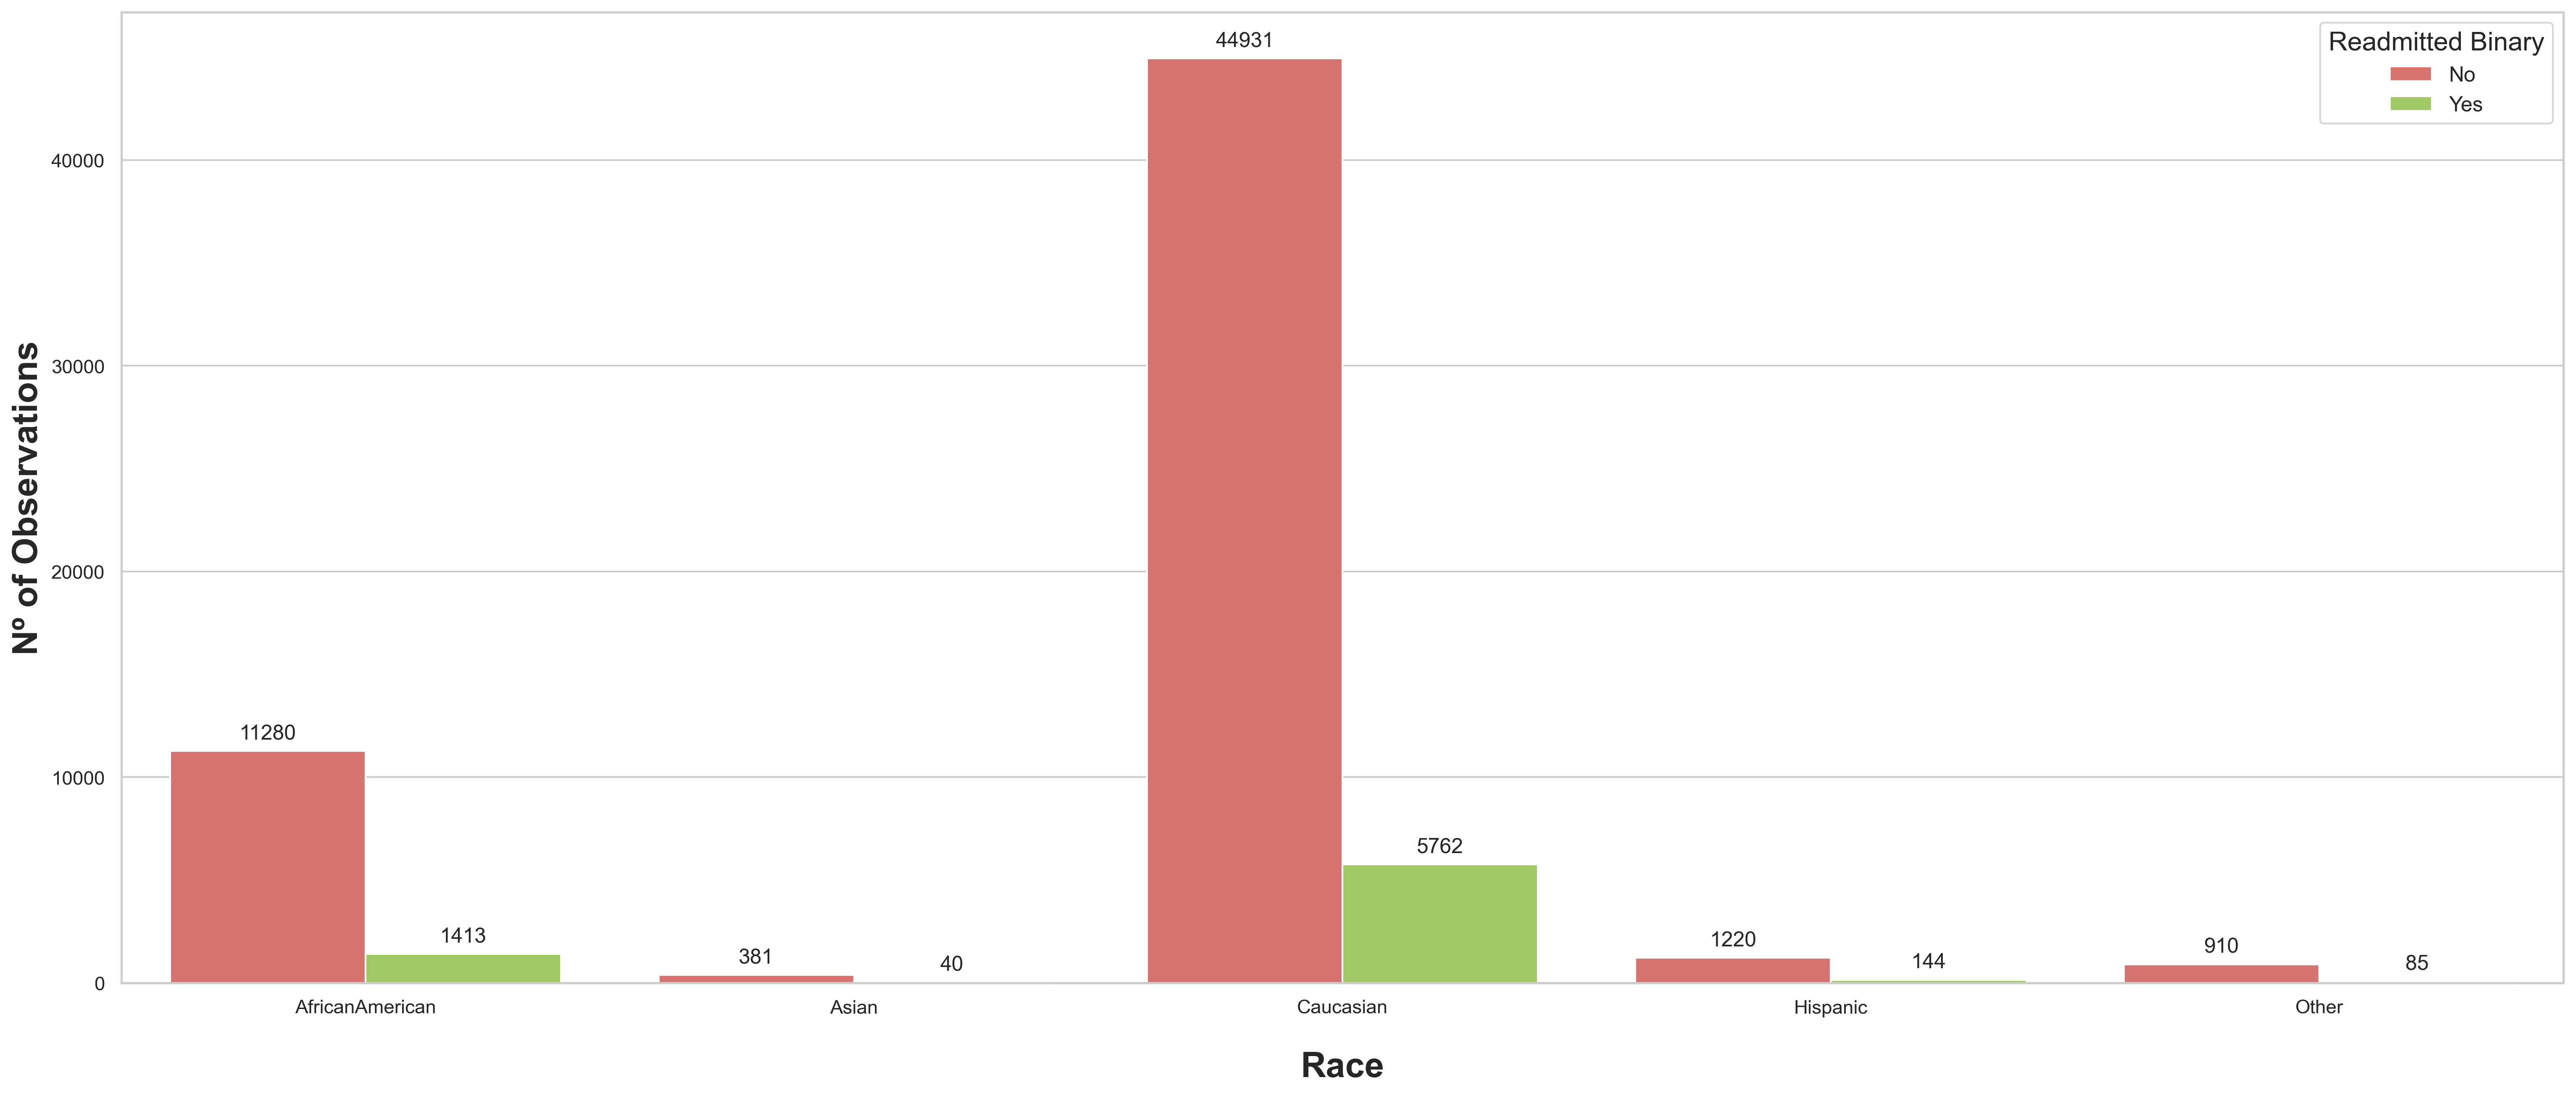

readmitted_binary     No   Yes  Total       No %      Yes %
race                                                       
AfricanAmerican    11280  1413  12693  88.867880  11.132120
Asian                381    40    421  90.498812   9.501188
Caucasian          44931  5762  50693  88.633539  11.366461
Hispanic            1220   144   1364  89.442815  10.557185
Other                910    85    995  91.457286   8.542714


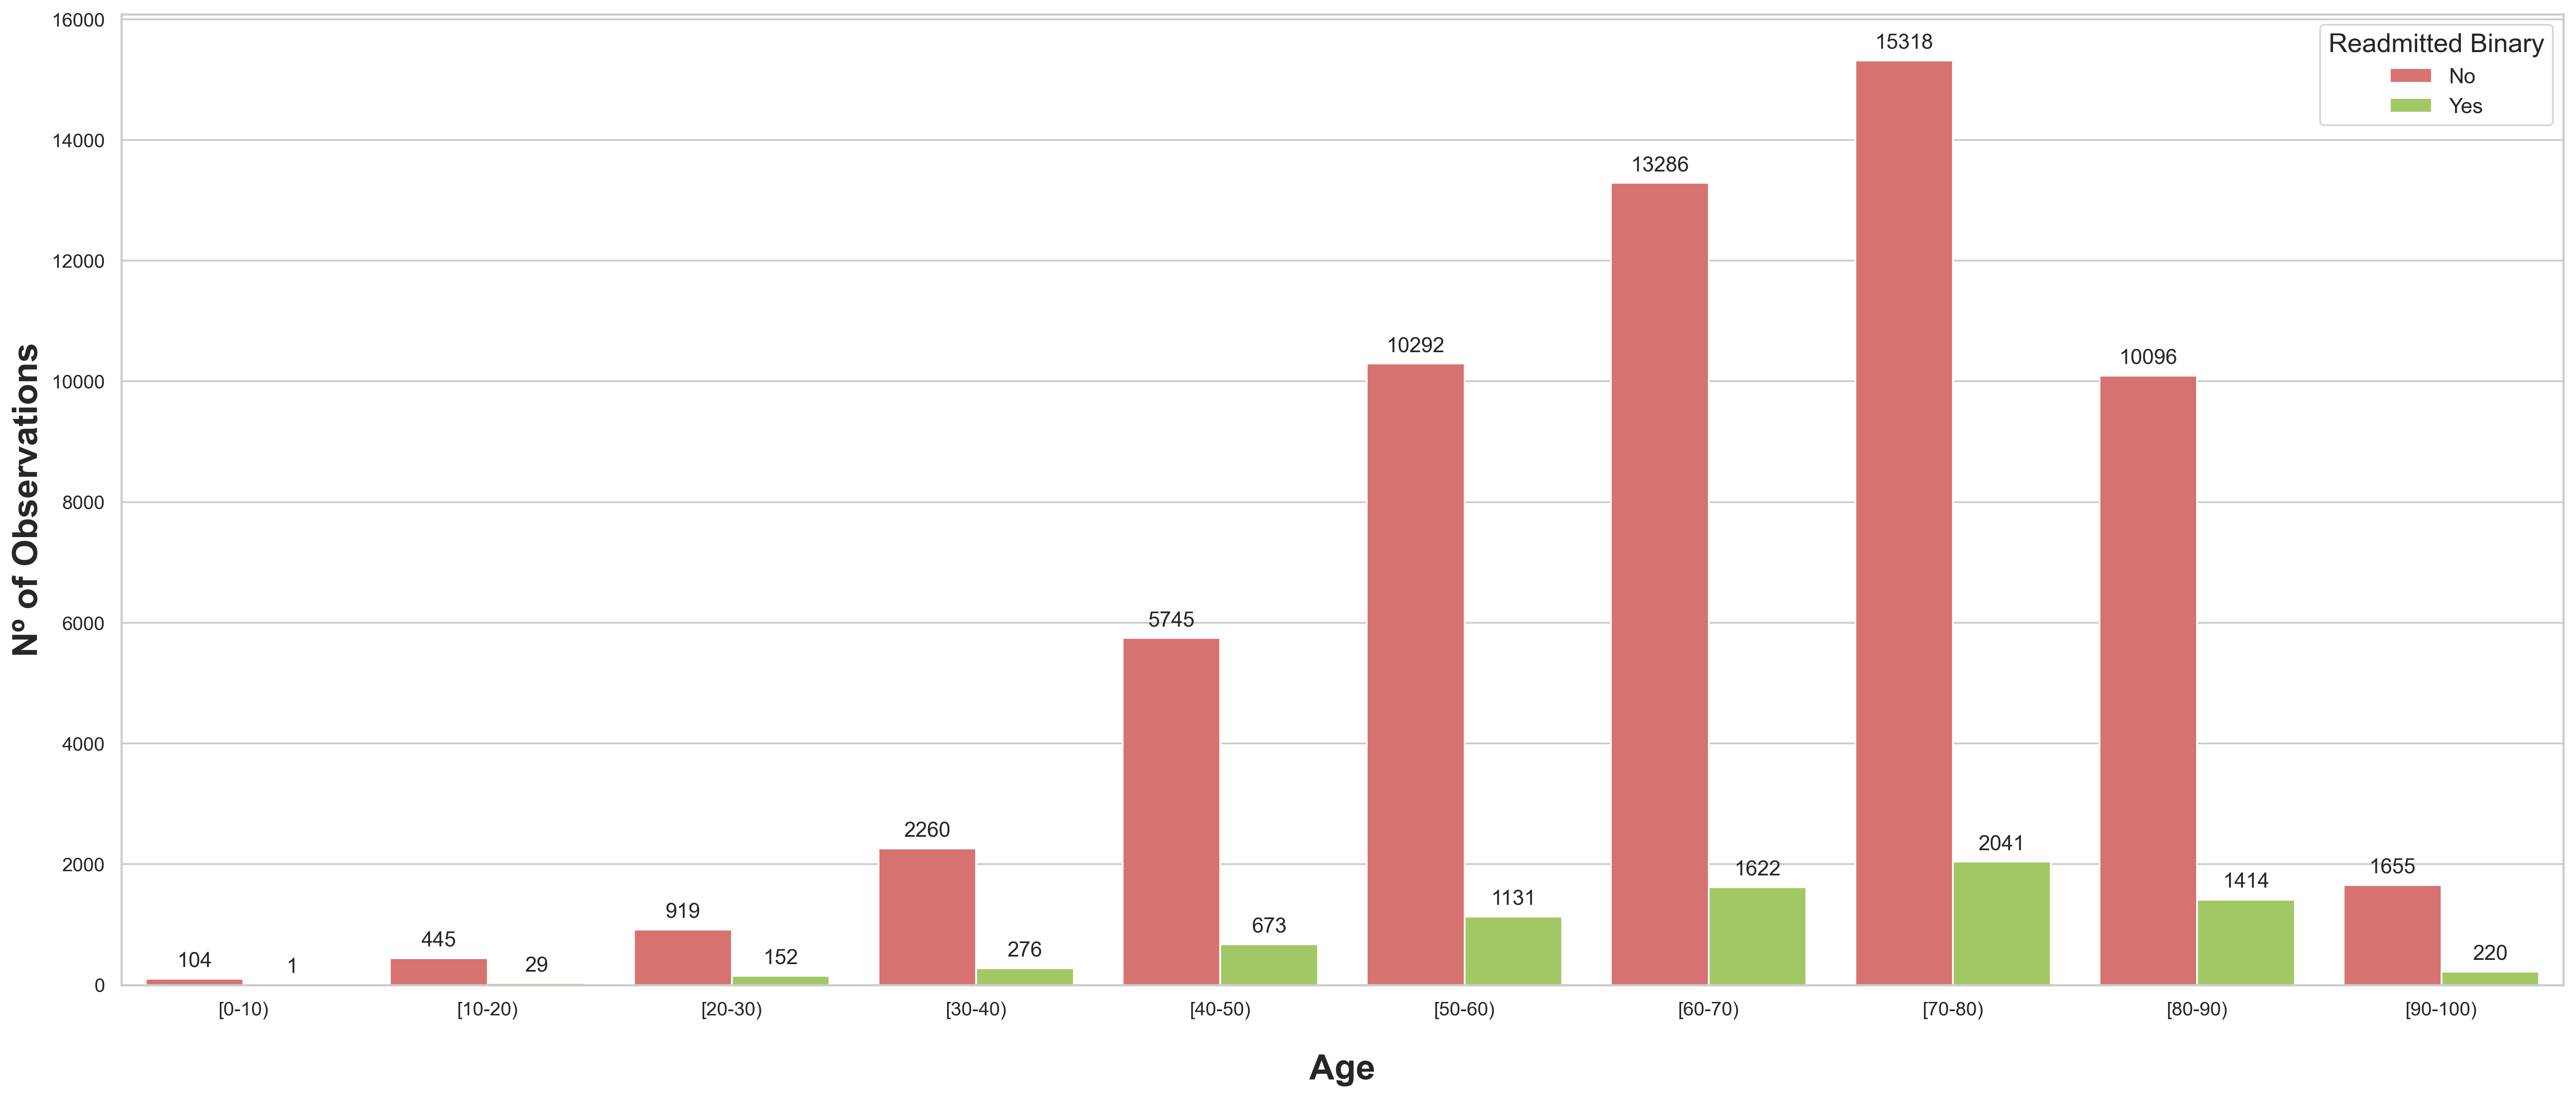

readmitted_binary     No   Yes  Total       No %      Yes %
age                                                        
[0-10)               104     1    105  99.047619   0.952381
[10-20)              445    29    474  93.881857   6.118143
[20-30)              919   152   1071  85.807656  14.192344
[30-40)             2260   276   2536  89.116719  10.883281
[40-50)             5745   673   6418  89.513867  10.486133
[50-60)            10292  1131  11423  90.098923   9.901077
[60-70)            13286  1622  14908  89.119936  10.880064
[70-80)            15318  2041  17359  88.242410  11.757590
[80-90)            10096  1414  11510  87.715030  12.284970
[90-100)            1655   220   1875  88.266667  11.733333


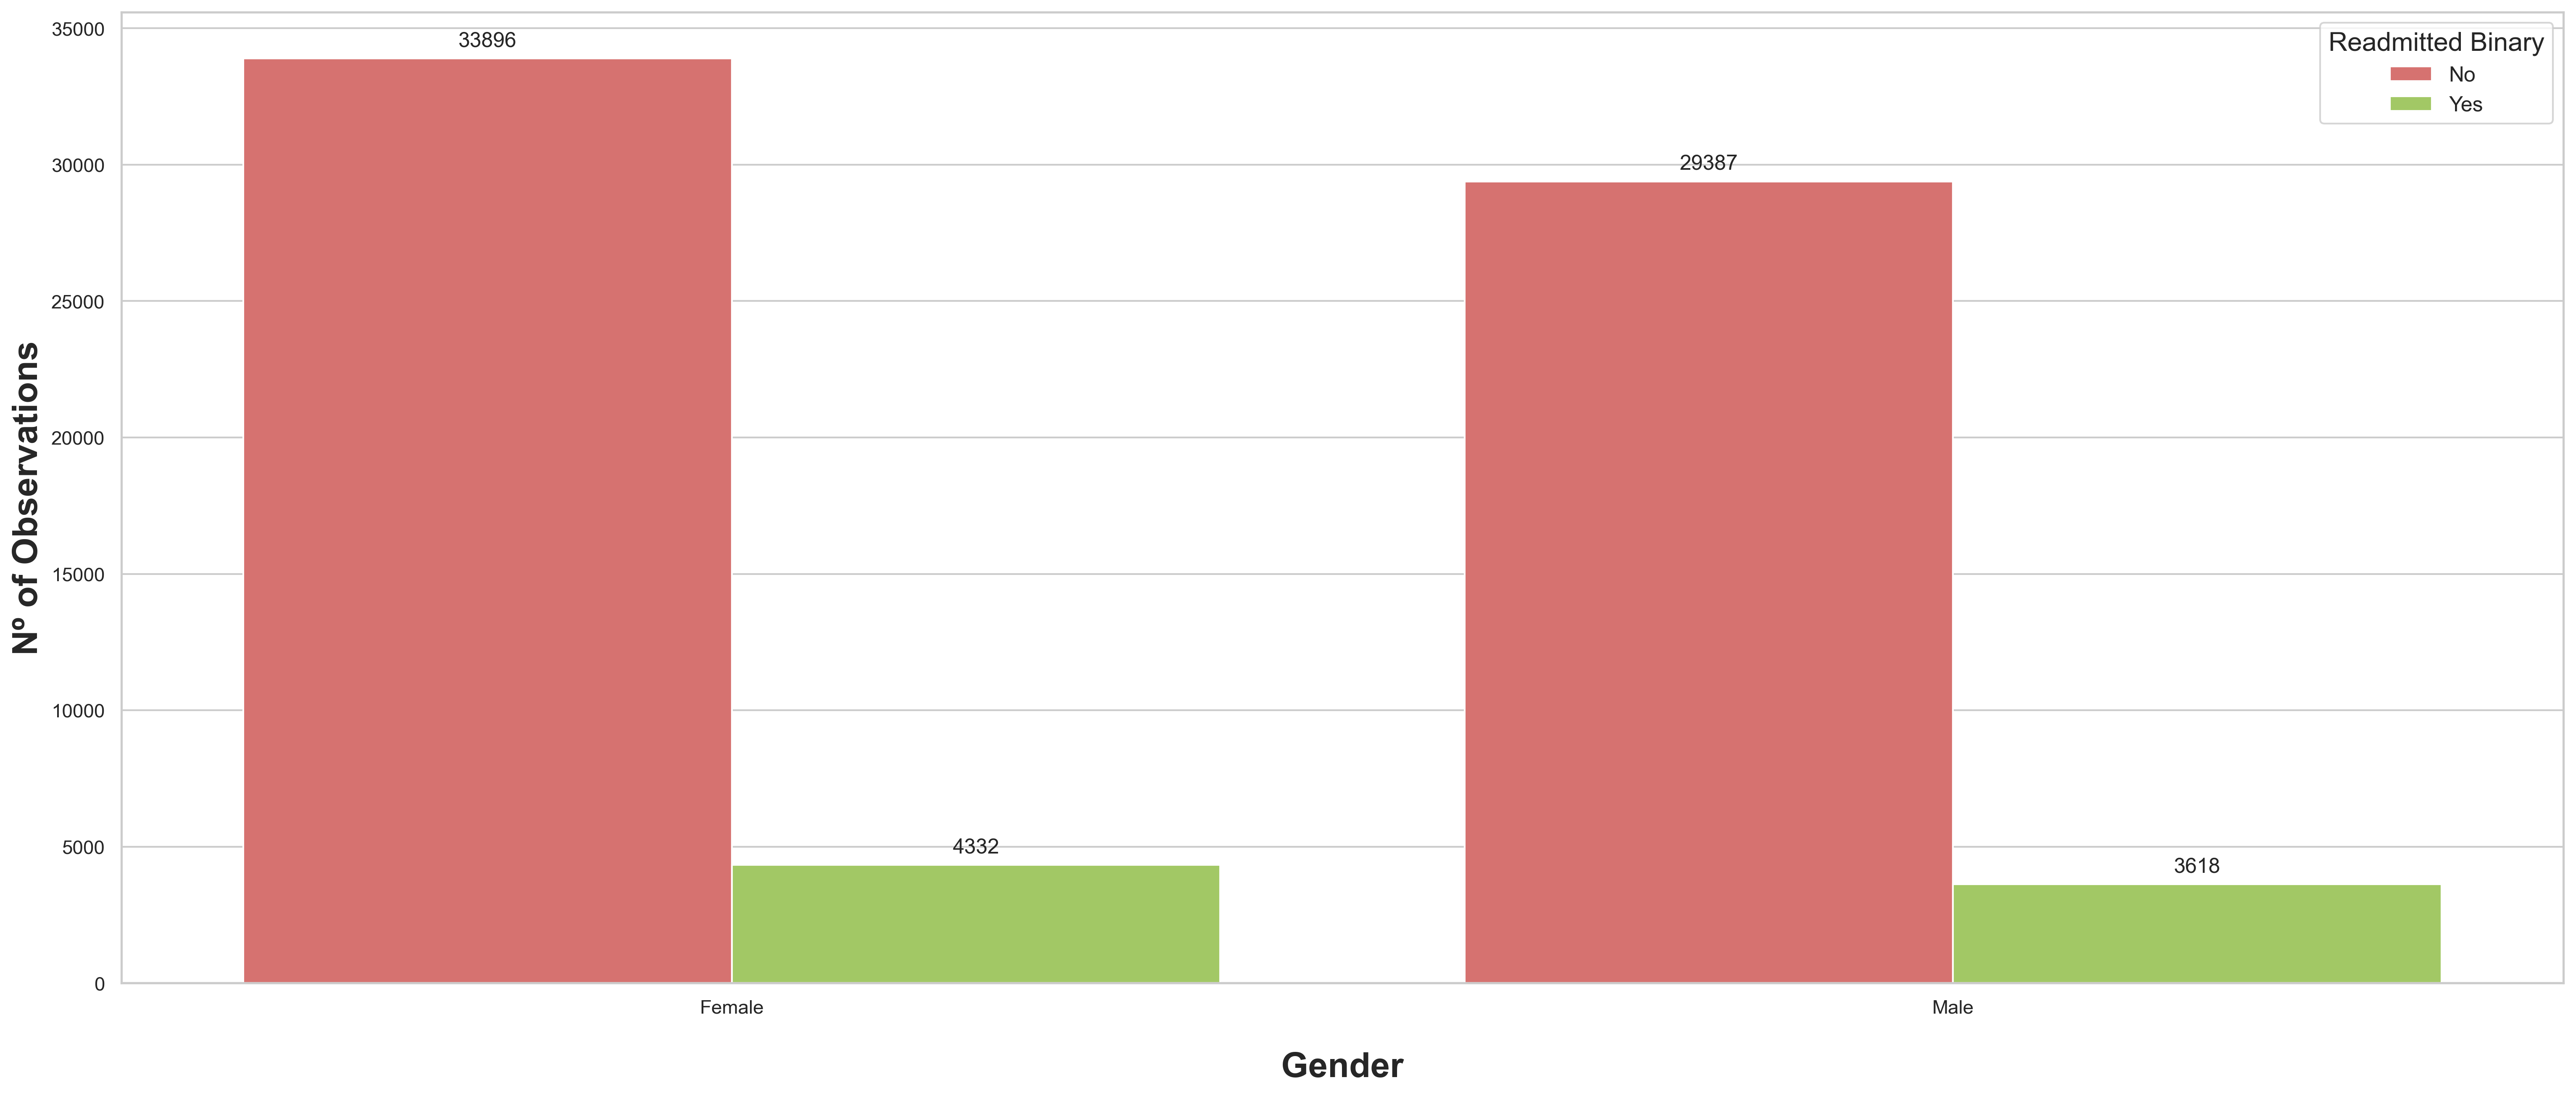

readmitted_binary     No   Yes  Total       No %      Yes %
gender                                                     
Female             33896  4332  38228  88.667992  11.332008
Male               29387  3618  33005  89.038025  10.961975


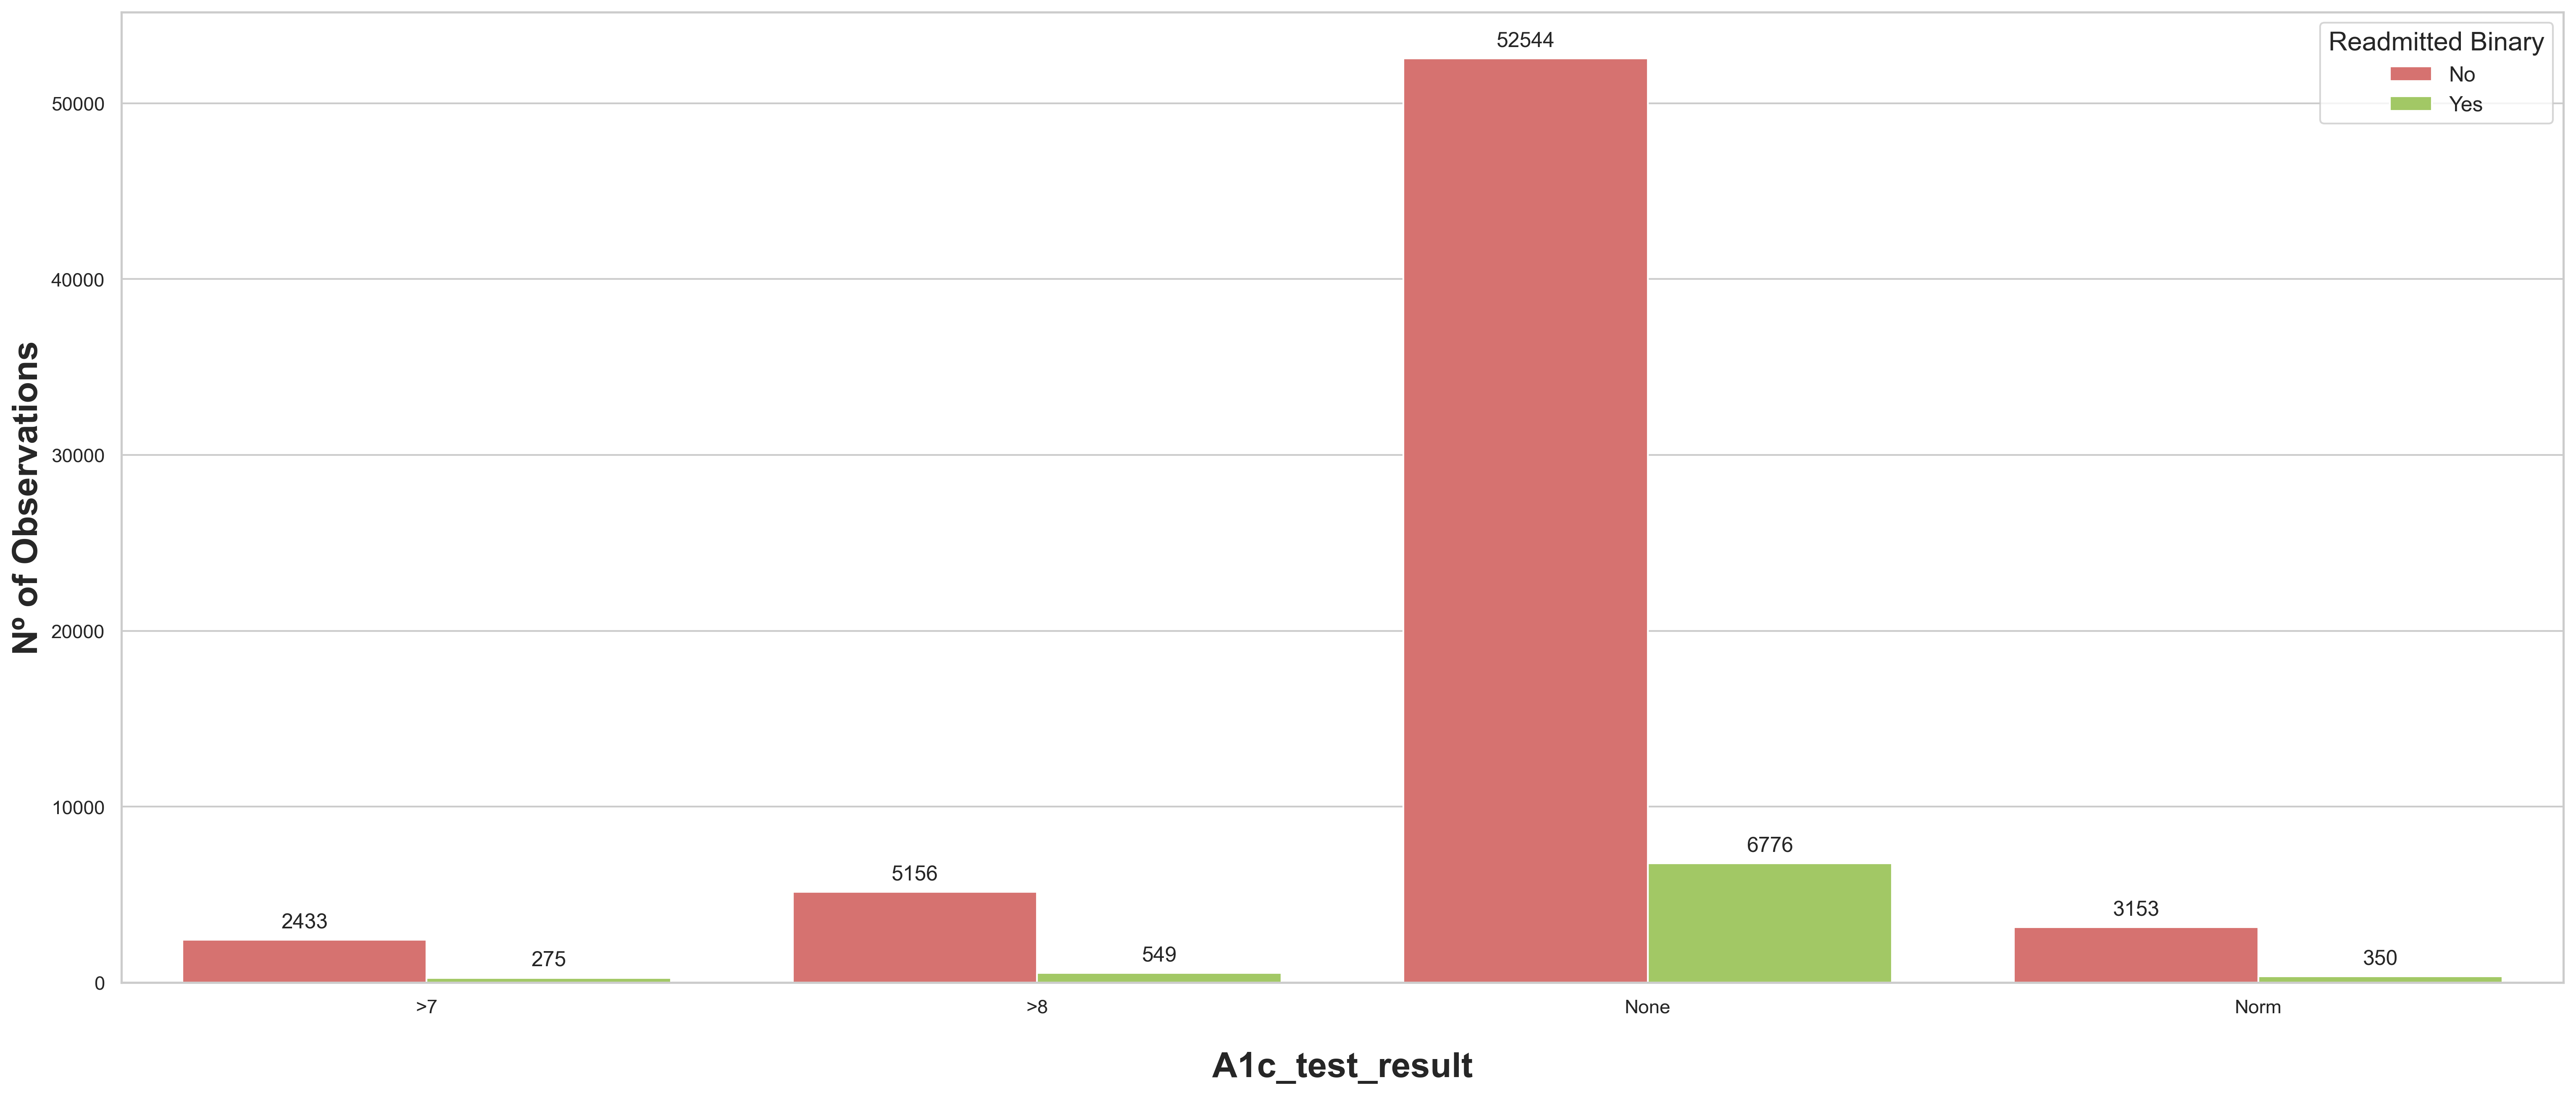

readmitted_binary     No   Yes  Total       No %      Yes %
a1c_test_result                                            
>7                  2433   275   2708  89.844904  10.155096
>8                  5156   549   5705  90.376862   9.623138
None               52544  6776  59320  88.577208  11.422792
Norm                3153   350   3503  90.008564   9.991436


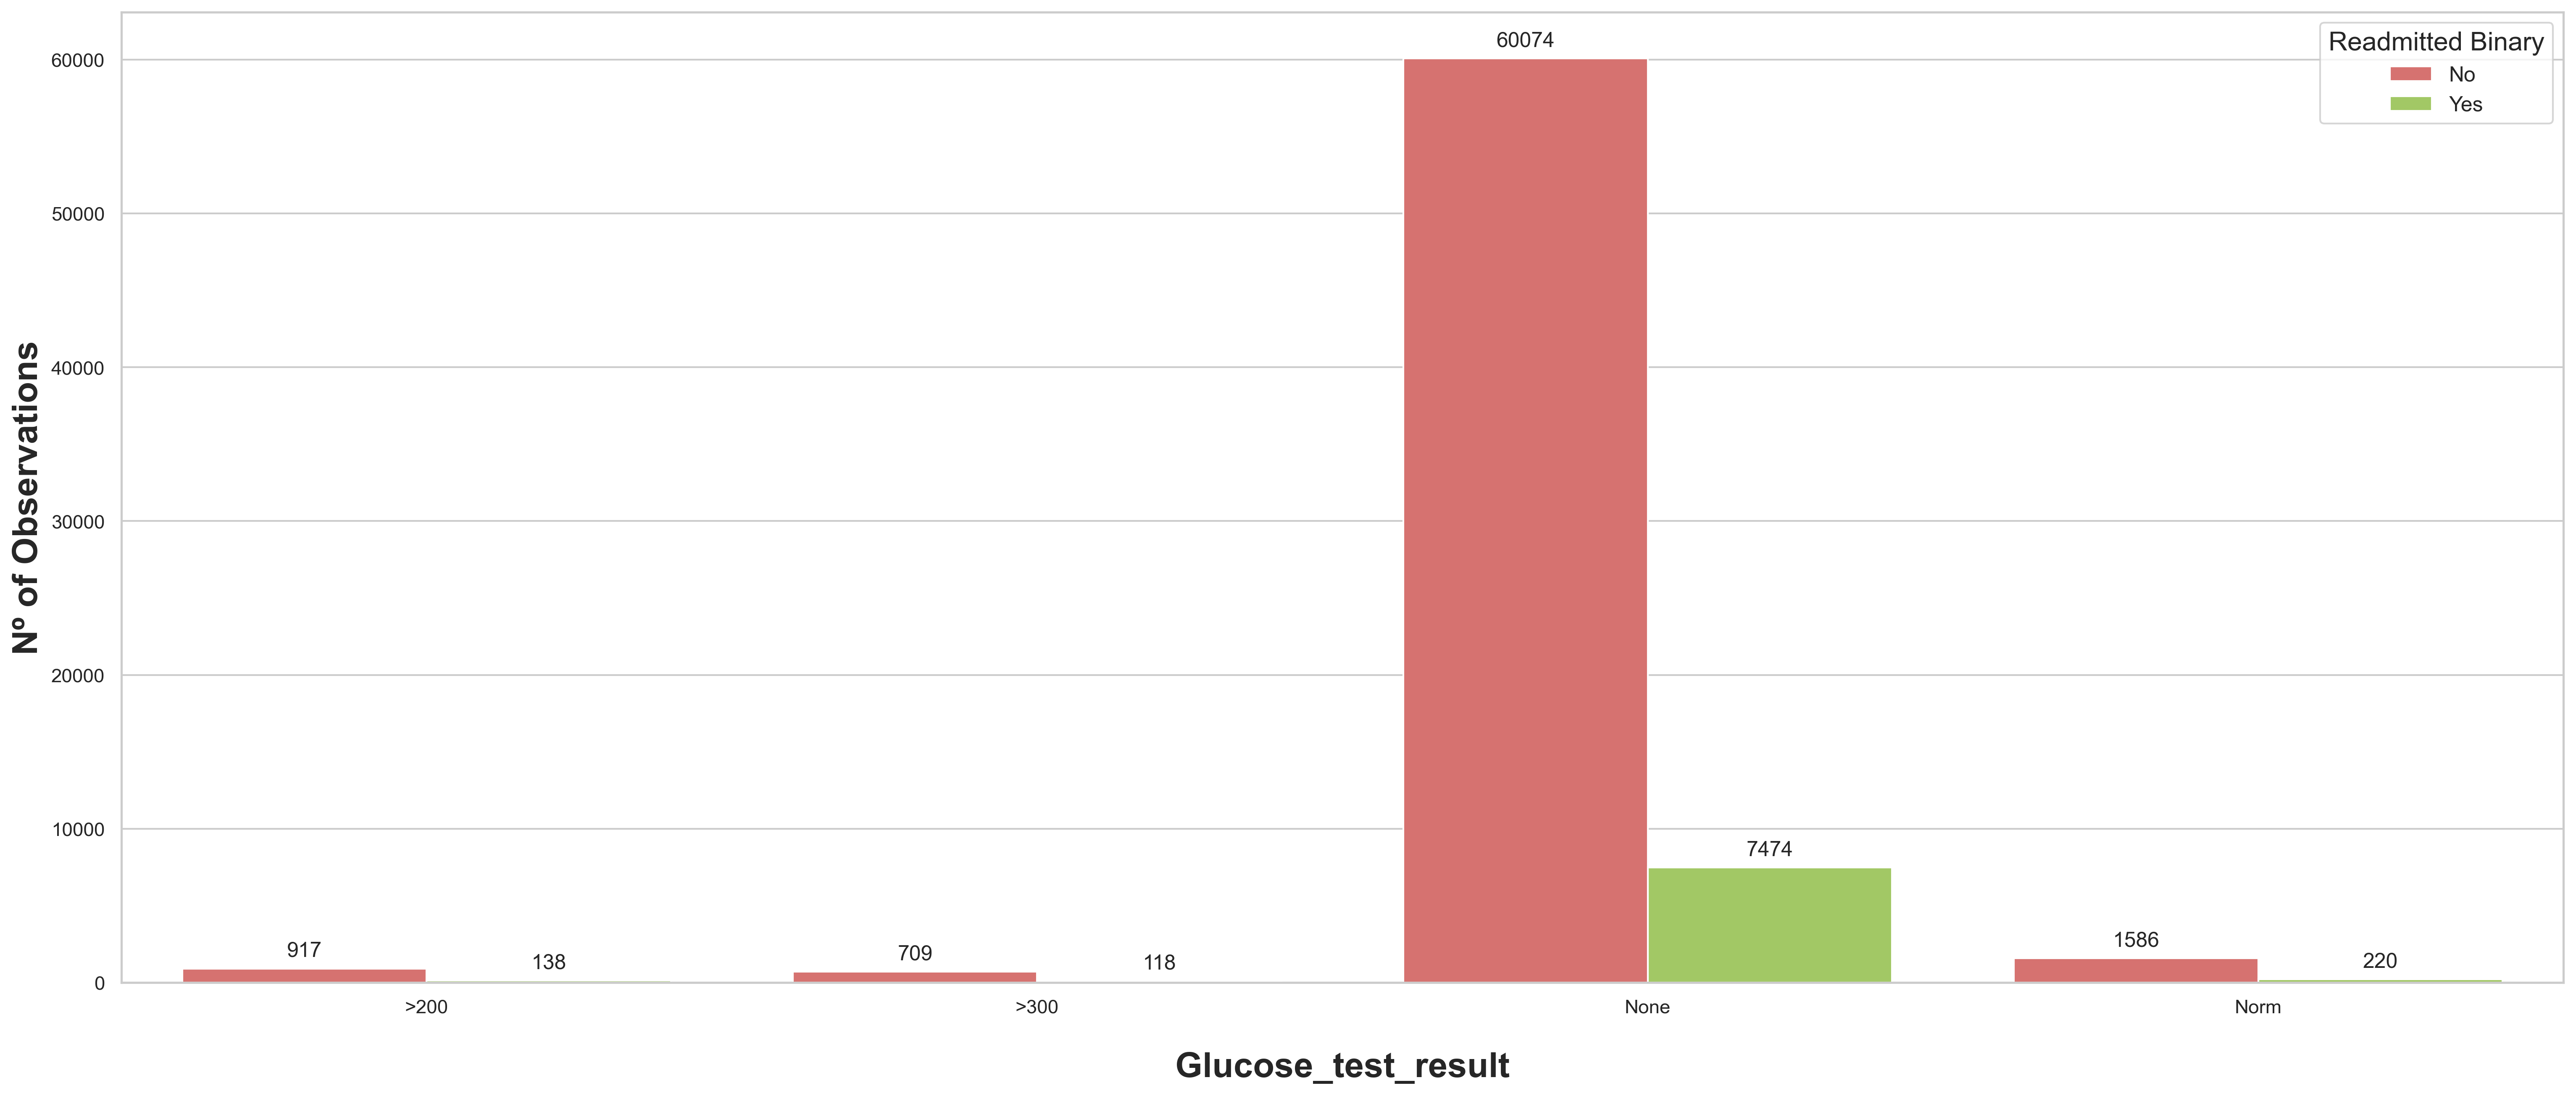

readmitted_binary       No   Yes  Total       No %      Yes %
glucose_test_result                                          
>200                   917   138   1055  86.919431  13.080569
>300                   709   118    827  85.731560  14.268440
None                 60074  7474  67548  88.935276  11.064724
Norm                  1586   220   1806  87.818383  12.181617


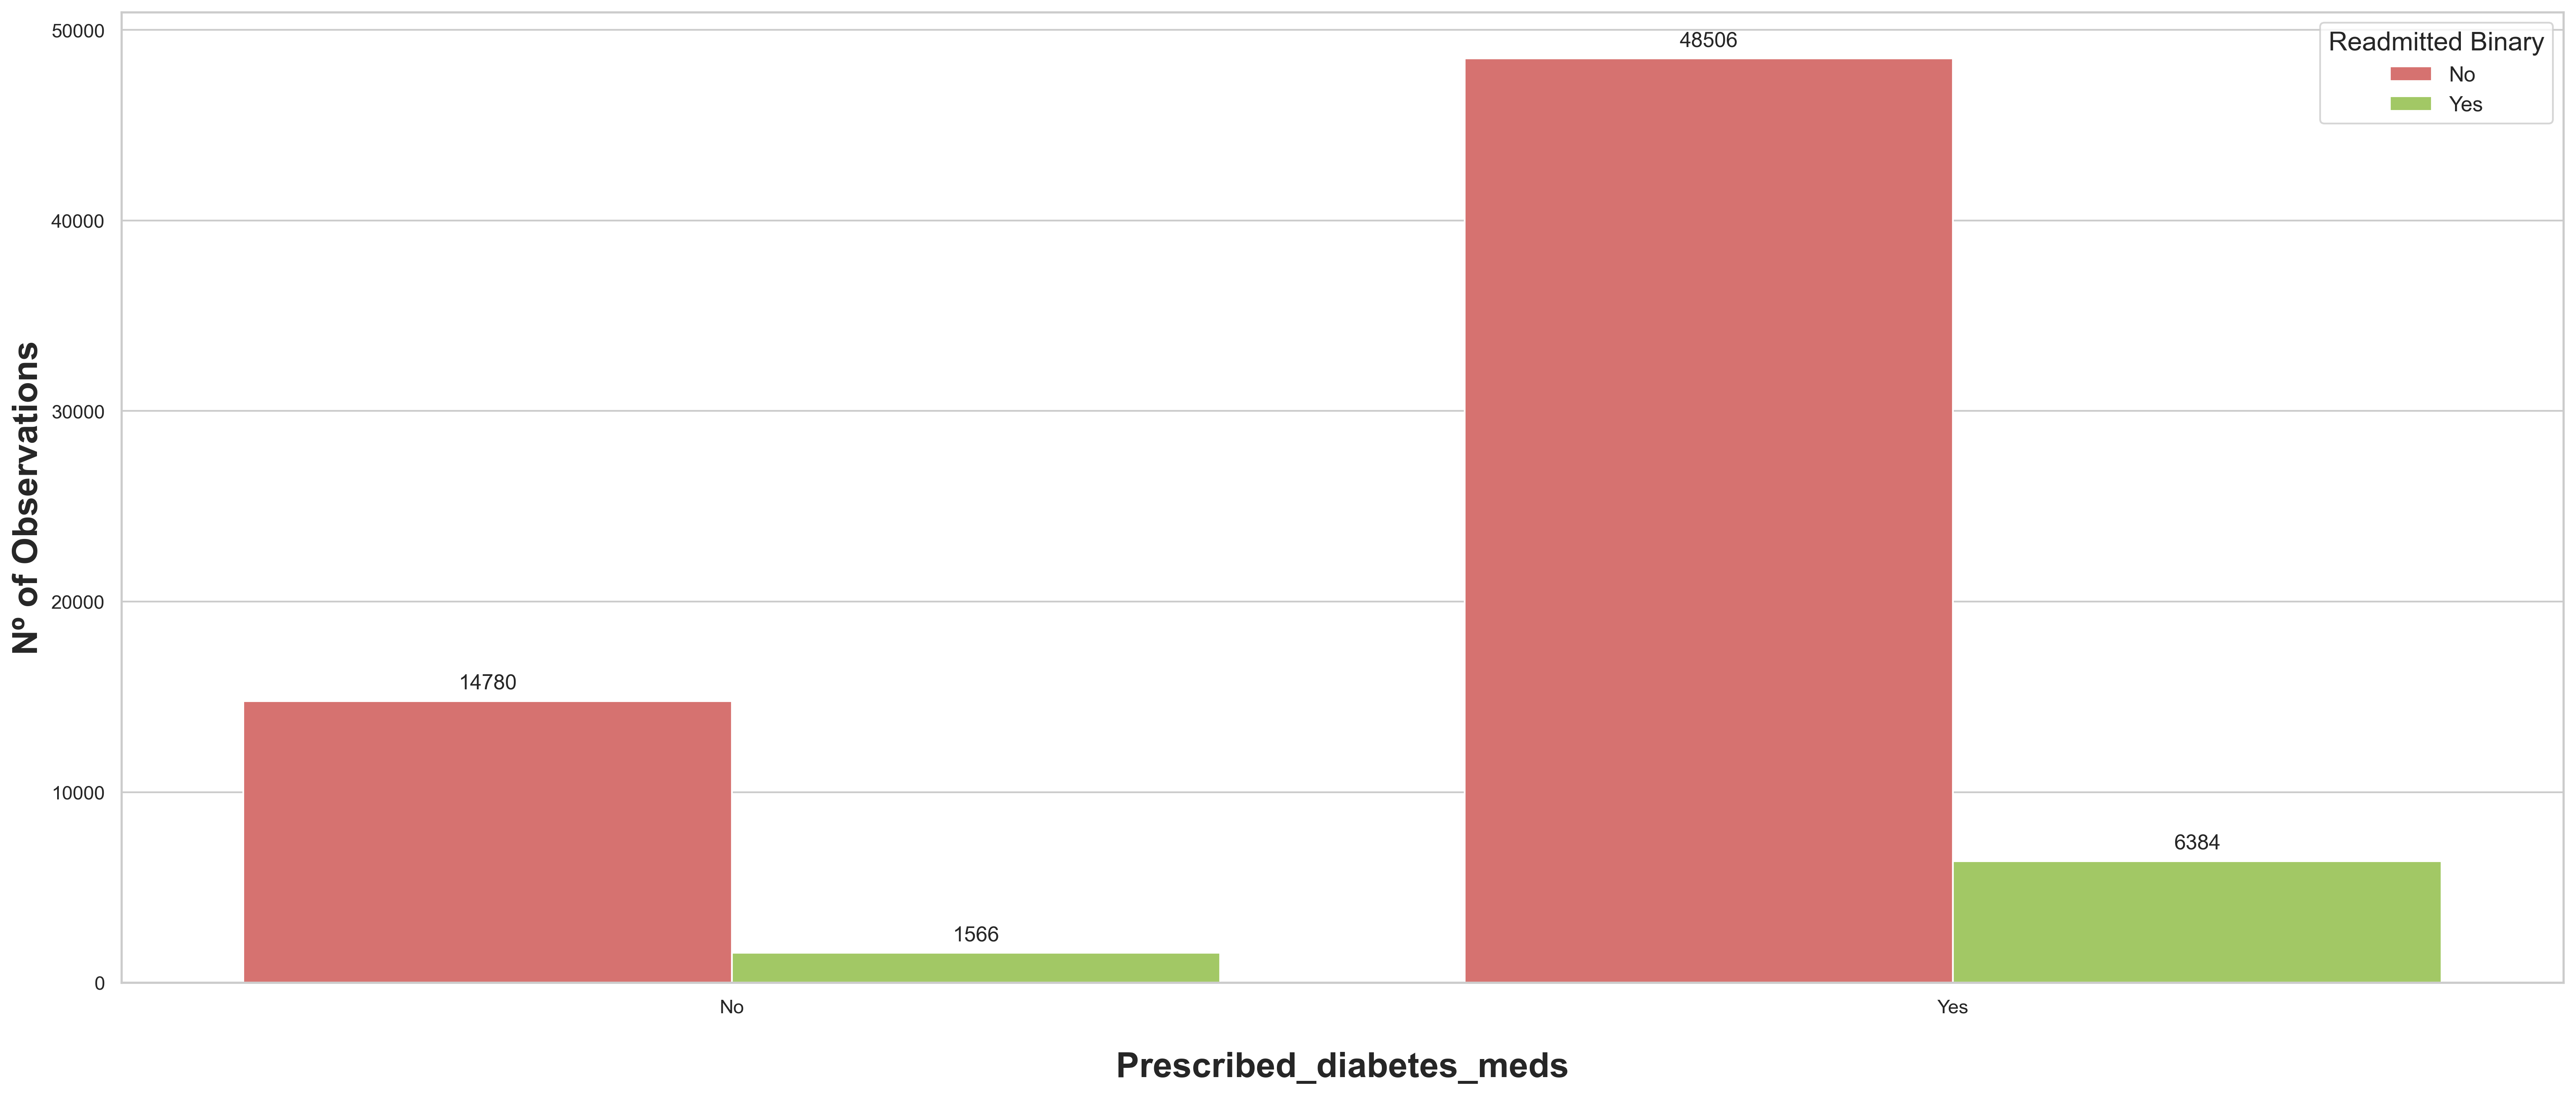

readmitted_binary            No   Yes  Total       No %      Yes %
prescribed_diabetes_meds                                          
No                        14780  1566  16346  90.419675   9.580325
Yes                       48506  6384  54890  88.369466  11.630534


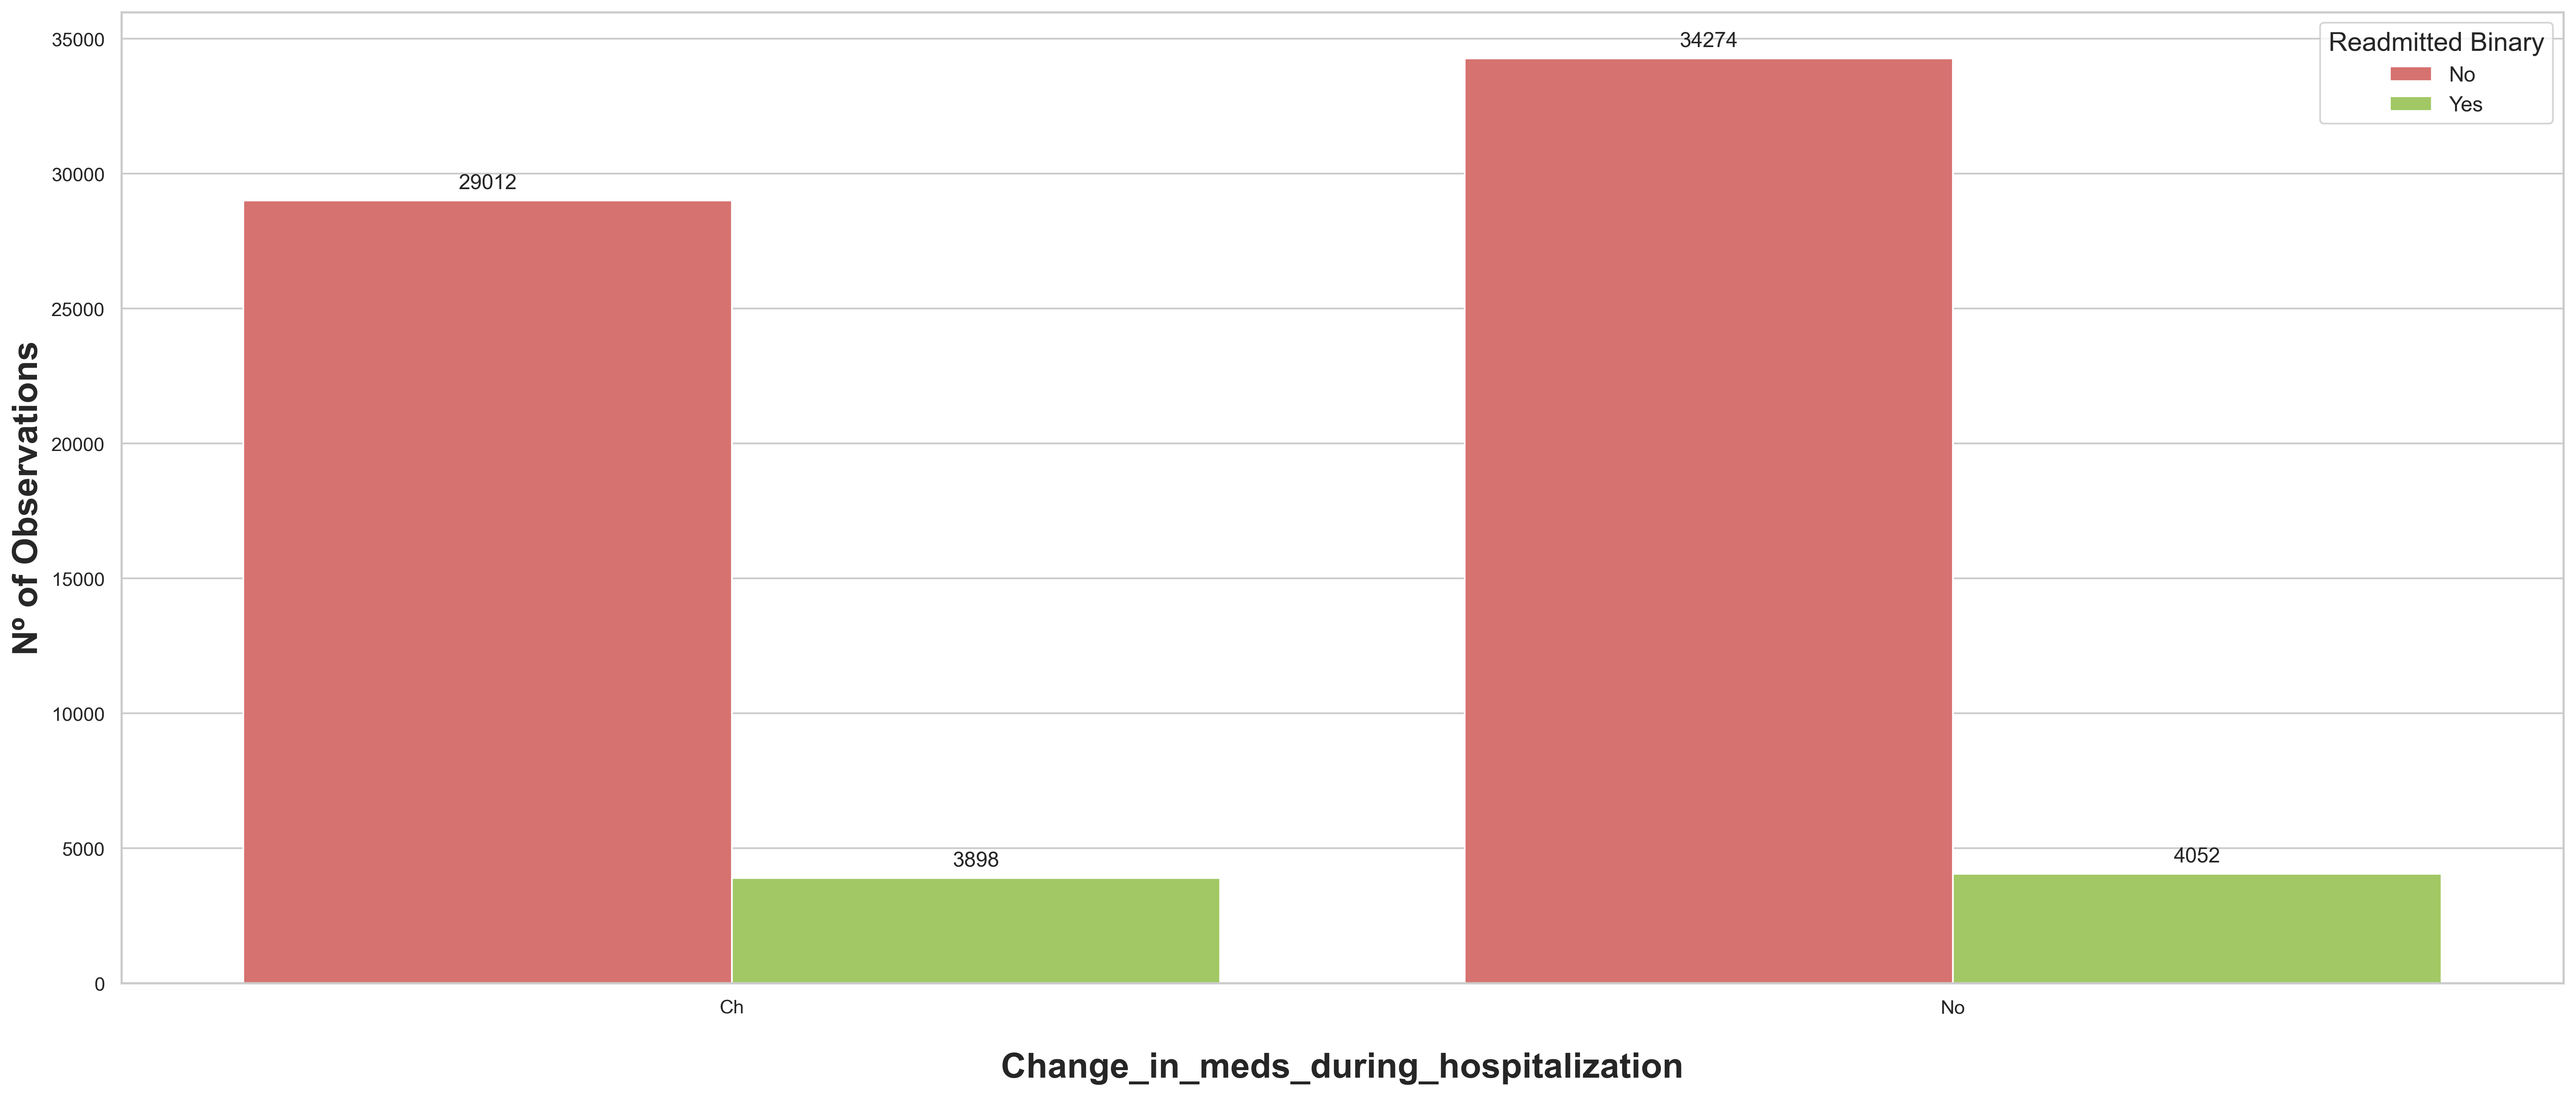

readmitted_binary                         No   Yes  Total       No %  \
change_in_meds_during_hospitalization                                  
Ch                                     29012  3898  32910  88.155576   
No                                     34274  4052  38326  89.427543   

readmitted_binary                          Yes %  
change_in_meds_during_hospitalization             
Ch                                     11.844424  
No                                     10.572457  


In [230]:
columns_of_interest = ['race', 'age', 'gender', 'a1c_test_result', 'glucose_test_result', 'prescribed_diabetes_meds', 'change_in_meds_during_hospitalization']
for column in columns_of_interest:
    plt.figure(figsize=(25, 10), dpi=300)
    sns.set(style="whitegrid")

    # Get the count of 'Yes' and 'No' for each column
    column_counts = train.groupby([column, 'readmitted_binary']).size().unstack().reset_index()
    # Set the column as the index
    column_counts.set_index(column, inplace=True)

    # Melt the DataFrame to have 'Yes' and 'No' in the same column
    column_counts_melted = pd.melt(column_counts.reset_index(), id_vars=column, value_vars=['No', 'Yes'], var_name='Readmitted', value_name='Count')

    # Bar plot
    bar = sns.barplot(x=column, y="Count", hue="Readmitted", data=column_counts_melted, palette={"No": '#E7625F', "Yes": sns.color_palette("Set2")[4]})

    # Add legend
    plt.legend(title='Readmitted Binary', title_fontsize='15', fontsize='12')

    # Labeling
    plt.xlabel(column.capitalize(), labelpad=20, size=20, fontweight='bold')
    plt.ylabel("Nº of Observations", size=20, fontweight='bold')

    # Annotate each bar with its value
    for p in bar.patches:
        plt.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Show the plot
    plt.show()

    # Calculate the percentage of 'Yes' and 'No' for each category
    column_counts['Total'] = column_counts.sum(axis=1)  # Total observations for each category
    column_counts['No %'] = (column_counts['No'] / column_counts['Total'])*100
    column_counts['Yes %'] = (column_counts['Yes'] / column_counts['Total'])*100

    # Display the result DataFrame with the column as the index
    print(column_counts)
    print("=" * 50)  # Separating each iteration with a line


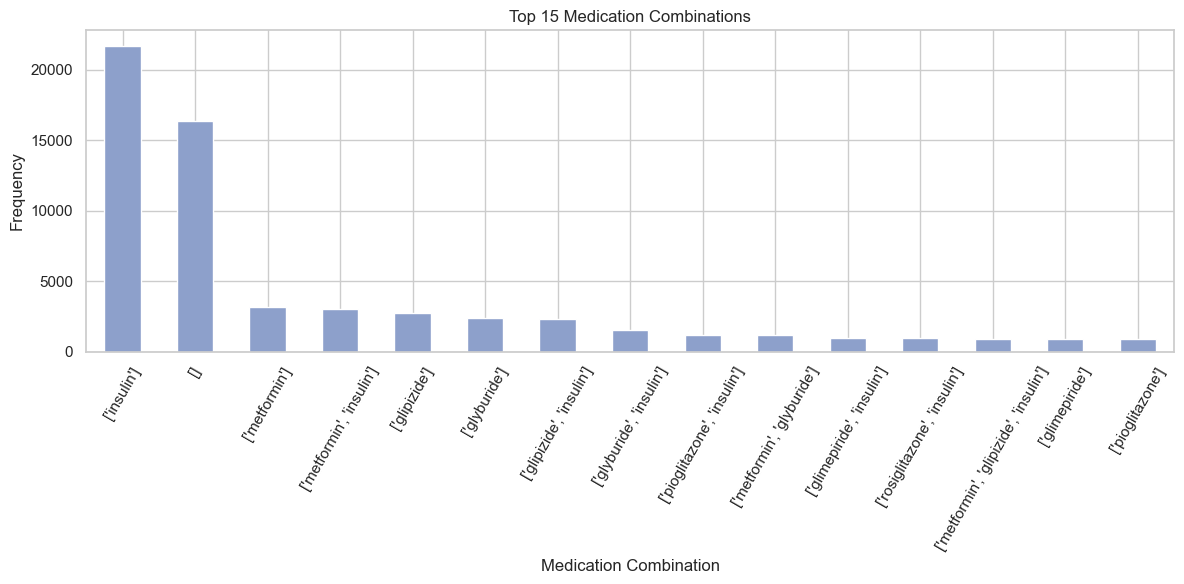

In [231]:
# Count the frequency of each medication combination
medication_counts = train['medication'].value_counts()

# Plot the top N most frequent medication combinations (e.g., top 15)
top_N = 15

# Increase the figure size and rotate labels
plt.figure(figsize=(12, 6))
medication_counts.head(top_N).plot(kind='bar', color=sns.color_palette("Set2")[2])

plt.title(f'Top {top_N} Medication Combinations')
plt.xlabel('Medication Combination')
plt.ylabel('Frequency')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### 1.4.2 Numerical Variables Exploration <a class="anchor" id="numericalvariablesexploration"></a>

##### **1) Histograms**

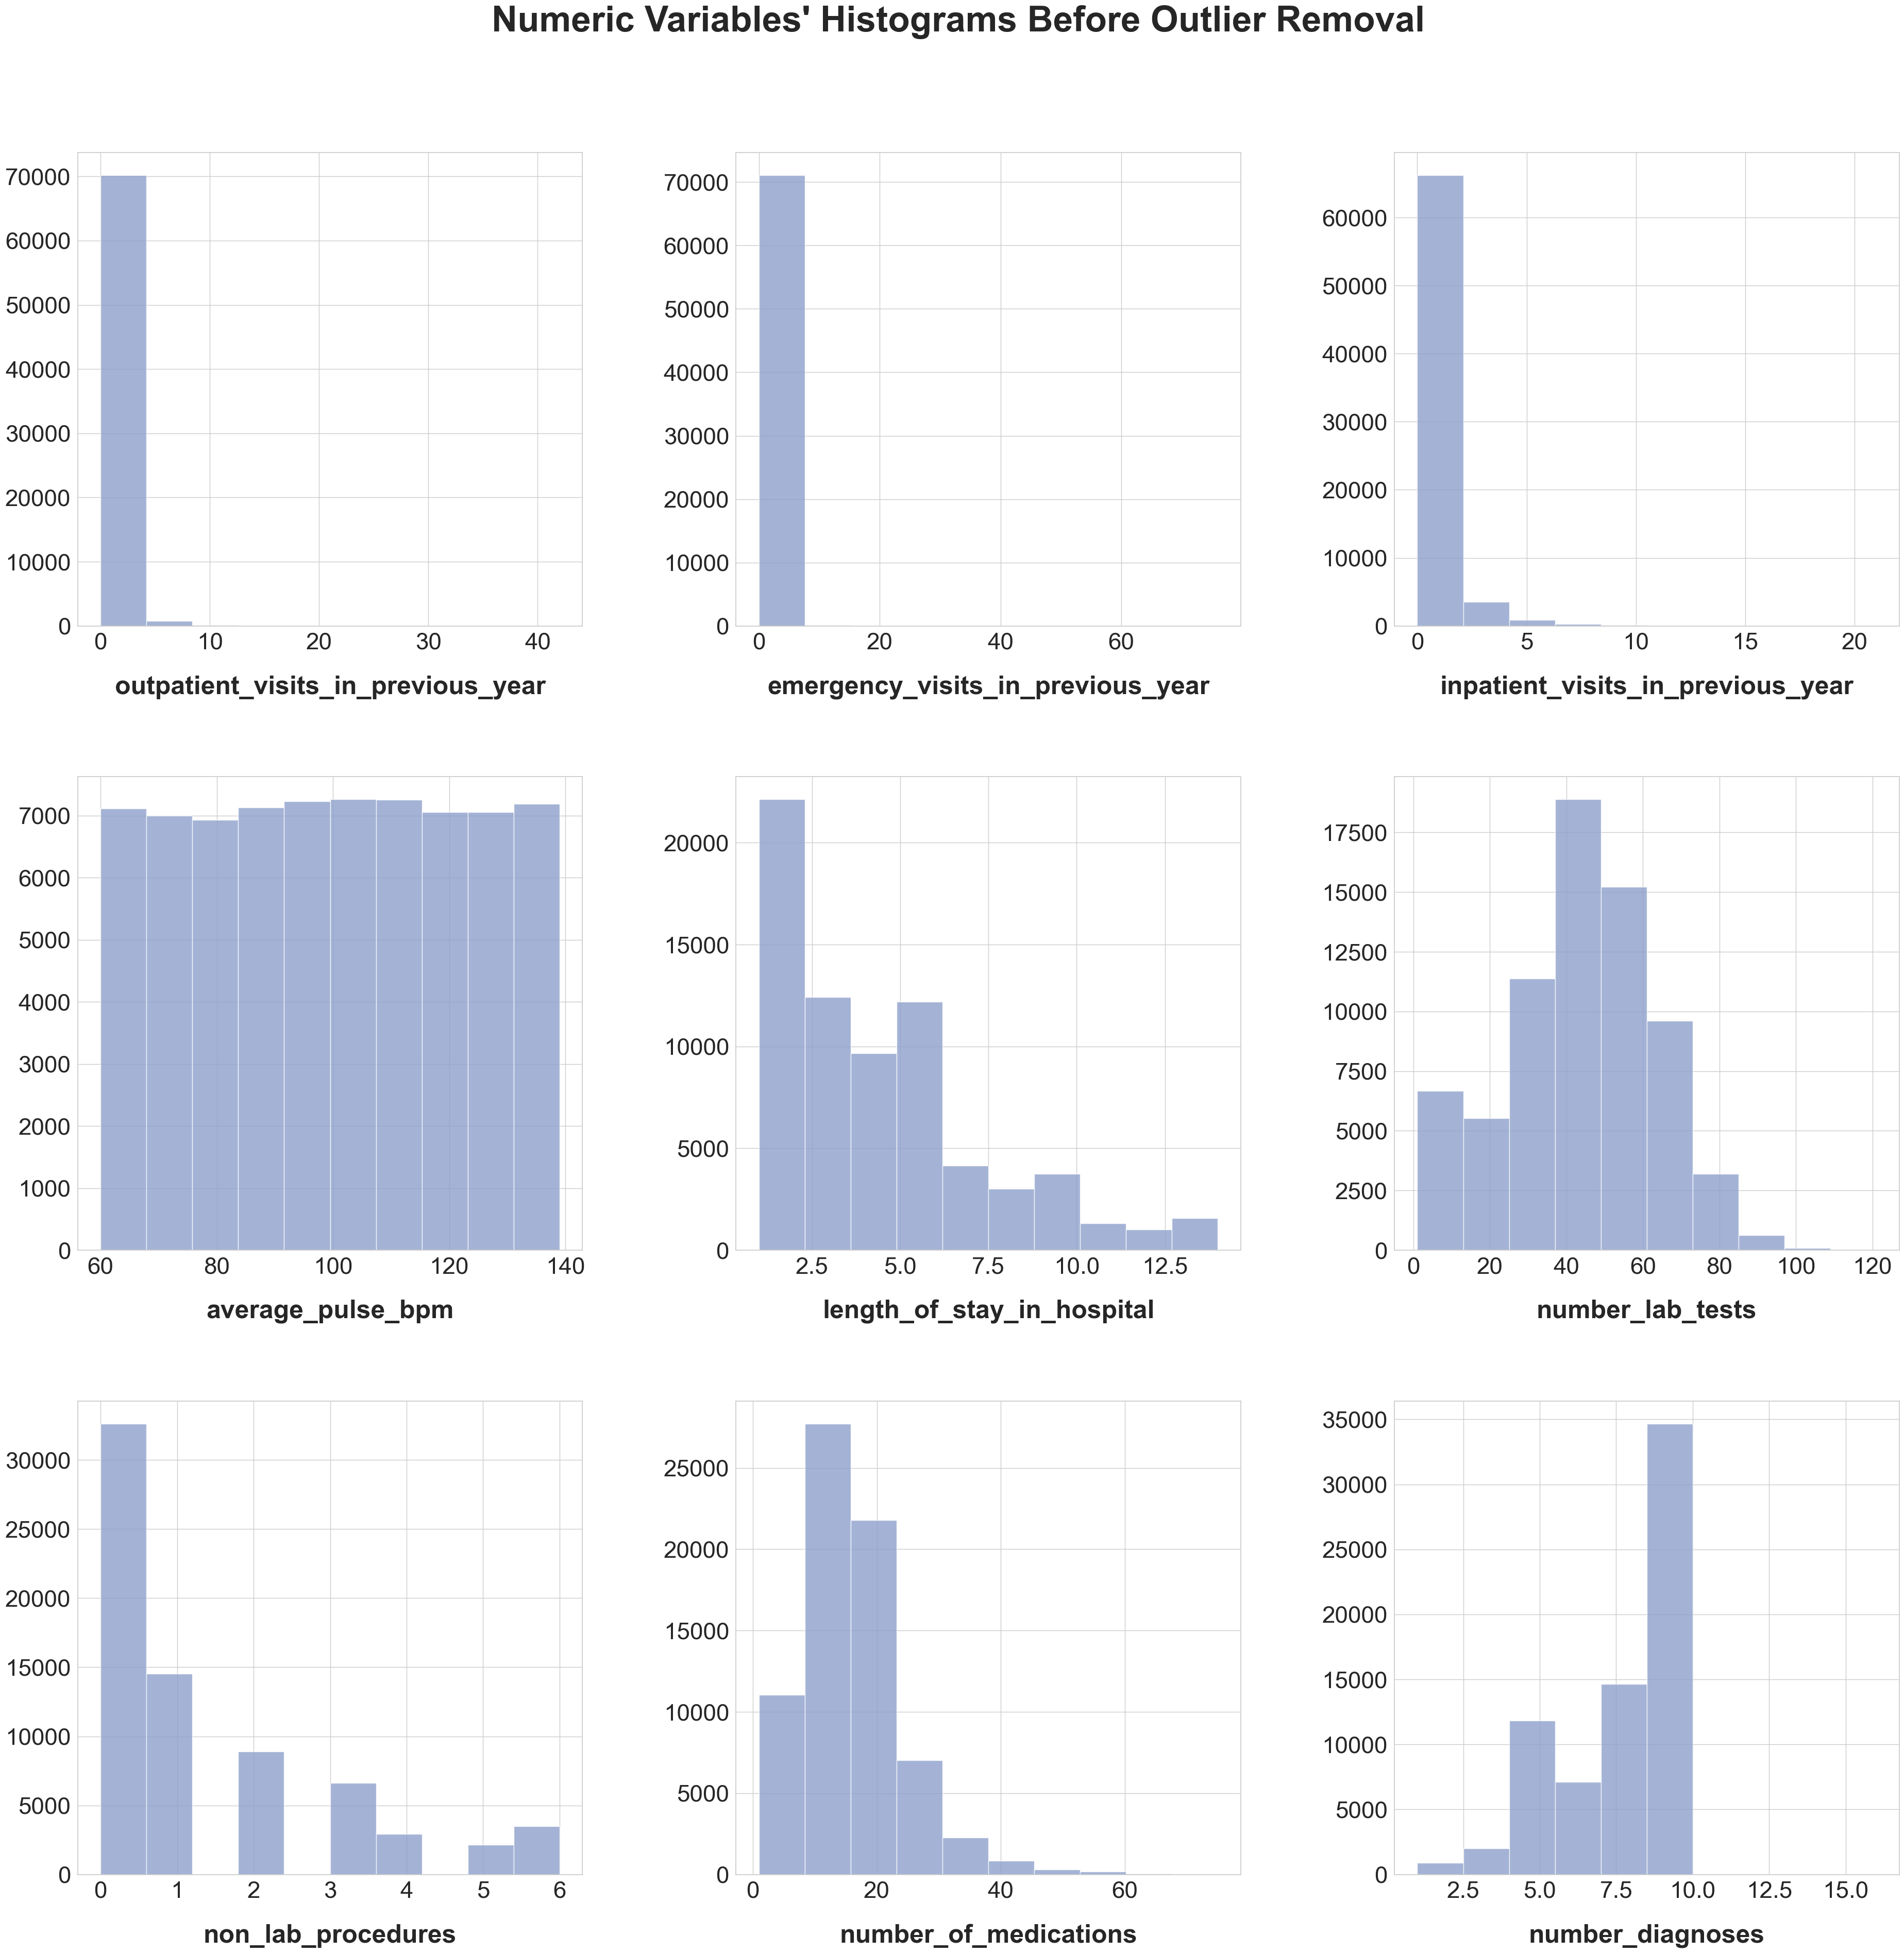

In [232]:
# Set the font size for axis labels
label_font_size = 16  # Choose an appropriate font size

# All Numeric Variables' Histograms in one figure
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Get array of features
data = train[numerical]

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(40, 40))

# Building the Histograms
for i in data:
    plt.subplot(a, b, c)
    plt.xlabel(i,fontweight="bold",labelpad=30)
    plt.hist(data[i], color=sns.color_palette("Set2")[2], alpha=0.8)
    c = c + 1
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms Before Outlier Removal"
plt.suptitle(title, fontsize=50,fontweight="bold")
plt.tight_layout(pad=3)

plt.show()


##### **2) Box Plots**

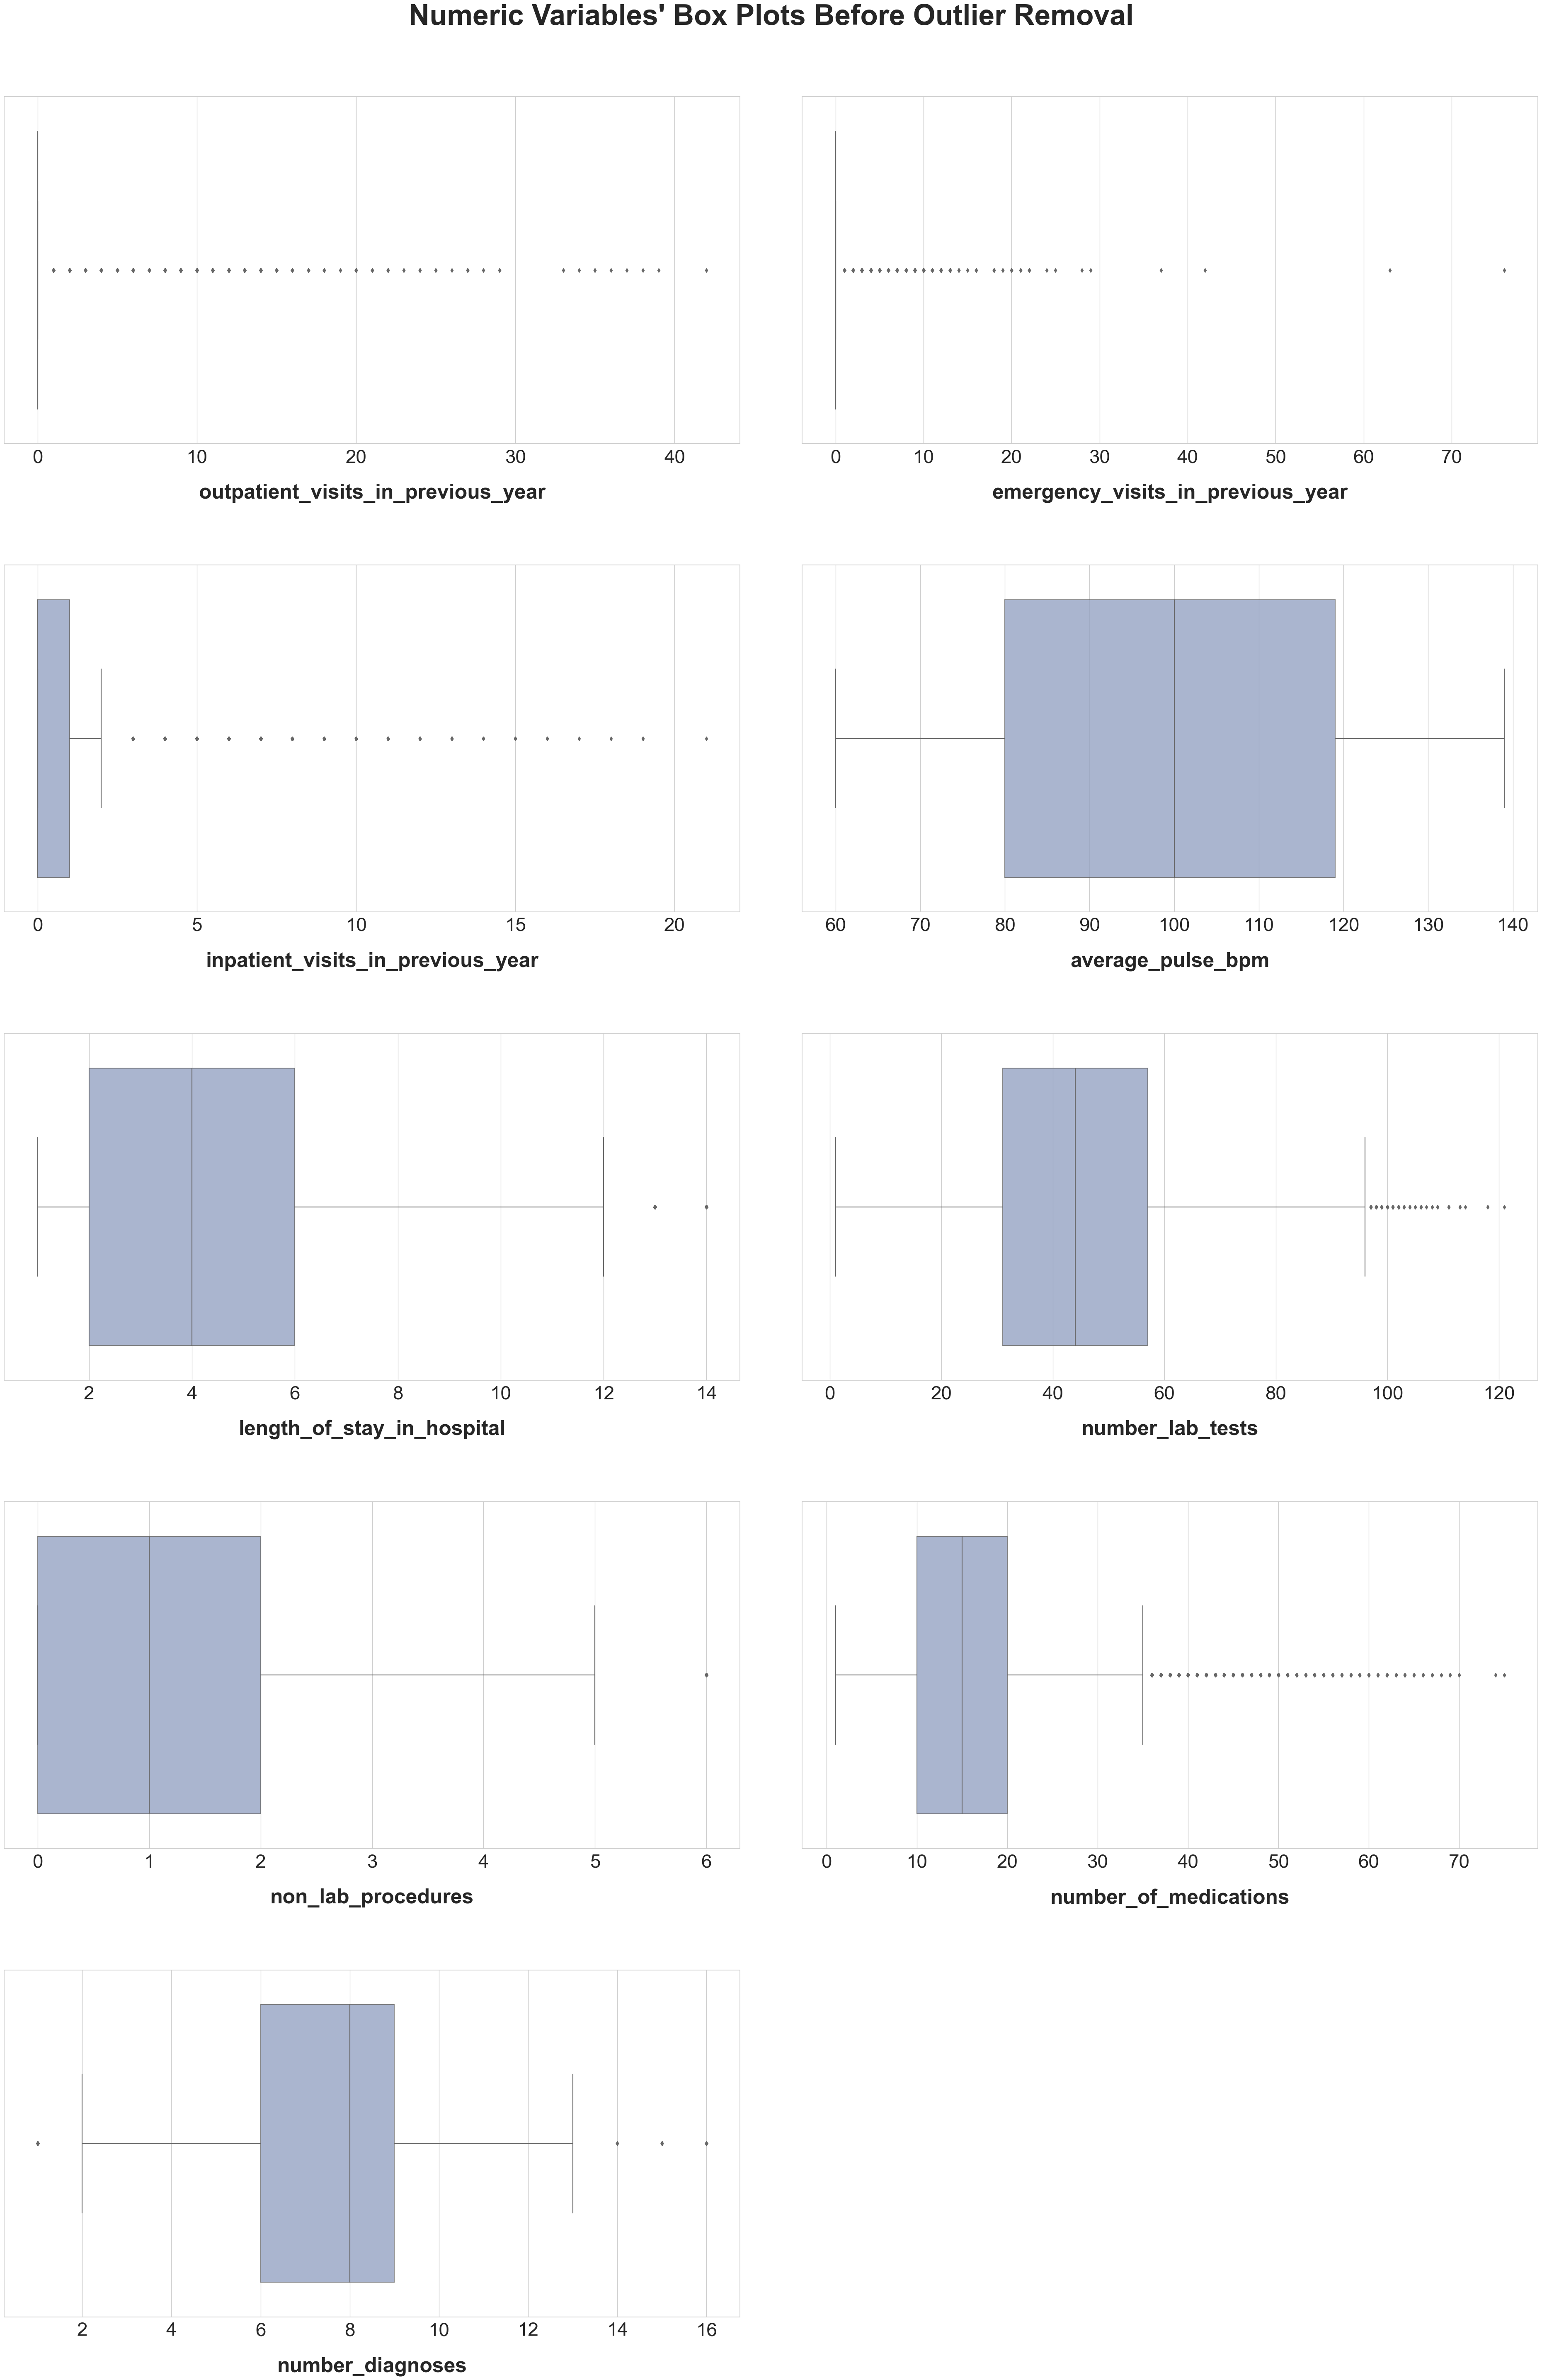

In [233]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Get array of features
data = train[numerical]

a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(40, 70))

# Building the Histograms
for i in data:
    plt.subplot(a, b, c)
    plt.xlabel(i, fontweight="bold", labelpad=30)
    sns.boxplot(x=data[i], color=sns.color_palette("Set2")[2], boxprops=dict(alpha=.8))
    c = c + 1

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots Before Outlier Removal"
plt.suptitle(title, fontsize=50, fontweight="bold")
plt.tight_layout(pad=3)

plt.show()

##### **3) Correlation Matrix**

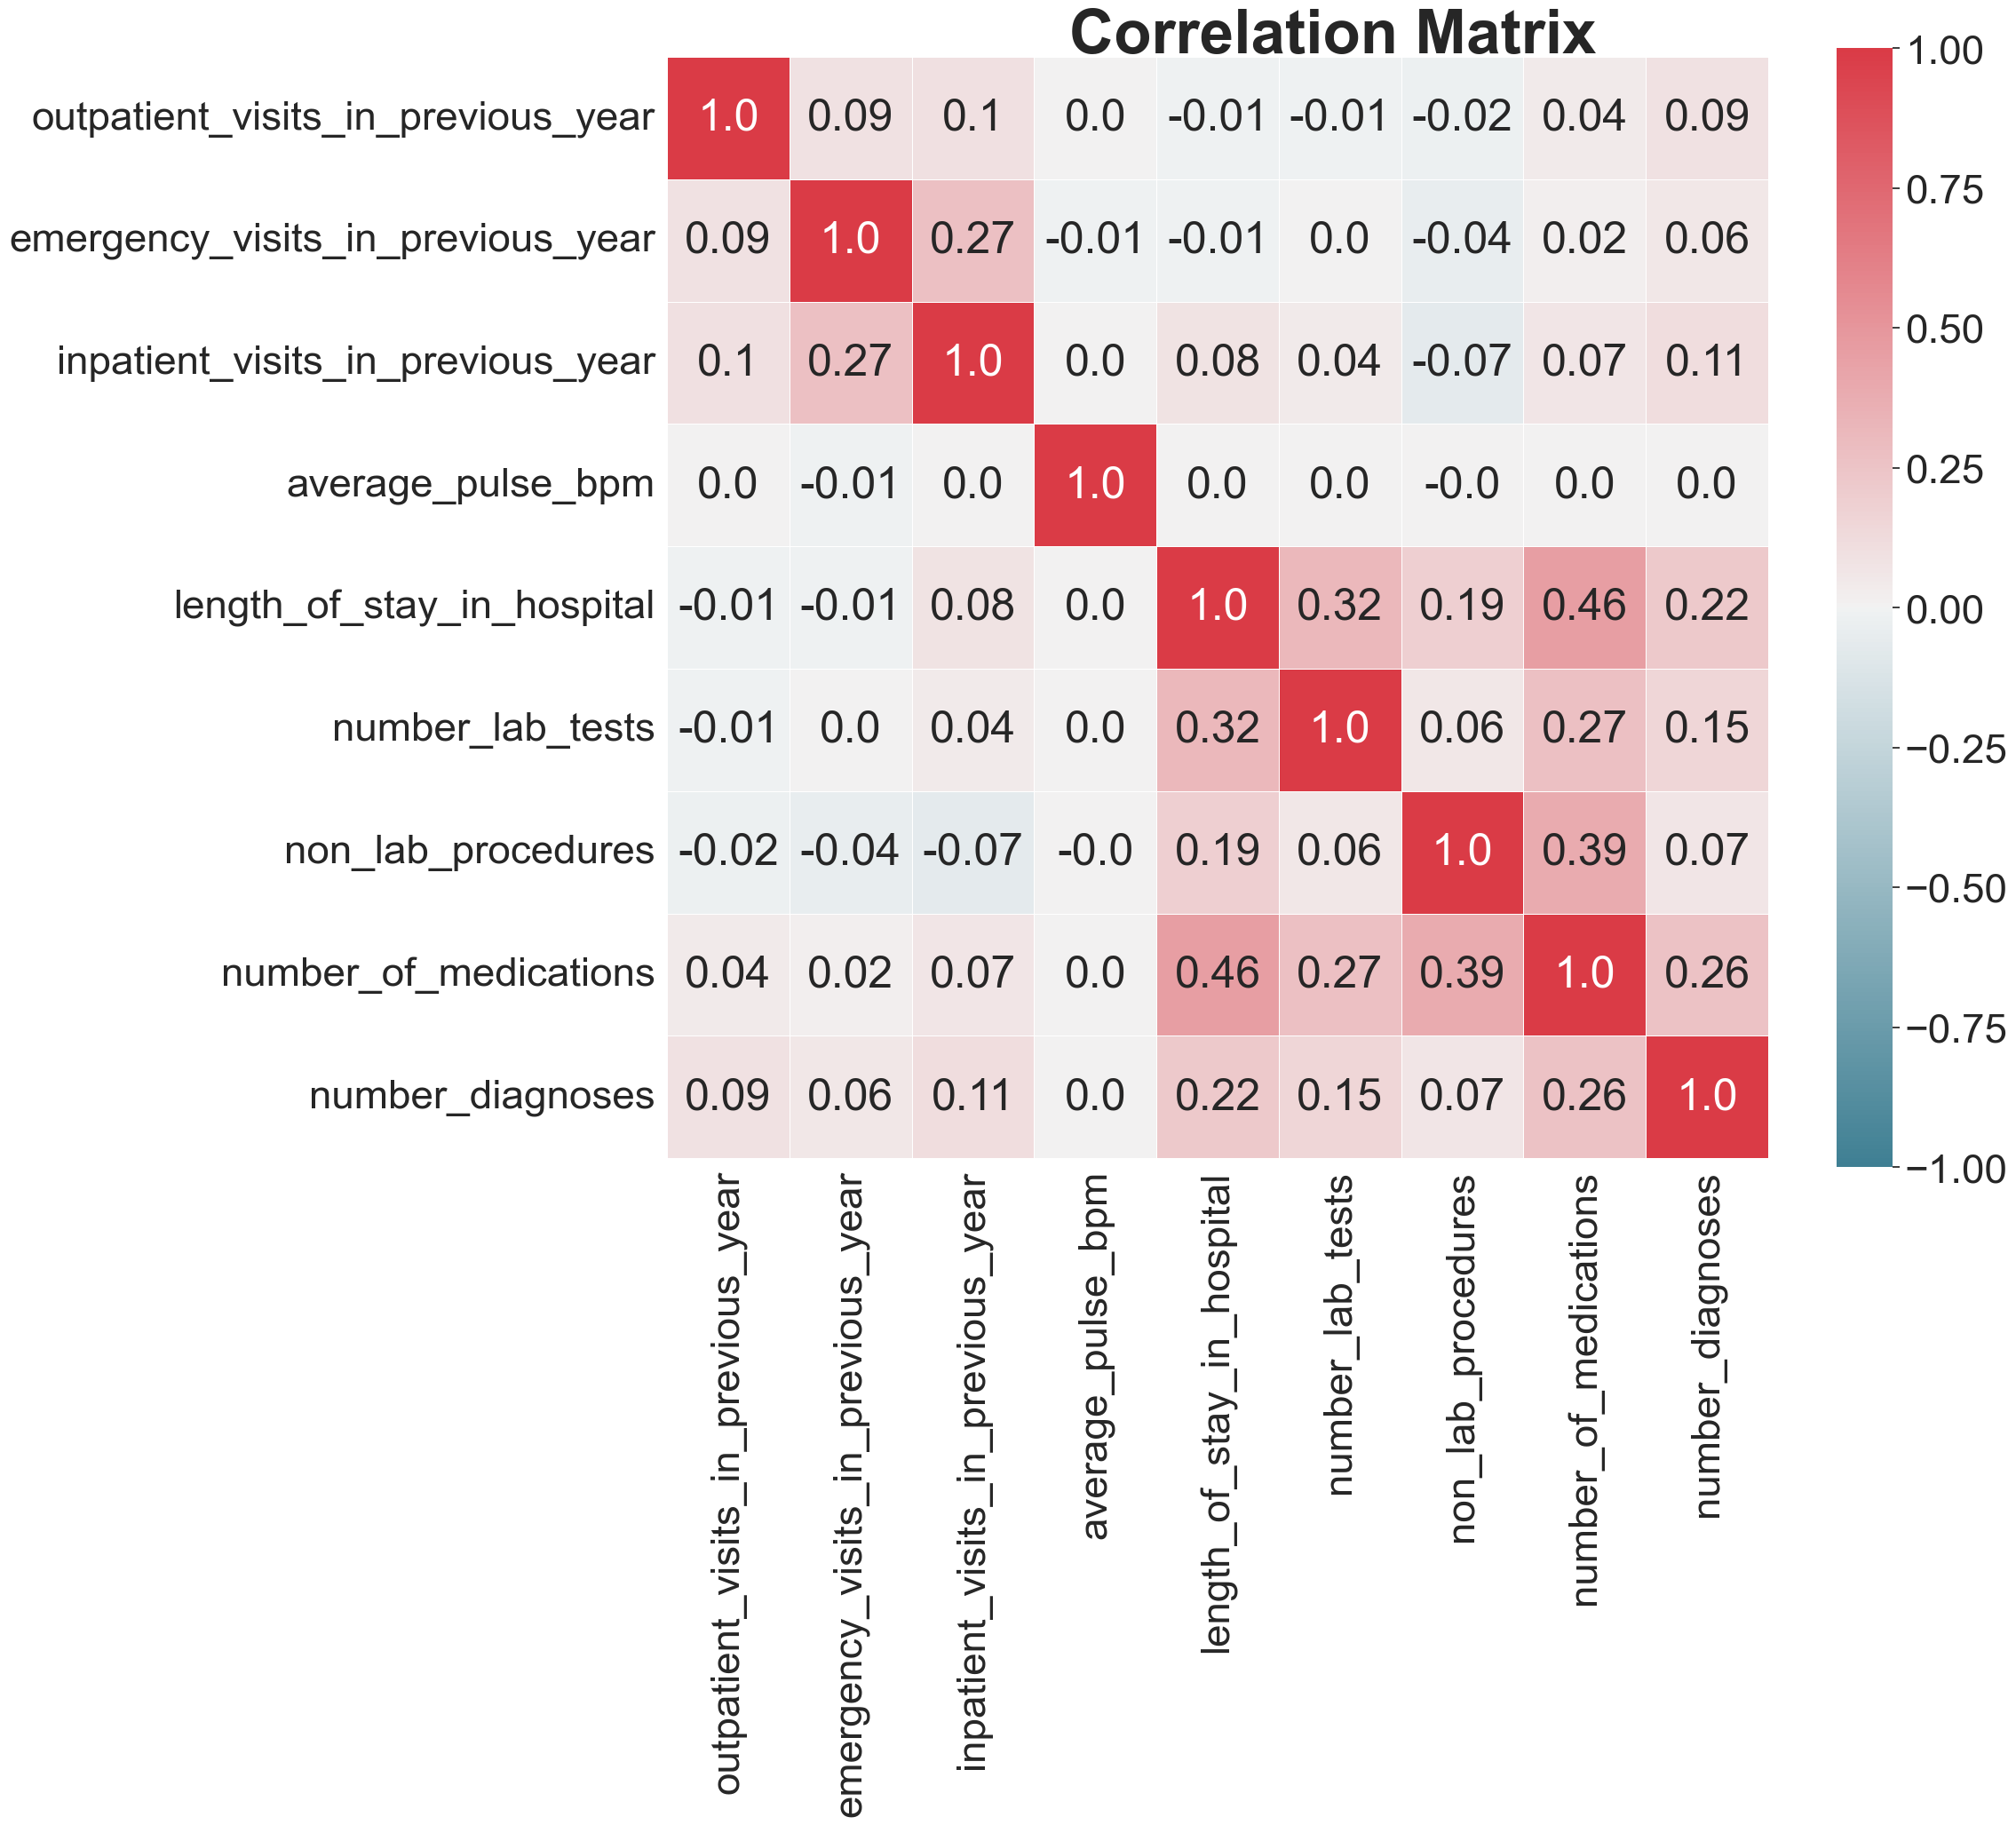

In [234]:
# Prepare figure
fig = plt.figure(figsize=(20, 15))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = train[numerical].corr().round(2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.0
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=50, fontweight="bold")
plt.show()

## 2. Data Preparation and Preprocessing <a class="anchor" id="datapreprocessing"></a>

### 2.1 Coherence checking <a class="anchor" id="coherence"></a>

#### **1)  Country**

The feature country only assumes the value = "USA", so it is not really a variable but a constant.It doesn´t add relevant information to explain the varaibality of our model.

In [235]:
train.country.value_counts()

country
USA    71236
Name: count, dtype: int64

In [236]:
train= train.drop('country', axis=1)
categorical.remove('country')

#### **2)  Medication and Prescribed_diabetes_meds**

Prescribed_diabetes_meds= Yes if a patient has diabetes medication prescribed. No
otherwise. So if it´s Yes the list medication could not be empty!

In [237]:
train.loc[(train.prescribed_diabetes_meds =='Yes') &(train.medication=='[]')]


Empty DataFrame
Columns: [patient_id, race, gender, age, weight, payer_code, outpatient_visits_in_previous_year, emergency_visits_in_previous_year, inpatient_visits_in_previous_year, admission_type, medical_specialty, average_pulse_bpm, discharge_disposition, admission_source, length_of_stay_in_hospital, number_lab_tests, non_lab_procedures, number_of_medications, primary_diagnosis, secondary_diagnosis, additional_diagnosis, number_diagnoses, glucose_test_result, a1c_test_result, change_in_meds_during_hospitalization, prescribed_diabetes_meds, medication, readmitted_binary, readmitted_multiclass]
Index: []

[0 rows x 29 columns]

#### **3) == Patient_id**

##### <u> **The same gender** </u>

In [238]:
duplicates = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    if len(group['gender'].unique()) > 1:
        print(f"Patient ID: {patient_id} - Multiple gender values: {group['gender'].unique()}")
    else:
       continue


Patient ID: 109210482 - Multiple gender values: ['Male' 'Female']


Patient ID: 55500588 - Multiple gender values: ['Male' 'Female']


In [239]:
train.loc[train['patient_id'] == '55500588'] 

patient_id       race  gender      age weight payer_code  \
encounter_id                                                            
348909         55500588        NaN    Male  [80-90)    NaN         MC   
271889         55500588  Caucasian  Female      NaN    NaN        NaN   

              outpatient_visits_in_previous_year  \
encounter_id                                       
348909                                         0   
271889                                         0   

              emergency_visits_in_previous_year  \
encounter_id                                      
348909                                        0   
271889                                        0   

              inpatient_visits_in_previous_year admission_type  ...  \
encounter_id                                                    ...   
348909                                        0       Elective  ...   
271889                                        0            NaN  ...   

             secondary_diagnosis  additional_diagnosis number_diagnoses  \
encounter_id                                                              
348909                       736                   733                7   
271889                       486                   560                7   

             glucose_test_result  a1c_test_result  \
encounter_id                                        
348909                      None               >8   
271889                      None             None   

              change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
encounter_id                                                                    
348909                                           Ch                       Yes   
271889                                           No                       Yes   

               medication readmitted_binary readmitted_multiclass  
encounter_id                                                       
348909        ['insulin']                No              >30 days  
271889        ['insulin']                No              >30 days  

[2 rows x 29 columns]

In [240]:
for patient_id, group in duplicates.groupby('patient_id'):
    if len(group['gender'].unique()) > 1:
        # Extract the first gender value
        first_gender_value = group['gender'].iloc[0]
        
        # Fill all gender values with the first value
        train.loc[train['patient_id'] == patient_id, 'gender'] = first_gender_value
        
        print(f"Patient ID: {patient_id} - Multiple gender values filled with: {first_gender_value}")

Patient ID: 109210482 - Multiple gender values filled with: Male


Patient ID: 55500588 - Multiple gender values filled with: Male


In [241]:
duplicates = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    if len(group['gender'].unique()) > 1:
        print(f"Patient ID: {patient_id} - Multiple gender values: {group['gender'].unique()}")
    else:
       continue

##### <u> **The same race** </u>

In [242]:
train.race.unique()

array(['Caucasian', 'AfricanAmerican', 'Other', nan, 'Hispanic', 'Asian'],
      dtype=object)

In [243]:
duplicates = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    if len(group['race'].unique()) > 1:
        print(f"Patient ID: {patient_id} - Multiple race values: {group['race'].unique()}")
    else:
       continue

Patient ID: 100213272 - Multiple race values: ['Caucasian' nan]
Patient ID: 100303542 - Multiple race values: ['Caucasian' nan]
Patient ID: 100322946 - Multiple race values: ['Hispanic' 'Other']
Patient ID: 1004175 - Multiple race values: [nan 'Caucasian']
Patient ID: 100423566 - Multiple race values: ['Caucasian' nan]
Patient ID: 10061838 - Multiple race values: [nan 'Caucasian']
Patient ID: 100653390 - Multiple race values: ['Caucasian' nan]
Patient ID: 100864890 - Multiple race values: ['Caucasian' nan]
Patient ID: 100924848 - Multiple race values: ['Caucasian' nan]
Patient ID: 101027817 - Multiple race values: ['Caucasian' nan]
Patient ID: 101303460 - Multiple race values: ['AfricanAmerican' nan]
Patient ID: 101447406 - Multiple race values: [nan 'Caucasian']
Patient ID: 101502351 - Multiple race values: ['Caucasian' nan]
Patient ID: 101642544 - Multiple race values: ['Caucasian' nan]
Patient ID: 101788749 - Multiple race values: ['Caucasian' nan]
Patient ID: 101889783 - Multiple r

Patient ID: 13111425 - Multiple race values: ['Caucasian' nan]
Patient ID: 131425574 - Multiple race values: ['Caucasian' nan]
Patient ID: 133619522 - Multiple race values: [nan 'Caucasian']
Patient ID: 13420188 - Multiple race values: ['AfricanAmerican' 'Caucasian']
Patient ID: 1364949 - Multiple race values: ['Caucasian' nan]
Patient ID: 1369035 - Multiple race values: ['Caucasian' nan]
Patient ID: 137443253 - Multiple race values: [nan 'AfricanAmerican']
Patient ID: 1384182 - Multiple race values: [nan 'Caucasian']
Patient ID: 13918554 - Multiple race values: ['Caucasian' nan]
Patient ID: 1400022 - Multiple race values: [nan 'Hispanic']
Patient ID: 140853029 - Multiple race values: [nan 'Caucasian']
Patient ID: 141300419 - Multiple race values: ['Caucasian' nan]
Patient ID: 141426860 - Multiple race values: [nan 'Hispanic']
Patient ID: 142583324 - Multiple race values: [nan 'Caucasian']
Patient ID: 142813274 - Multiple race values: ['Hispanic' nan]
Patient ID: 145822793 - Multiple r

In [244]:
race_list = ['Caucasian', 'AfricanAmerican', 'Other', 'Hispanic', 'Asian']

duplicates = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    non_null_races = group['race'].dropna().unique()
    
    if len(non_null_races) > 1:
        # Find the most common race value
        race_counter = Counter(group['race'])
        most_common_race = race_counter.most_common(1)[0][0]
        
        # If there's a tie, select races not equal to 'nan' within the race_list
        ties = [race for race, count in race_counter.items() if count == race_counter.most_common(1)[0][1] and race in race_list and pd.notnull(race) and race != 0]
        
        if len(ties) == 1:
            train.loc[group.index, 'race'] = ties[0]
        else:
            random_race = np.random.choice(ties)
            train.loc[group.index, 'race'] = random_race



In [245]:
duplicates_after = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates_after.groupby('patient_id'):
    if len(group['race'].unique()) > 1:
        print(f"Patient ID: {patient_id} - Multiple race values: {group['race'].unique()}")
    else:
       continue

Patient ID: 100213272 - Multiple race values: ['Caucasian' nan]
Patient ID: 100303542 - Multiple race values: ['Caucasian' nan]
Patient ID: 1004175 - Multiple race values: [nan 'Caucasian']
Patient ID: 100423566 - Multiple race values: ['Caucasian' nan]
Patient ID: 10061838 - Multiple race values: [nan 'Caucasian']
Patient ID: 100653390 - Multiple race values: ['Caucasian' nan]
Patient ID: 100864890 - Multiple race values: ['Caucasian' nan]
Patient ID: 100924848 - Multiple race values: ['Caucasian' nan]
Patient ID: 101027817 - Multiple race values: ['Caucasian' nan]
Patient ID: 101303460 - Multiple race values: ['AfricanAmerican' nan]
Patient ID: 101447406 - Multiple race values: [nan 'Caucasian']
Patient ID: 101502351 - Multiple race values: ['Caucasian' nan]
Patient ID: 101642544 - Multiple race values: ['Caucasian' nan]
Patient ID: 101788749 - Multiple race values: ['Caucasian' nan]
Patient ID: 101889783 - Multiple race values: ['Caucasian' nan]
Patient ID: 101924811 - Multiple race

In [246]:
duplicates_after = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates_after.groupby('patient_id'):
    non_null_races = group['race'].dropna().unique()
    if len(non_null_races) > 1:
        print(f"Patient ID: {patient_id} - Multiple race values: {non_null_races}")
   
        
print("You correct the situations of different  races that your both not none!")

You correct the situations of different  races that your both not none!


**Conclusion:** Now all the patients with the same id and race, not a missing value, have the same race.

##### <u> **The same age** </u>

In [247]:
duplicates = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    if len(group['age'].unique()) > 1:
        print(f"Patient ID: {patient_id} - Multiple age values: {group['age'].unique()}")
    else:
       continue

Patient ID: 100018278 - Multiple age values: ['[70-80)' '[60-70)']
Patient ID: 100143639 - Multiple age values: ['[80-90)' '[70-80)']
Patient ID: 100162476 - Multiple age values: ['[70-80)' '[60-70)']
Patient ID: 100170207 - Multiple age values: ['[70-80)' nan]
Patient ID: 100213272 - Multiple age values: ['[70-80)' nan]
Patient ID: 100224846 - Multiple age values: ['[70-80)' '[60-70)']
Patient ID: 10023390 - Multiple age values: [nan '[30-40)']
Patient ID: 100287531 - Multiple age values: ['[90-100)' '[80-90)']
Patient ID: 100303542 - Multiple age values: ['[50-60)' '[40-50)']
Patient ID: 100313514 - Multiple age values: ['[60-70)' '[70-80)']
Patient ID: 1003473 - Multiple age values: ['[50-60)' nan]
Patient ID: 100403415 - Multiple age values: [nan '[50-60)']
Patient ID: 100411497 - Multiple age values: [nan '[60-70)']
Patient ID: 1004175 - Multiple age values: ['[50-60)' nan]
Patient ID: 100459665 - Multiple age values: [nan '[70-80)']
Patient ID: 100677726 - Multiple age values: ['

In [248]:
train.loc[train['patient_id'] == '100303542'] 

patient_id       race gender      age weight payer_code  \
encounter_id                                                           
109735        100303542  Caucasian   Male  [50-60)    NaN         BC   
625087        100303542        NaN   Male  [40-50)    NaN         BC   

              outpatient_visits_in_previous_year  \
encounter_id                                       
109735                                         0   
625087                                         0   

              emergency_visits_in_previous_year  \
encounter_id                                      
109735                                        0   
625087                                        0   

              inpatient_visits_in_previous_year admission_type  ...  \
encounter_id                                                    ...   
109735                                        1         Urgent  ...   
625087                                        0       Elective  ...   

             secondary_diagnosis  additional_diagnosis number_diagnoses  \
encounter_id                                                              
109735                       574                   780                8   
625087                       428                   414                9   

             glucose_test_result  a1c_test_result  \
encounter_id                                        
109735                      None             None   
625087                      None             None   

              change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
encounter_id                                                                    
109735                                           Ch                       Yes   
625087                                           Ch                       Yes   

                                            medication readmitted_binary  \
encounter_id                                                               
109735        ['metformin', 'pioglitazone', 'insulin']                No   
625087         ['metformin', 'glimepiride', 'insulin']                No   

             readmitted_multiclass  
encounter_id                        
109735                    >30 days  
625087                    >30 days  

[2 rows x 29 columns]

**Conclusion:** For patients with the same id, we found different ages for different encounters and also not a temporal relationship between encounters. So, we will assume that there's no temporal inference that we could extract from encounters in this training data for patients with the same id.

### 2.2  Feature Engineering <a class="anchor" id="featureengineering"></a>

#### **1) Insurance**

Given the description of payer_code: "Code of the health insurance provider (if there is one)" we could assume that the missing data in payer_code correspond to the people who do not have insurance. So we create a variable named insurance that is 0 if a patient does not have insurance and 1 otherwise. 

In [249]:
train['insurance'] = train['payer_code'].notnull().astype(int)
train = train.drop('payer_code', axis=1)
categorical.remove('payer_code')
categorical.append('insurance')

#### **2) Diagnosis transformed into codes**

In [250]:
def assign_icd9_interval(ICD9):
        ICD9_str = str(ICD9)
    
        if 'V' in ICD9_str or 'E' in ICD9_str:
            return "external causes of injury and supplemental classification"
        else:
            code = float(ICD9_str)
            
            if 1 <= code <= 139:
                return "infectious and parasitic diseases"
            elif 140 <= code <= 239:
                return "neoplasms"
            elif 240 <= code <= 279:
                return "endocrine, nutritional and metabolic diseases, and immunity disorders"
            elif 280 <= code <= 289:
                return "diseases of the blood and blood-forming organs"
            elif 290 <= code <= 319:
                return "mental disorders"
            elif 320 <= code <= 389:
                return "diseases of the nervous system and sense organs"
            elif 390 <= code <= 459:
                return "diseases of the circulatory system"
            elif 460 <= code <= 519:
                return "diseases of the respiratory system"
            elif 520 <= code <= 579:
                return "diseases of the digestive system"
            elif 580 <= code <= 629:
                return "diseases of the genitourinary system"
            elif 630 <= code <= 679:
                return "complications of pregnancy, childbirth, and the puerperium"
            elif 680 <= code <= 709:
                return "diseases of the skin and subcutaneous tissue"
            elif 710 <= code <= 739:
                return "diseases of the musculoskeletal system and connective tissue"
            elif 740 <= code <= 759:
                return "congenital anomalies"
            elif 760 <= code <= 779:
                return "certain conditions originating in the perinatal period"
            elif 780 <= code <= 799:
                return "symptoms, signs, and ill-defined conditions"
            elif 800 <= code <= 999:
                return "injury and poisoning"
            else:
                return None

In [251]:
train['First_Diagnosis'] = train['primary_diagnosis'].apply(assign_icd9_interval)
train['Second_Diagnosis'] = train['secondary_diagnosis'].apply(assign_icd9_interval)
train['Additional_Diagnosis'] = train['additional_diagnosis'].apply(assign_icd9_interval)

In [252]:
categorical.remove('primary_diagnosis')
categorical.remove('secondary_diagnosis')
categorical.remove('additional_diagnosis')
categorical.append('First_Diagnosis')
categorical.append('Second_Diagnosis')
categorical.append('Additional_Diagnosis')
train = train.drop('primary_diagnosis', axis=1)
train = train.drop('secondary_diagnosis', axis=1)
train = train.drop('additional_diagnosis', axis=1)

In [253]:
print(train.First_Diagnosis.value_counts(normalize=True)*100,"\n\n")
print(train.Second_Diagnosis.value_counts(normalize=True)*100,"\n\n")
print(train.Additional_Diagnosis.value_counts(normalize=True)*100)

First_Diagnosis
diseases of the circulatory system                                       29.799214
endocrine, nutritional and metabolic diseases, and immunity disorders    11.182252
diseases of the respiratory system                                       10.237293
diseases of the digestive system                                          9.092951
symptoms, signs, and ill-defined conditions                               7.549846
injury and poisoning                                                      6.853412
diseases of the genitourinary system                                      4.997192
diseases of the musculoskeletal system and connective tissue              4.834316
neoplasms                                                                 3.403538
infectious and parasitic diseases                                         2.763269
diseases of the skin and subcutaneous tissue                              2.448750
mental disorders                                                       

In [254]:
before1=train.First_Diagnosis.nunique()
before2=train.Second_Diagnosis.nunique()
before3=train.Additional_Diagnosis.nunique()
print("The number of unique cathegories for each diagonosis is:",  "\n->Frist:",before1, "\n->Second:",before2,"\n->Additional:",before3)

The number of unique cathegories for each diagonosis is: 
->Frist: 17 
->Second: 17 
->Additional: 17


By looking at the results and considering a threshold of 5%, we are going to create a category of other_deseases that will have  the common diseases of the 3 diagnoses that are in our dataset in % less than 5:
* infectious and parasitic diseases
* neoplasms
* mental disorders
* diseases of the skin and subcutaneous tissue 
* diseases of the blood and blood-forming organs
* diseases of the nervous system and sense organs
* complications of pregnancy, childbirth, and the puerperium
* congenital anomalies
* diseases of the musculoskeletal system and connective tissue


In [255]:
def other_diseases(values_to_replace, my_col):
    my_col = my_col.copy()  # Create a copy of the column
    my_col.loc[my_col.isin(values_to_replace)] = "other diseases"
    return my_col  # Return the modified column

In [256]:
values_to_replace= ['infectious and parasitic diseases', 'neoplasms','mental disorders','diseases of the musculoskeletal system and connective tissue','diseases of the skin and subcutaneous tissue','diseases of the blood and blood-forming organs','diseases of the nervous system and sense organs','complications of pregnancy, childbirth, and the puerperium','congenital anomalies']

train['First_Diagnosis']=other_diseases(values_to_replace,train['First_Diagnosis'])
train['Second_Diagnosis']=other_diseases(values_to_replace,train['Second_Diagnosis'])
train['Additional_Diagnosis']=other_diseases(values_to_replace,train['Additional_Diagnosis'])

In [257]:
print(train['First_Diagnosis'].value_counts(normalize=True) * 100)
print(train['Second_Diagnosis'].value_counts(normalize=True) * 100)
print(train['Additional_Diagnosis'].value_counts(normalize=True) * 100)

First_Diagnosis
diseases of the circulatory system                                       29.799214
other diseases                                                           18.666105
endocrine, nutritional and metabolic diseases, and immunity disorders    11.182252
diseases of the respiratory system                                       10.237293
diseases of the digestive system                                          9.092951
symptoms, signs, and ill-defined conditions                               7.549846
injury and poisoning                                                      6.853412
diseases of the genitourinary system                                      4.997192
external causes of injury and supplemental classification                 1.621735
Name: proportion, dtype: float64
Second_Diagnosis
diseases of the circulatory system                                       30.995858
endocrine, nutritional and metabolic diseases, and immunity disorders    20.689266
other diseases       

In [258]:
after1=train.First_Diagnosis.nunique()
after2=train.Second_Diagnosis.nunique()
after3=train.Additional_Diagnosis.nunique()
print("The number of unique cathegories for each diagonosis is:",  "\n->Frist:",after1, "\n->Second:",after2,"\n->Additional:",after3)

The number of unique cathegories for each diagonosis is: 
->Frist: 9 
->Second: 9 
->Additional: 9


#### **3) Total Number of Visits of a Certain Patient**

In [259]:
train['T_num_visits'] = train.groupby('patient_id')['patient_id'].transform('count')

In [260]:
train['T_num_visits'].unique()

array([ 6,  1,  2,  3,  4,  5,  7, 10, 33, 15,  8, 11,  9, 12, 19, 14, 13,
       18, 17], dtype=int64)

In [261]:
numerical.append('T_num_visits')

#### **4) Medication:**
At this step, we will reduce the unique values and create columns with the most significant medications.

In [262]:
train['medication'].replace('[]', "['no medication prescribed']", inplace=True)

In [263]:
train['medication'].unique()

array(["['no medication prescribed']", "['insulin']",
       "['glimepiride', 'insulin']", "['metformin', 'glimepiride']",
       "['nateglinide', 'glipizide', 'insulin']",
       "['metformin', 'glyburide', 'rosiglitazone', 'insulin']",
       "['repaglinide', 'insulin']", "['glipizide', 'insulin']",
       "['metformin', 'insulin']", "['rosiglitazone', 'insulin']",
       "['glipizide']", "['nateglinide', 'pioglitazone']",
       "['glyburide']", "['metformin', 'glipizide', 'insulin']",
       "['pioglitazone', 'insulin']",
       "['glimepiride', 'rosiglitazone', 'insulin']",
       "['glyburide', 'insulin']",
       "['metformin', 'glyburide', 'insulin']",
       "['metformin', 'glyburide']", "['glyburide', 'pioglitazone']",
       "['glimepiride']", "['metformin']",
       "['insulin', 'glyburide-metformin']", "['rosiglitazone']",
       "['nateglinide', 'insulin']",
       "['metformin', 'acarbose', 'insulin']",
       "['glipizide', 'pioglitazone']",
       "['glipizide', 'tolaz

In [264]:
def extract_unique_medications(df, column_name):
    all_medications = set()
    for item in df[column_name]:
        for medi in eval(item):
            all_medications.add(medi)
    return list(all_medications)

In [265]:
medication_list=extract_unique_medications(train, "medication")

In [266]:
np.array(medication_list)

array(['repaglinide', 'metformin-pioglitazone', 'troglitazone',
       'glipizide', 'glyburide-metformin', 'glyburide', 'tolbutamide',
       'acarbose', 'miglitol', 'glimepiride-pioglitazone', 'nateglinide',
       'glimepiride', 'acetohexamide', 'metformin-rosiglitazone',
       'glipizide-metformin', 'pioglitazone', 'no medication prescribed',
       'chlorpropamide', 'tolazamide', 'metformin', 'insulin',
       'rosiglitazone'], dtype='<U24')

In [267]:
def transform_to_multiple_columns(df, column_name):
    unique_medications = extract_unique_medications(df, column_name)
    for med in unique_medications:
        df[med] = df[column_name].apply(lambda x: med in eval(x)).astype(int)
    df.drop(column_name, axis=1, inplace=True)
    return df

In [268]:
# Transform the 'medication' column into multiple columns
train = transform_to_multiple_columns(train, 'medication')

In [269]:
def count_ones_zeros(df):
    counts = {}
    for col in df.columns:
        counts[col] = df[col].value_counts().to_dict()
    return counts

def medications_below_threshold(df, threshold=0.05):
    below_threshold_medications = []
    total_patients = len(df)
    counts = count_ones_zeros(df)
    for col, val_counts in counts.items():
        if 1 in val_counts:
            if val_counts[1] / total_patients < threshold:
                below_threshold_medications.append(col)
    return below_threshold_medications

below_threshold_meds = medications_below_threshold(train[medication_list])
print(below_threshold_meds)

['repaglinide', 'metformin-pioglitazone', 'troglitazone', 'glyburide-metformin', 'tolbutamide', 'acarbose', 'miglitol', 'glimepiride-pioglitazone', 'nateglinide', 'acetohexamide', 'metformin-rosiglitazone', 'glipizide-metformin', 'chlorpropamide', 'tolazamide']


In [270]:
train.drop(columns=below_threshold_meds, inplace=True)
medications_to_remove = below_threshold_meds
medication_list = [med for med in medication_list if med not in medications_to_remove]
np.array(medication_list)


array(['glipizide', 'glyburide', 'glimepiride', 'pioglitazone',
       'no medication prescribed', 'metformin', 'insulin',
       'rosiglitazone'], dtype='<U24')

In [271]:
categorical.remove( 'medication')
for i in medication_list:
    categorical.append(i)

### 2.3 Splitting the Data <a class="anchor" id="splitting"></a>

In [272]:
X = train.drop(columns=['readmitted_multiclass','readmitted_binary'])
y_bin = train['readmitted_binary']
y_mult =train['readmitted_multiclass']

In [273]:
categorical.remove('readmitted_multiclass')
categorical.remove('readmitted_binary')

In [274]:
X_train, X_val, y_train, y_val = train_test_split(X, y_bin,
                                                 test_size = 0.3,
                                                 shuffle = True,
                                                 random_state = 0,
                                                 stratify = y_bin)

### 2.4 Outlier Removal <a class="anchor" id="outlierremoval"></a>

#### 2.4.1 Inter Quartile Range <a class="anchor" id="iqr"></a>

In [275]:
# Calculate Q1, Q3, IQR
q25 = X_train[numerical].quantile(0.25)
q75 = X_train[numerical].quantile(0.75)
IQR = q75 - q25

# Compute upper and lower limits
upper_lim = q75 + 1.5 * IQR
lower_lim = q25 - 1.5 * IQR

# Create a list to store dictionaries
outlier_percentages = []
filters1 = []

for value in numerical:
    llim = lower_lim[value]
    ulim = upper_lim[value]
    filters1.append(X_train[value].between(llim, ulim, inclusive='both'))

    # Filter the data frame to exclude missing values
    non_missing_data = X_train[X_train[value].notnull()]
    
    # Calculate the percentage of outliers among non-missing values for this feature
    below_count = (non_missing_data[value] < llim).sum()
    above_count = (non_missing_data[value] > ulim).sum()
    
    total_non_missing_feature = len(non_missing_data[value])
    
    if total_non_missing_feature > 0:
        percentage_outliers = (below_count + above_count) / total_non_missing_feature * 100
    else:
        percentage_outliers = 0
    
    # Append a dictionary to the list
    outlier_percentages.append({'Feature': value, 'Below the lower limit': below_count, 'Above the upper limit': above_count ,'%Outliers': percentage_outliers})

# Convert the list of dictionaries to a DataFrame
outlier_percentages_df = pd.DataFrame(outlier_percentages)
outlier_percentages_df = outlier_percentages_df.sort_values(by='%Outliers', ascending=False)

# Display the DataFrame
outlier_percentages_df

filters1 = pd.Series(np.all(filters1, axis=0))
filters1 = filters1.reset_index(drop=True)  # Reset index to match DataFrame's index

# Reset the index of the train DataFrame
X_train = X_train.reset_index(drop=True)

IQR_out_removal = X_train[filters1]


In [276]:
print("The percentage of data remained with this method is:", ((IQR_out_removal.shape[0] / X_train.shape[0]))*100)

The percentage of data remained with this method is: 62.20395066680035


In [277]:
IQR_out_removal[numerical].describe().T

count       mean        std   min   25%  \
outpatient_visits_in_previous_year  31018.0   0.000000   0.000000   0.0   0.0   
emergency_visits_in_previous_year   31018.0   0.000000   0.000000   0.0   0.0   
inpatient_visits_in_previous_year   31018.0   0.278387   0.549252   0.0   0.0   
average_pulse_bpm                   31018.0  99.665936  23.057797  60.0  80.0   
length_of_stay_in_hospital          31018.0   4.073312   2.630060   1.0   2.0   
number_lab_tests                    31018.0  42.467309  19.197659   1.0  31.0   
non_lab_procedures                  31018.0   1.111999   1.384340   0.0   0.0   
number_of_medications               31018.0  14.539332   6.602129   1.0  10.0   
number_diagnoses                    31018.0   7.196789   1.974568   2.0   6.0   
T_num_visits                        31018.0   1.356374   0.616655   1.0   1.0   

                                      50%    75%    max  
outpatient_visits_in_previous_year    0.0    0.0    0.0  
emergency_visits_in_previous_year     0.0    0.0    0.0  
inpatient_visits_in_previous_year     0.0    0.0    2.0  
average_pulse_bpm                   100.0  120.0  139.0  
length_of_stay_in_hospital            3.0    5.0   12.0  
number_lab_tests                     44.0   56.0   96.0  
non_lab_procedures                    1.0    2.0    5.0  
number_of_medications                14.0   19.0   35.0  
number_diagnoses                      8.0    9.0   13.0  
T_num_visits                          1.0    2.0    3.0

#### 2.4.2 Z-Score <a class="anchor" id="z-score"></a>

Z-score: the idea is to identify data points that deviate significantly from the mean of the dataset and remove them as potential outliers. 

**Steps for using Z-scores for outlier removal:**<br>
**1) Calculate Z-score:**  Z=(X-mean)/standard deviation <=> how many standard deviations a data point is away from the mean of the dataset?

**2)  Choose a Z-score threshold**: the common threshold is Z>2 or  Z<-2, indicating that data points with Z-scores greater than 2 or less than -2 are considered outliers.<br>

**3)Identify Outliers:** Identify data points with Z-scores beyond the chosen threshold. These are the potential outliers in your dataset<br> 

**4)  Remove Outliers**

In [278]:
filters2 = [True] * len(X_train)

for col in numerical:
    z_scores = np.abs(stats.zscore(X_train[col]))
    
    # Update filters2 based on z-score criteria
    filters2 = np.logical_and(filters2, z_scores <= 3)

# Apply filters3 to the train DataFrame
z_score_out_removal = X_train[filters2]


In [279]:
print("The percentage of remaining data with this method is: ", ((z_score_out_removal.shape[0] / X_train.shape[0]) * 100))

The percentage of remaining data with this method is:  92.67622580968616


In [280]:
z_score_out_removal[numerical].describe().T

count       mean        std   min   25%  \
outpatient_visits_in_previous_year  46213.0   0.248696   0.703928   0.0   0.0   
emergency_visits_in_previous_year   46213.0   0.125376   0.421075   0.0   0.0   
inpatient_visits_in_previous_year   46213.0   0.487136   0.861950   0.0   0.0   
average_pulse_bpm                   46213.0  99.685889  23.030799  60.0  80.0   
length_of_stay_in_hospital          46213.0   4.251877   2.830569   1.0   2.0   
number_lab_tests                    46213.0  42.639430  19.492397   1.0  31.0   
non_lab_procedures                  46213.0   1.302101   1.671365   0.0   0.0   
number_of_medications               46213.0  15.415835   7.102461   1.0  10.0   
number_diagnoses                    46213.0   7.391621   1.916111   2.0   6.0   
T_num_visits                        46213.0   1.689892   1.158619   1.0   1.0   

                                      50%    75%    max  
outpatient_visits_in_previous_year    0.0    0.0    4.0  
emergency_visits_in_previous_year     0.0    0.0    3.0  
inpatient_visits_in_previous_year     0.0    1.0    4.0  
average_pulse_bpm                   100.0  120.0  139.0  
length_of_stay_in_hospital            4.0    6.0   13.0  
number_lab_tests                     44.0   56.0  101.0  
non_lab_procedures                    1.0    2.0    6.0  
number_of_medications                14.0   20.0   40.0  
number_diagnoses                      8.0    9.0   13.0  
T_num_visits                          1.0    2.0    7.0

#### 2.4.3 Manually <a class="anchor" id="manually"></a>

In [281]:
manually_out_removal = X_train.copy()

In [282]:
X_train[numerical].columns

Index(['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'T_num_visits'],
      dtype='object')

In [283]:
filters3 = (
    (manually_out_removal['outpatient_visits_in_previous_year']<=30)
    &
    (manually_out_removal['emergency_visits_in_previous_year']<=30)
    &
    (manually_out_removal['inpatient_visits_in_previous_year']<=5)
    &
    (manually_out_removal['number_lab_tests']<=110)
    &
    (manually_out_removal['number_of_medications']<=70)
    
)
manually_out_removal = manually_out_removal[filters3]
print("The percentage of remaining data with this method is: ", ((manually_out_removal.shape[0] / X_train.shape[0]) * 100))

The percentage of remaining data with this method is:  98.77469166750225


In [284]:
manually_out_removal[numerical].describe().T

count       mean        std   min   25%  \
outpatient_visits_in_previous_year  49254.0   0.360580   1.222244   0.0   0.0   
emergency_visits_in_previous_year   49254.0   0.172981   0.694324   0.0   0.0   
inpatient_visits_in_previous_year   49254.0   0.551143   0.976140   0.0   0.0   
average_pulse_bpm                   49254.0  99.657632  23.044285  60.0  80.0   
length_of_stay_in_hospital          49254.0   4.393836   2.997980   1.0   2.0   
number_lab_tests                    49254.0  43.052605  19.612653   1.0  31.0   
non_lab_procedures                  49254.0   1.343891   1.710774   0.0   0.0   
number_of_medications               49254.0  15.978540   8.099182   1.0  10.0   
number_diagnoses                    49254.0   7.419133   1.936527   1.0   6.0   
T_num_visits                        49254.0   1.817436   1.537585   1.0   1.0   

                                      50%    75%    max  
outpatient_visits_in_previous_year    0.0    0.0   29.0  
emergency_visits_in_previous_year     0.0    0.0   25.0  
inpatient_visits_in_previous_year     0.0    1.0    5.0  
average_pulse_bpm                   100.0  120.0  139.0  
length_of_stay_in_hospital            4.0    6.0   14.0  
number_lab_tests                     44.0   57.0  109.0  
non_lab_procedures                    1.0    2.0    6.0  
number_of_medications                15.0   20.0   69.0  
number_diagnoses                      8.0    9.0   16.0  
T_num_visits                          1.0    2.0   33.0

#### 2.4.4 Both 3 <a class="anchor" id="both3"></a>

A 4th method that only removes an outlier if it is consider one in the 3 methods.

In [285]:
non_outliers_df = X_train[(filters1 | filters2|filters3)]
percentage_data_kept = (non_outliers_df.shape[0] / X_train.shape[0])* 100
print("The percentage of data remaining with the 3th method is:", percentage_data_kept)

The percentage of data remaining with the 3th method is: 98.77469166750225


In [286]:
non_outliers_df[numerical].describe().T

count       mean        std   min   25%  \
outpatient_visits_in_previous_year  49254.0   0.360580   1.222244   0.0   0.0   
emergency_visits_in_previous_year   49254.0   0.172981   0.694324   0.0   0.0   
inpatient_visits_in_previous_year   49254.0   0.551143   0.976140   0.0   0.0   
average_pulse_bpm                   49254.0  99.657632  23.044285  60.0  80.0   
length_of_stay_in_hospital          49254.0   4.393836   2.997980   1.0   2.0   
number_lab_tests                    49254.0  43.052605  19.612653   1.0  31.0   
non_lab_procedures                  49254.0   1.343891   1.710774   0.0   0.0   
number_of_medications               49254.0  15.978540   8.099182   1.0  10.0   
number_diagnoses                    49254.0   7.419133   1.936527   1.0   6.0   
T_num_visits                        49254.0   1.817436   1.537585   1.0   1.0   

                                      50%    75%    max  
outpatient_visits_in_previous_year    0.0    0.0   29.0  
emergency_visits_in_previous_year     0.0    0.0   25.0  
inpatient_visits_in_previous_year     0.0    1.0    5.0  
average_pulse_bpm                   100.0  120.0  139.0  
length_of_stay_in_hospital            4.0    6.0   14.0  
number_lab_tests                     44.0   57.0  109.0  
non_lab_procedures                    1.0    2.0    6.0  
number_of_medications                15.0   20.0   69.0  
number_diagnoses                      8.0    9.0   16.0  
T_num_visits                          1.0    2.0   33.0

In [287]:
print("Length before outlier removal: " + str(len(X_train)))
print("Length after outlier removal: " + str(len(non_outliers_df)))

Length before outlier removal: 49865
Length after outlier removal: 49254


In [288]:
outlier_indices = X_train.index.difference(non_outliers_df.index)


In [289]:
X_train = non_outliers_df
y_train = np.delete(y_train, outlier_indices, axis=0) #if i delete the rows in x_train that are outliers those rows should not exist in y_train


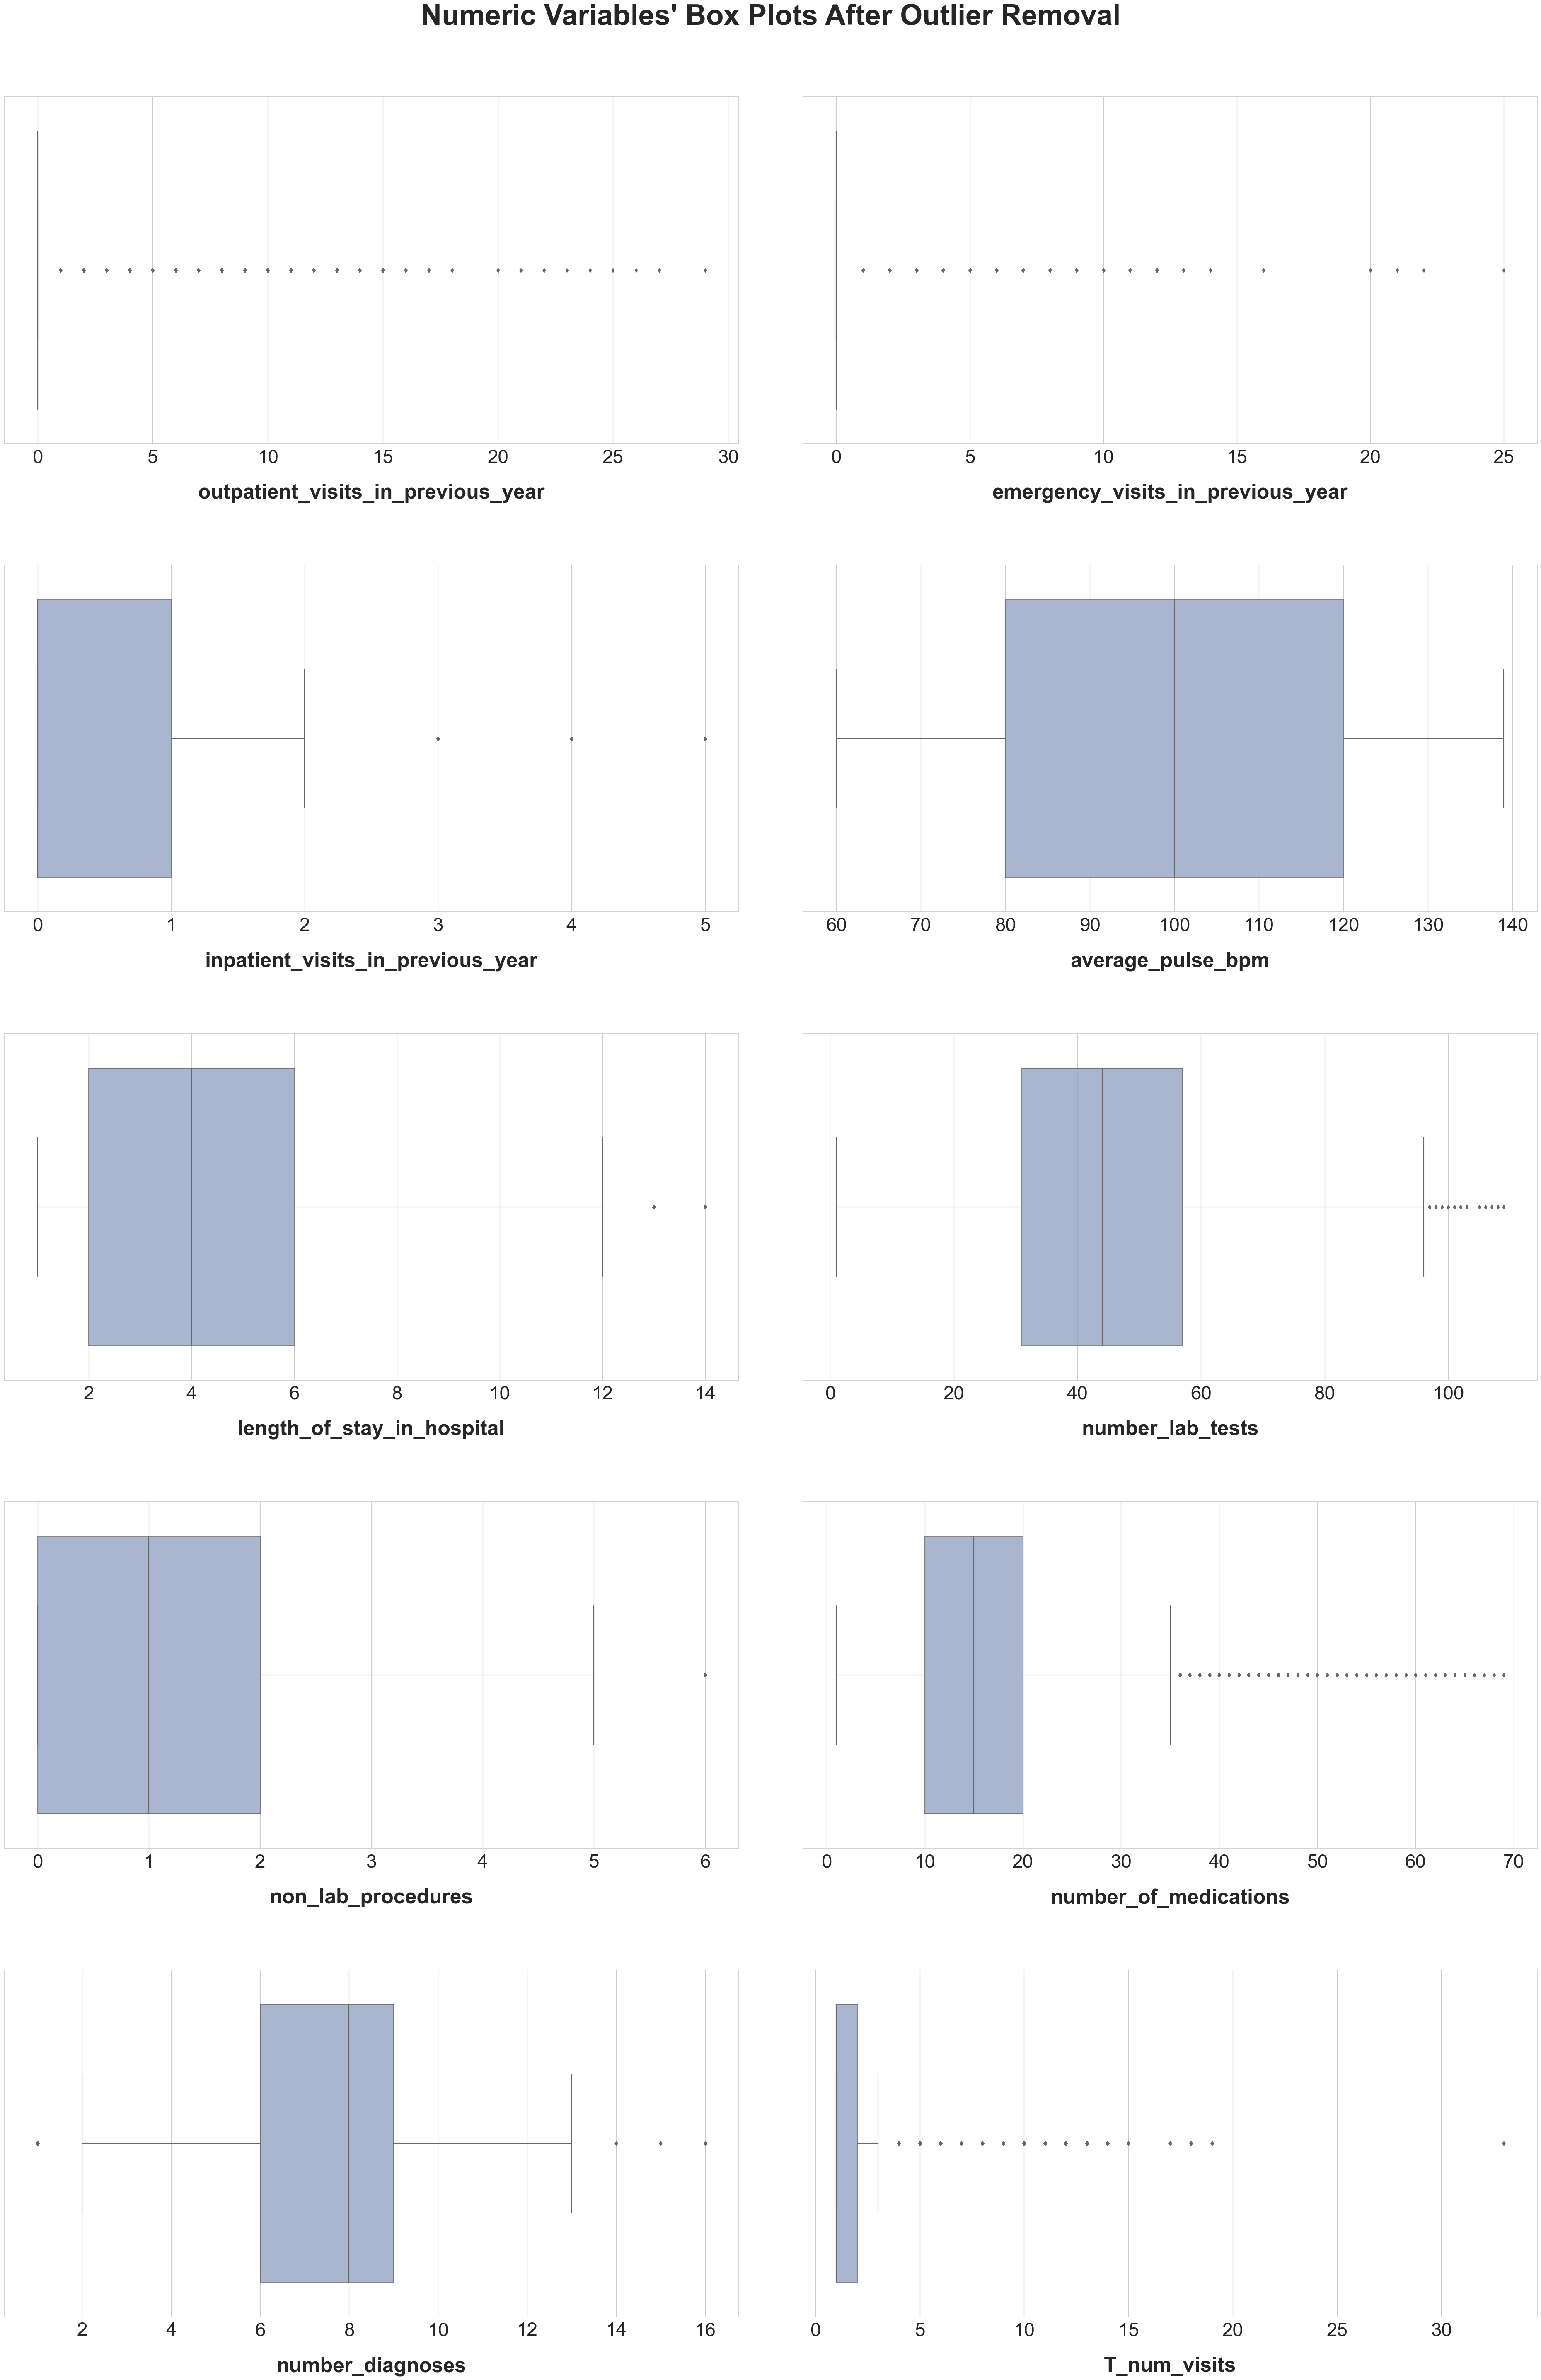

In [205]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Get array of features
data = X_train[numerical]

a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(40, 70))

# Building the Histograms
for i in data:
    plt.subplot(a, b, c)
    plt.xlabel(i, fontweight="bold", labelpad=30)
    sns.boxplot(x=data[i], color=sns.color_palette("Set2")[2], boxprops=dict(alpha=.8))
    c = c + 1

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots After Outlier Removal"
plt.suptitle(title, fontsize=50, fontweight="bold")
plt.tight_layout(pad=3)

plt.show()

### 2.5 Scaling the Data <a class="anchor" id="scaling"></a>

In [290]:
scaler = MinMaxScaler().fit(X_train[numerical])
X_train_num_scaled = scaler.transform(X_train[numerical])
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = numerical).set_index(X_train.index)
X_train[numerical] =X_train_num_scaled

In [291]:
X_train.describe().T

count      mean       std  min  \
outpatient_visits_in_previous_year  49254.0  0.012434  0.042146  0.0   
emergency_visits_in_previous_year   49254.0  0.006919  0.027773  0.0   
inpatient_visits_in_previous_year   49254.0  0.110229  0.195228  0.0   
average_pulse_bpm                   49254.0  0.501995  0.291700  0.0   
length_of_stay_in_hospital          49254.0  0.261064  0.230614  0.0   
number_lab_tests                    49254.0  0.389376  0.181599  0.0   
non_lab_procedures                  49254.0  0.223982  0.285129  0.0   
number_of_medications               49254.0  0.220273  0.119106  0.0   
number_diagnoses                    49254.0  0.427942  0.129102  0.0   
insurance                           49254.0  0.604052  0.489058  0.0   
T_num_visits                        49254.0  0.025545  0.048050  0.0   
glipizide                           49254.0  0.124051  0.329643  0.0   
glyburide                           49254.0  0.106814  0.308879  0.0   
glimepiride                         49254.0  0.050635  0.219254  0.0   
pioglitazone                        49254.0  0.071771  0.258111  0.0   
no medication prescribed            49254.0  0.228814  0.420073  0.0   
metformin                           49254.0  0.197283  0.397952  0.0   
insulin                             49254.0  0.533845  0.498858  0.0   
rosiglitazone                       49254.0  0.062310  0.241720  0.0   

                                         25%       50%       75%  max  
outpatient_visits_in_previous_year  0.000000  0.000000  0.000000  1.0  
emergency_visits_in_previous_year   0.000000  0.000000  0.000000  1.0  
inpatient_visits_in_previous_year   0.000000  0.000000  0.200000  1.0  
average_pulse_bpm                   0.253165  0.506329  0.759494  1.0  
length_of_stay_in_hospital          0.076923  0.230769  0.384615  1.0  
number_lab_tests                    0.277778  0.398148  0.518519  1.0  
non_lab_procedures                  0.000000  0.166667  0.333333  1.0  
number_of_medications               0.132353  0.205882  0.279412  1.0  
number_diagnoses                    0.333333  0.466667  0.533333  1.0  
insurance                           0.000000  1.000000  1.000000  1.0  
T_num_visits                        0.000000  0.000000  0.031250  1.0  
glipizide                           0.000000  0.000000  0.000000  1.0  
glyburide                           0.000000  0.000000  0.000000  1.0  
glimepiride                         0.000000  0.000000  0.000000  1.0  
pioglitazone                        0.000000  0.000000  0.000000  1.0  
no medication prescribed            0.000000  0.000000  0.000000  1.0  
metformin                           0.000000  0.000000  0.000000  1.0  
insulin                             0.000000  1.000000  1.000000  1.0  
rosiglitazone                       0.000000  0.000000  0.000000  1.0

In [292]:
scaler = MinMaxScaler().fit(X_val[numerical])
X_val_num_scaled = scaler.transform(X_val[numerical])
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = numerical).set_index(X_val.index)
X_val[numerical] =X_val_num_scaled

In [293]:
numerical_until_scalling= numerical.copy()

### 2.6 Treating Missing Values <a class="anchor" id="treatingmissingvalues"></a>

In [294]:
# Count of missing values
a=X_train.isnull().sum()
# % of missing values
missing_percentage=(a/X_train.isnull().count())*100

In [295]:
missing_data = pd.DataFrame({'Missings values': a.sort_values(ascending=False), '% Missing values': missing_percentage.sort_values(ascending=False)})
missing_data= missing_data[missing_data["Missings values"]!=0]
print("\033[1m-> Missing data:\033[0m")
missing_data

-> Missing data:


Missings values  % Missing values
weight                           47678         96.800260
medical_specialty                24194         49.120884
admission_type                    4912          9.972794
race                              3466          7.036992
admission_source                  3371          6.844114
age                               2481          5.037154
discharge_disposition             1783          3.620011
Additional_Diagnosis               714          1.449628
Second_Diagnosis                   187          0.379665
First_Diagnosis                     12          0.024364
gender                               2          0.004061

As we noticed only categorical variables had missing values!<br>
1st: we will drop the variables that have more than 50% missing values: weight.<br>
2nd: we will fill in the missing values of the rest.<br>



In [296]:
X_train = X_train.drop('weight', axis=1)
X_val = X_val.drop('weight', axis=1)
categorical.remove('weight')

**How will I address the missing values?**
1) Check if it´s a variable that could be the same for different encounter_id  that correspond to the same patient_id
2) If a variable has 5 or less % missing values ==> I will fill the missing values with the mode
3) Otherwise we will use a model Random Forest classifier to predict those values.
   

#### 1) Using the patient_id duplicates to fill the missing values 

What if for a certain patient, we have on a certain visit, a missing value in a certain variable that might not change with the changing of visits?
* According to the **missing_data** the variables that we might check in the missing data for duplicate patient_id are:
look_for_missing= ['race', 'gender']
* All the others might change with the visit.
* In doubt about
    * age? ==> Check coehrence checking 2.1
    *  payer_code? It does not have to be always the same for a certain patient, for instance, check train.loc[train['patient_id'] == '99970974', 'payer_code']

In [297]:
look_for_missing = ['race', 'gender']
before=X_train[look_for_missing].copy()


# Find missing values in specified columns
missing_data = X_train[X_train[look_for_missing].isnull().any(axis=1)]

# Identify duplicated patient_ids with missing values
duplicated_ids = missing_data[missing_data.duplicated(subset='patient_id', keep=False)]

# Iterate over each missing column to fill NaN values
for index, row in duplicated_ids.iterrows():
    for column in look_for_missing:
        if pd.isnull(row[column]):
            patient_id = row['patient_id']
            non_null_values = X_train.loc[(X_train['patient_id'] == patient_id) & (~X_train[column].isnull()), column]
            if not non_null_values.empty:
                non_null_value = non_null_values.iloc[0]
                X_train.loc[index, column] = non_null_value
X_with_patient_id= X_train.copy() 
X_train.drop('patient_id', axis=1, inplace=True)
categorical.remove('patient_id')

In [298]:
before.isna().sum()

race      3466
gender       2
dtype: int64

In [299]:
X_train[look_for_missing].isna().sum()

race      3412
gender       2
dtype: int64

In [300]:
before=X_val[look_for_missing].copy()


# Find missing values in specified columns
missing_data = X_val[X_val[look_for_missing].isnull().any(axis=1)]

# Identify duplicated patient_ids with missing values
duplicated_ids = missing_data[missing_data.duplicated(subset='patient_id', keep=False)]

# Iterate over each missing column to fill NaN values
for index, row in duplicated_ids.iterrows():
    for column in look_for_missing:
        if pd.isnull(row[column]):
            patient_id = row['patient_id']
            non_null_values = X_val.loc[(X_val['patient_id'] == patient_id) & (~X_val[column].isnull()), column]
            if not non_null_values.empty:
                non_null_value = non_null_values.iloc[0]
                X_val.loc[index, column] = non_null_value
X_val.drop('patient_id', axis=1, inplace=True)


In [301]:
before.isna().sum()

race      1565
gender       1
dtype: int64

In [302]:
X_val[look_for_missing].isna().sum()

race      1559
gender       1
dtype: int64

In [303]:
train_for_histgrad=X_train.copy()
val_for_histgrad=X_val.copy()

In [304]:
a=X_train.isnull().sum()
# % of missing values
missing_percentage=(a/X_train.isnull().count())*100

In [306]:
missing_data = pd.DataFrame({'Missings values': a.sort_values(ascending=False), '% Missing values': missing_percentage.sort_values(ascending=False)})
missing_data= missing_data[missing_data["Missings values"]!=0]
print("\033[1m-> Missing data:\033[0m")
missing_data

-> Missing data:


Missings values  % Missing values
medical_specialty                24194         49.120884
admission_type                    4912          9.972794
race                              3412          6.927356
admission_source                  3371          6.844114
age                               2481          5.037154
discharge_disposition             1783          3.620011
Additional_Diagnosis               714          1.449628
Second_Diagnosis                   187          0.379665
First_Diagnosis                     12          0.024364
gender                               2          0.004061

#### 2) <= 5%  missing values

In [307]:
# List of variables to process
variables_to_fill = ['age','gender', 'First_Diagnosis', 'Second_Diagnosis','Additional_Diagnosis','discharge_disposition']

# Calculate and store the mode for each variable
modes = {}
for variable in variables_to_fill:
    mode_value = X_train[variable].mode().values[0]
    modes[variable] = mode_value

# Fill missing values with the mode value
for variable, mode_value in modes.items():
    X_train[variable].fillna(mode_value, inplace=True)


for variable in variables_to_fill:
    mode_value = X_val[variable].mode().values[0]
    modes[variable] = mode_value

# Fill missing values with the mode value
for variable, mode_value in modes.items():
    X_val[variable].fillna(mode_value, inplace=True)

#### 3) KNeighbors Classifier

In [308]:

from sklearn.neighbors import KNeighborsClassifier

# Define function to impute missing categorical values using KNN
def impute_categorical_with_knn(data,numerical_columns, categorical_column):
    # Extract the relevant data
    X_categorical = data[categorical_column].copy().to_frame()
    X_numerical = data[ numerical_columns]
    
    # Identify rows with missing values in the categorical column
    missing_rows = X_categorical[X_categorical[categorical_column].isnull()].index
    
    # Split the dataset into rows with and without missing values in the categorical column
    X_train = X_numerical.drop(index=missing_rows)
    y_train = X_categorical[categorical_column].drop(index=missing_rows)
    
    # Split the dataset into training and test sets
    X_train_split, X_test, y_train_split, y_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # Initialize a KNeighborsClassifier
    classifier = KNeighborsClassifier()
    
    # Fit the classifier on the rows with non-missing values
    classifier.fit(X_train_split, y_train_split)
    
    # Predict the missing values
    predicted_values = classifier.predict(X_test)
    
    # Fill the missing values in the original dataset with predictions
    X_categorical.loc[missing_rows, categorical_column] = classifier.predict(X_numerical.loc[missing_rows])
    
    return X_categorical

# List of categorical columns to impute
categorical_columns = ['medical_specialty', 'admission_type', 'admission_source', 'race']

for column in categorical_columns:
    X_train[column] = impute_categorical_with_knn(X_train,numerical, column)
    X_val[column] = impute_categorical_with_knn(X_val,numerical, column)

In [309]:
X_train.isna().sum()

race                                     0
gender                                   0
age                                      0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
insurance                                0
First_Diagnosis                          0
Second_Diagnosis                         0
Additional_

In [310]:
X_val.isna().sum()

race                                     0
gender                                   0
age                                      0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
insurance                                0
First_Diagnosis                          0
Second_Diagnosis                         0
Additional_

### 2.7 Encoding the Data  <a class="anchor" id="encoding"></a>

To encode our categorical data we will separate the data in:
* **Ordinal**
    * age
    * a1c_test_result
    * glucose_test_result
* **Nominal**
    * glimepiride
    * pioglitazone
    * glyburide
    * insulin
    * rosiglitazone
    * glipizide
    * metformin
    * no medication prescribed
    *  prescribed_diabetes_meds
    * change_in_meds_during_hospitalization
    * admission_source
    * discharge_disposition
    * medical_specialty
    * admission_type
    * gender
    * race
    * patient_id
    * insurance
    * First_Diagnosis
    * Second_Diagnosis
    * Additional_Diagnosis

#### 2.7.1 Nominal Variables<a class="anchor" id="nominal"></a>

First, let´s  reduce the number of categories of certain nominal variables.

##### **1) Discharge_disposition:**
At this step, we will reduce the unique values and create columns with the most significant (more than 1%) Discharge_disposition:

In [311]:
discharge_counts = X_train['discharge_disposition'].value_counts(normalize=True) * 100
discharge_df = pd.DataFrame({'Discharge Type': discharge_counts.index, 'Percentage': discharge_counts.values})

# Adjust the display options to show the full strings without truncation
pd.set_option('display.max_colwidth', None)

In [312]:
discharge_df

Discharge Type  \
0                                                                                          Discharged to home   
1                                                                               Discharged/transferred to SNF   
2                                                     Discharged/transferred to home with home health service   
3                                                       Discharged/transferred to another short term hospital   
4                           Discharged/transferred to another rehab fac including rehab units of a hospital .   
5                                                                                                     Expired   
6                                        Discharged/transferred to another type of inpatient care institution   
7                                                                                                  Not Mapped   
8                                                                               Discharged/transferred to ICF   
9                                                                                                    Left AMA   
10                                                       Discharged/transferred to a long term care hospital.   
11                                                                                 Hospice / medical facility   
12                                                                                             Hospice / home   
13  Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital   
14                                              Discharged/transferred to home under care of Home IV provider   
15                              Discharged/transferred within this institution to Medicare approved swing bed   
16    Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.   
17                                                                  Admitted as an inpatient to this hospital   
18                                Discharged/transferred/referred another institution for outpatient services   
19                                Discharged/transferred/referred to this institution for outpatient services   
20                                                                   Expired at home. Medicaid only, hospice.   
21                                                  Discharged/transferred to a federal health care facility.   
22                                                Still patient or expected to return for outpatient services   
23                                              Neonate discharged to another hospital for neonatal aftercare   

    Percentage  
0    63.140050  
1    13.665895  
2    12.565477  
3     2.103382  
4     1.914565  
5     1.563325  
6     1.197872  
7     0.990782  
8     0.777602  
9     0.550209  
10    0.404028  
11    0.383725  
12    0.343119  
13    0.121818  
14    0.115727  
15    0.054818  
16    0.046697  
17    0.020303  
18    0.012182  
19    0.010151  
20    0.010151  
21    0.004061  
22    0.002030  
23    0.002030

In [313]:
# List of discharge types to be replaced with 'Other reason'
discharge_types_to_replace  = [
    "Not Mapped",
    "Discharged/transferred to ICF",
    "Left AMA",
    "Discharged/transferred to a long term care hospital.",
    "Hospice / medical facility",
    "Hospice / home",
    "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
    "Discharged/transferred to home under care of Home IV provider",
    "Discharged/transferred within this institution to Medicare approved swing bed",
    "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
    "Admitted as an inpatient to this hospital",
    "Discharged/transferred/referred another institution for outpatient services",
    "Discharged/transferred/referred to this institution for outpatient services",
    "Expired at home. Medicaid only, hospice.",
    "Discharged/transferred to a federal health care facility.",
    "Still patient or expected to return for outpatient services",
    "Neonate discharged to another hospital for neonatal aftercare"
]

In [314]:

# Replace specified discharge types with 'Other reason'
X_train['discharge_disposition'] = X_train['discharge_disposition'].replace(discharge_types_to_replace, 'Other reason')
X_val['discharge_disposition'] = X_val['discharge_disposition'].replace(discharge_types_to_replace, 'Other reason')

In [315]:
X_train['discharge_disposition'].unique()

array(['Discharged/transferred to another short term hospital',
       'Discharged/transferred to SNF', 'Discharged to home',
       'Other reason',
       'Discharged/transferred to home with home health service',
       'Expired',
       'Discharged/transferred to another rehab fac including rehab units of a hospital .',
       'Discharged/transferred to another type of inpatient care institution'],
      dtype=object)

In [316]:
set(X_val['discharge_disposition'].unique())-set(X_train['discharge_disposition'].unique())

{'Expired in a medical facility. Medicaid only, hospice.'}

In [317]:
 X_val['discharge_disposition'].value_counts(normalize=True)


discharge_disposition
Discharged to home                                                                   0.625755
Discharged/transferred to SNF                                                        0.139675
Discharged/transferred to home with home health service                              0.126714
Other reason                                                                         0.039493
Discharged/transferred to another short term hospital                                0.020682
Discharged/transferred to another rehab fac including rehab units of a hospital .    0.020542
Expired                                                                              0.016658
Discharged/transferred to another type of inpatient care institution                 0.010435
Expired in a medical facility. Medicaid only, hospice.                               0.000047
Name: proportion, dtype: float64

In [318]:
X_val['discharge_disposition'] = X_val['discharge_disposition'].replace('Expired in a medical facility. Medicaid only, hospice.', 'Other reason')

In [319]:
discharge_counts = X_train['discharge_disposition'].value_counts(normalize=True) * 100
discharge_df = pd.DataFrame({'discharge_disposition': discharge_counts.index, 'Percentage': discharge_counts.values})

# Adjust the display options to show the full strings without truncation
pd.set_option('display.max_colwidth', None)

In [320]:
discharge_df

discharge_disposition  \
0                                                                 Discharged to home   
1                                                      Discharged/transferred to SNF   
2                            Discharged/transferred to home with home health service   
3                                                                       Other reason   
4                              Discharged/transferred to another short term hospital   
5  Discharged/transferred to another rehab fac including rehab units of a hospital .   
6                                                                            Expired   
7               Discharged/transferred to another type of inpatient care institution   

   Percentage  
0   63.140050  
1   13.665895  
2   12.565477  
3    3.849434  
4    2.103382  
5    1.914565  
6    1.563325  
7    1.197872

In [321]:
X_train.discharge_disposition.unique()

array(['Discharged/transferred to another short term hospital',
       'Discharged/transferred to SNF', 'Discharged to home',
       'Other reason',
       'Discharged/transferred to home with home health service',
       'Expired',
       'Discharged/transferred to another rehab fac including rehab units of a hospital .',
       'Discharged/transferred to another type of inpatient care institution'],
      dtype=object)

##### **2) Medical_specialty:**
At this step, we will reduce the unique values and create columns with the most significant (more than 1%) medical specialties:

In [322]:
medical_specialty_counts = X_train['medical_specialty'].value_counts(normalize=True) * 100
medical_specialty_df = pd.DataFrame({'medical_specialty': medical_specialty_counts.index, 'Percentage': medical_specialty_counts.values})

# Adjust the display options to show the full strings without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [323]:
medical_specialty_df

medical_specialty  Percentage
0                       InternalMedicine   31.528404
1                       Emergency/Trauma   19.176108
2                 Family/GeneralPractice   15.158160
3                             Cardiology   12.876112
4                        Surgery-General    3.906282
5                             Nephrology    2.109473
6                            Orthopedics    2.012019
7             Orthopedics-Reconstructive    1.750112
8                            Radiologist    1.612052
9                             Psychiatry    1.000934
10                           Pulmonology    0.911601
11               ObstetricsandGynecology    0.905510
12       Surgery-Cardiovascular/Thoracic    0.854753
13                               Urology    0.826329
14                      Gastroenterology    0.708572
15                      Surgery-Vascular    0.588785
16     PhysicalMedicineandRehabilitation    0.558330
17                         Surgery-Neuro    0.515694
18                              Oncology    0.355301
19                   Hematology/Oncology    0.278150
20                            Pediatrics    0.267999
21                             Neurology    0.217241
22              Pediatrics-Endocrinology    0.186787
23                      Surgery-Thoracic    0.146181
24                        Otolaryngology    0.142120
25                         Endocrinology    0.131969
26                Surgery-Cardiovascular    0.123848
27                            Gynecology    0.117757
28                              Podiatry    0.113696
29                            Hematology    0.109636
30                            Psychology    0.079181
31               Pediatrics-CriticalCare    0.077151
32                           Hospitalist    0.060909
33                         Ophthalmology    0.056848
34                             Radiology    0.050757
35                               Surgeon    0.044666
36                            Obstetrics    0.036545
37                       Surgery-Plastic    0.036545
38                             Osteopath    0.036545
39                    InfectiousDiseases    0.034515
40                     SurgicalSpecialty    0.032485
41                          Rheumatology    0.022333
42  Obsterics&Gynecology-GynecologicOnco    0.022333
43                             Pathology    0.020303
44                  Cardiology-Pediatric    0.020303
45                Pediatrics-Pulmonology    0.020303
46                        Anesthesiology    0.018273
47              Anesthesiology-Pediatric    0.018273
48                  Pediatrics-Neurology    0.014212
49                  AllergyandImmunology    0.014212
50                     PhysicianNotFound    0.012182
51                      OutreachServices    0.012182
52                 Surgery-Maxillofacial    0.010151
53                  Surgery-Colon&Rectal    0.008121
54           Psychiatry-Child/Adolescent    0.008121
55              Endocrinology-Metabolism    0.006091
56        Pediatrics-Hematology-Oncology    0.006091
57                     Surgery-Pediatric    0.006091
58                             Dentistry    0.006091
59                               DCPTEAM    0.004061
60                                Speech    0.002030
61                            Proctology    0.002030
62       Pediatrics-AllergyandImmunology    0.002030
63          Pediatrics-EmergencyMedicine    0.002030
64                              Resident    0.002030
65         Pediatrics-InfectiousDiseases    0.002030
66                       Neurophysiology    0.002030

In [324]:
# List of medical specialties to be replaced with 'Other'
medical_specialty_to_replace = [
    'Pulmonology',
    'ObstetricsandGynecology',
    'Surgery-Cardiovascular/Thoracic',
    'Urology',
    'Gastroenterology',
    'Surgery-Vascular',
    'PhysicalMedicineandRehabilitation',
    'Surgery-Neuro',
    'Oncology',
    'Pediatrics',
    'Hematology/Oncology',
    'Neurology',
    'Pediatrics-Endocrinology',
    'Endocrinology',
    'Surgery-Thoracic',
    'Otolaryngology',
    'Podiatry',
    'Surgery-Cardiovascular',
    'Gynecology',
    'Psychology',
    'Hematology',
    'Pediatrics-CriticalCare',
    'Hospitalist',
    'Radiology',
    'Surgeon',
    'Ophthalmology',
    'InfectiousDiseases',
    'Osteopath',
    'Surgery-Plastic',
    'SurgicalSpecialty',
    'Obstetrics',
    'Obsterics&Gynecology-GynecologicOnco',
    'Anesthesiology-Pediatric',
    'Rheumatology',
    'Pediatrics-Pulmonology',
    'Pathology',
    'AllergyandImmunology',
    'Anesthesiology',
    'Pediatrics-Neurology',
    'Surgery-Maxillofacial',
    'Cardiology-Pediatric',
    'OutreachServices',
    'Surgery-Colon&Rectal',
    'Psychiatry-Child/Adolescent',
    'PhysicianNotFound',
    'Dentistry',
    'Endocrinology-Metabolism',
    'Pediatrics-Hematology-Oncology',
    'DCPTEAM',
    'Surgery-Pediatric',
    'Pediatrics-AllergyandImmunology',
    'Resident',
    'Pediatrics-EmergencyMedicine',
    'Speech',
    'SportsMedicine',
    'Pediatrics-InfectiousDiseases',
    'Proctology',
    'Neurophysiology'
]


In [325]:
# Replace specified  medical specialties with 'Other'
X_train['medical_specialty'] = X_train['medical_specialty'].replace(medical_specialty_to_replace, 'Other')
X_val['medical_specialty'] = X_val['medical_specialty'].replace(medical_specialty_to_replace, 'Other')


In [326]:
set(X_train['medical_specialty'].unique())-set(X_val['medical_specialty'].unique())

set()

In [327]:
medical_specialty_counts = X_train['medical_specialty'].value_counts(normalize=True) * 100
medical_specialty_df = pd.DataFrame({'medical_specialty': medical_specialty_counts.index, 'Percentage': medical_specialty_counts.values})

# Adjust the display options to show the full strings without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [328]:
medical_specialty_df

medical_specialty  Percentage
0             InternalMedicine   31.528404
1             Emergency/Trauma   19.176108
2       Family/GeneralPractice   15.158160
3                   Cardiology   12.876112
4                        Other    8.870346
5              Surgery-General    3.906282
6                   Nephrology    2.109473
7                  Orthopedics    2.012019
8   Orthopedics-Reconstructive    1.750112
9                  Radiologist    1.612052
10                  Psychiatry    1.000934

##### **3) Admission Source:**
At this step, we will reduce the unique values and create columns with the most significant (more than 1%) admission sources:

In [329]:
admission_source_counts = X_train['admission_source'].value_counts(normalize=True) * 100
admission_source_df = pd.DataFrame({'admission_source': admission_source_counts.index, 'Percentage': admission_source_counts.values})

# Adjust the display options to show the full strings without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [330]:
admission_source_df

admission_source  Percentage
0                                               Emergency Room   60.766638
1                                           Physician Referral   31.595403
2                                     Transfer from a hospital    3.130710
3                   Transfer from another health care facility    2.202867
4                                              Clinic Referral    1.110570
5               Transfer from a Skilled Nursing Facility (SNF)    0.822268
6                                                 HMO Referral    0.172575
7                                                   Not Mapped    0.152272
8                                        Court/Law Enforcement    0.016242
9    Transfer from hospital inpt/same fac reslt in a sep claim    0.012182
10                       Transfer from critial access hospital    0.010151
11                     Transfer from Ambulatory Surgery Center    0.002030
12                                            Extramural Birth    0.002030
13                                             Normal Delivery    0.002030
14                                                   Sick Baby    0.002030

In [331]:
# List of admissions sources to be replaced with 'Other'
admission_source_to_replace = [
    " Transfer from a Skilled Nursing Facility (SNF)",
    "HMO Referral",
    " Not Mapped",
    " Court/Law Enforcement",
    " Transfer from hospital inpt/same fac reslt in a sep claim",
    " Transfer from critial access hospital",
    " Transfer from Ambulatory Surgery Center",
    " Extramural Birth",
    "Normal Delivery",
    " Sick Baby"
    
]


In [332]:
# Replace specified  medical specialties with 'Other'
X_train['admission_source'] = X_train['admission_source'].replace(admission_source_to_replace, 'Other')
X_val['admission_source'] = X_val['admission_source'].replace(admission_source_to_replace, 'Other')

In [333]:
set(X_train['admission_source'].unique())-set(X_val['admission_source'].unique())

set()

In [334]:
admission_source_counts = X_train['admission_source'].value_counts(normalize=True) * 100
admission_source_df = pd.DataFrame({'admission_source': admission_source_counts.index, 'Percentage': admission_source_counts.values})

# Adjust the display options to show the full strings without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [335]:
admission_source_df

admission_source  Percentage
0                               Emergency Room   60.766638
1                           Physician Referral   31.595403
2                     Transfer from a hospital    3.130710
3   Transfer from another health care facility    2.202867
4                                        Other    1.193812
5                              Clinic Referral    1.110570

##### **4) Admission Type:**
At this step, we will reduce the unique values and create columns with the most significant (more than 1%) admission types:

In [336]:
admission_type_counts = X_train['admission_type'].value_counts(normalize=True) * 100
admission_type_df = pd.DataFrame({'admission_type': admission_type_counts.index, 'Percentage': admission_type_counts.values})

# Adjust the display options to show the full strings without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [337]:
admission_type_df

admission_type  Percentage
0      Emergency   59.518009
1       Elective   21.307914
2         Urgent   18.824867
3     Not Mapped    0.316726
4  Trauma Center    0.024364
5        Newborn    0.008121

In [338]:
# List of admissions types to be replaced with 'Other'
admission_type_to_replace = [ "Newborn","Not Mapped", "Trauma Center",]

In [339]:
# Replace specified  medical specialties with 'Other'
X_train['admission_type'] = X_train['admission_type'].replace(admission_type_to_replace, 'Other')
X_val['admission_type'] = X_val['admission_type'].replace(admission_type_to_replace, 'Other')

In [340]:
set(X_train['admission_type'].unique())-set(X_val['admission_type'].unique())

set()

In [341]:
admission_type_counts = X_train['admission_type'].value_counts(normalize=True) * 100
admission_type_df = pd.DataFrame({'admission_type': admission_type_counts.index, 'Percentage': admission_type_counts.values})

# Adjust the display options to show the full strings without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [342]:
admission_type_df

admission_type  Percentage
0      Emergency   59.518009
1       Elective   21.307914
2         Urgent   18.824867
3          Other    0.349210

Given the Nominal Columns not all of them need to be encoded, just the following:

*  prescribed_diabetes_meds
*  change_in_meds_during_hospitalization
*  admission_source
*  discharge_disposition
*  medical_specialty
* admission_type
* gender
* race
* First_Diagnosis
* Second_Diagnosis
* Additional_Diagnosis

In [343]:
nominal_cols_to_encode = [ 'prescribed_diabetes_meds', 
                'change_in_meds_during_hospitalization',
                'admission_source', 'discharge_disposition', 'medical_specialty', 
                'admission_type', 'gender', 'race',
                'First_Diagnosis', 'Second_Diagnosis','Additional_Diagnosis'
               ]

In [344]:
#one-hot ecoding
X_train = pd.get_dummies(X_train, columns=nominal_cols_to_encode)
X_val = pd.get_dummies(X_val, columns=nominal_cols_to_encode)

#### 2.7.2 Ordinal Variables <a class="anchor" id="ordinal"></a>

In [345]:
ordinal_cols = ['age', 'a1c_test_result', 'glucose_test_result']

In [346]:
#____age
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train['age'] = label_encoder.fit_transform(X_train['age'])
X_val['age'] = label_encoder.fit_transform(X_val['age'])

#____a1c_test_result
# Mapping values to their corresponding encoded values
mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}

# Applying the mapping to the 'a1c_test_result' column
X_train['a1c_test_result'] = X_train['a1c_test_result'].replace(mapping)
X_val['a1c_test_result'] = X_val['a1c_test_result'].replace(mapping)


#____glucose_test_result
# Mapping values to their corresponding encoded values
mapping_glucose = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}

# Applying the mapping to the 'glucose_test_result' column
X_train['glucose_test_result'] = X_train['glucose_test_result'].replace(mapping_glucose)
X_val['glucose_test_result'] = X_val['glucose_test_result'].replace(mapping_glucose)


In [347]:
#Update categorical after the encoding process 
columns_not_in_numerical = list(set(X_train.columns) - set(numerical))
categorical=columns_not_in_numerical

In [348]:
categorical

['change_in_meds_during_hospitalization_No',
 'admission_type_Urgent',
 'medical_specialty_Radiologist',
 'Additional_Diagnosis_diseases of the respiratory system',
 'admission_type_Elective',
 'age',
 'Additional_Diagnosis_symptoms, signs, and ill-defined conditions',
 'race_Asian',
 'glipizide',
 'discharge_disposition_Discharged/transferred to another short term hospital',
 'glyburide',
 'admission_source_ Transfer from another health care facility',
 'admission_source_Clinic Referral',
 'First_Diagnosis_diseases of the genitourinary system',
 'discharge_disposition_Discharged/transferred to SNF',
 'Additional_Diagnosis_external causes of injury and supplemental classification',
 'First_Diagnosis_diseases of the digestive system',
 'Additional_Diagnosis_diseases of the genitourinary system',
 'medical_specialty_Surgery-General',
 'glimepiride',
 'race_Caucasian',
 'admission_type_Emergency',
 'Second_Diagnosis_diseases of the respiratory system',
 'First_Diagnosis_injury and poisoni

In [349]:
encoded_train=X_train.copy()

#### 2.7.3 Targets <a class="anchor" id="targets"></a>

In [350]:
mapping_target_bin = {'No': 0, 'Yes': 1}

# Applying the mapping to the 'readmitted_binary' column
#because i ve done the split before i have to ecode the train and validation
y_train = np.array([mapping_target_bin[val] for val in y_train])
y_val = np.array([mapping_target_bin[val] for val in y_val])


#because i have not made the split with this target i don´t need to do it in train and validadtion just on all column of y_mult
mapping_target_mult={ '>30 days':2, '<30 days':1, 'No':0}
y_mult=y_mult.replace(mapping_target_mult)

### 2.8  Feature Selection Binary Target  <a class="anchor" id="featureselection-bin"></a>

In [351]:
X_mult_train, X_mult_val, y_mult_train, y_mult_val = train_test_split(X, y_mult,
                                                 test_size = 0.3,
                                                 shuffle = True,
                                                 random_state = 0,
                                                 stratify = y_mult)

In [352]:
"""X_train, X_val, y_train, y_val = train_test_split(X, y_bin,
                                                 test_size = 0.3,
                                                 shuffle = True,
                                                 random_state = 0,
                                                 stratify = y_bin)"""

#The previous split will be the binnary split
X_bin_train=X_train.copy()
X_bin_val=X_val.copy()
y_bin_train= y_train
y_bin_val=y_val

#Needed Alterations in Multiclass split
X_mult_train= X_train.copy()
X_mult_val=X_val.copy()
y_mult_train = np.delete(y_mult_train, outlier_indices, axis=0)
#if i delete the rows in x_train that are outliers those rows should not exist in y_mult_train
    


#### 2.8.1 Numerical Variables<a class="anchor" id="bin-numerical"></a>

##### **1) Univariate**

In [353]:
X_bin_train[numerical].var()

outpatient_visits_in_previous_year    0.001776
emergency_visits_in_previous_year     0.000771
inpatient_visits_in_previous_year     0.038114
average_pulse_bpm                     0.085089
length_of_stay_in_hospital            0.053183
number_lab_tests                      0.032978
non_lab_procedures                    0.081299
number_of_medications                 0.014186
number_diagnoses                      0.016667
T_num_visits                          0.002309
dtype: float64

Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent. ==> If the variable is a constant we dont care for it,this method remove constant variables!

**Conclusion:** None of the numerical variables verifies that condiction.


##### **2) Correlation Indices: Sperman**

In [354]:
def cor_heatmap(cor):
    plt.figure(figsize=(25, 25))
    heatmap = sns.heatmap(data=cor, annot=True, cmap='Blues', fmt='.1f')
    heatmap.set_title("Spearman’s Correlation Matrix")
    plt.show()


In [355]:
cor_spearman = X_bin_train[numerical].corr(method ='spearman')
cor_spearman

outpatient_visits_in_previous_year  \
outpatient_visits_in_previous_year                            1.000000   
emergency_visits_in_previous_year                             0.173125   
inpatient_visits_in_previous_year                             0.146351   
average_pulse_bpm                                             0.003079   
length_of_stay_in_hospital                                   -0.011674   
number_lab_tests                                             -0.022689   
non_lab_procedures                                           -0.028779   
number_of_medications                                         0.069108   
number_diagnoses                                              0.109718   
T_num_visits                                                  0.127113   

                                    emergency_visits_in_previous_year  \
outpatient_visits_in_previous_year                           0.173125   
emergency_visits_in_previous_year                            1.000000   
inpatient_visits_in_previous_year                            0.197618   
average_pulse_bpm                                            0.000172   
length_of_stay_in_hospital                                  -0.005402   
number_lab_tests                                             0.001138   
non_lab_procedures                                          -0.045500   
number_of_medications                                        0.038570   
number_diagnoses                                             0.086227   
T_num_visits                                                 0.175051   

                                    inpatient_visits_in_previous_year  \
outpatient_visits_in_previous_year                           0.146351   
emergency_visits_in_previous_year                            0.197618   
inpatient_visits_in_previous_year                            1.000000   
average_pulse_bpm                                            0.004685   
length_of_stay_in_hospital                                   0.088368   
number_lab_tests                                             0.038508   
non_lab_procedures                                          -0.068164   
number_of_medications                                        0.094294   
number_diagnoses                                             0.136001   
T_num_visits                                                 0.515799   

                                    average_pulse_bpm  \
outpatient_visits_in_previous_year           0.003079   
emergency_visits_in_previous_year            0.000172   
inpatient_visits_in_previous_year            0.004685   
average_pulse_bpm                            1.000000   
length_of_stay_in_hospital                   0.003025   
number_lab_tests                            -0.000605   
non_lab_procedures                          -0.005906   
number_of_medications                        0.004163   
number_diagnoses                            -0.002005   
T_num_visits                                 0.001512   

                                    length_of_stay_in_hospital  \
outpatient_visits_in_previous_year                   -0.011674   
emergency_visits_in_previous_year                    -0.005402   
inpatient_visits_in_previous_year                     0.088368   
average_pulse_bpm                                     0.003025   
length_of_stay_in_hospital                            1.000000   
number_lab_tests                                      0.333965   
non_lab_procedures                                    0.189910   
number_of_medications                                 0.462541   
number_diagnoses                                      0.241575   
T_num_visits                                          0.064225   

                                    number_lab_tests  non_lab_procedures  \
outpatient_visits_in_previous_year         -0.022689           -0.028779   
emergency_visits_in_previous_year           0.001138           -0.045500   
inpatient_visits_in_previous_y

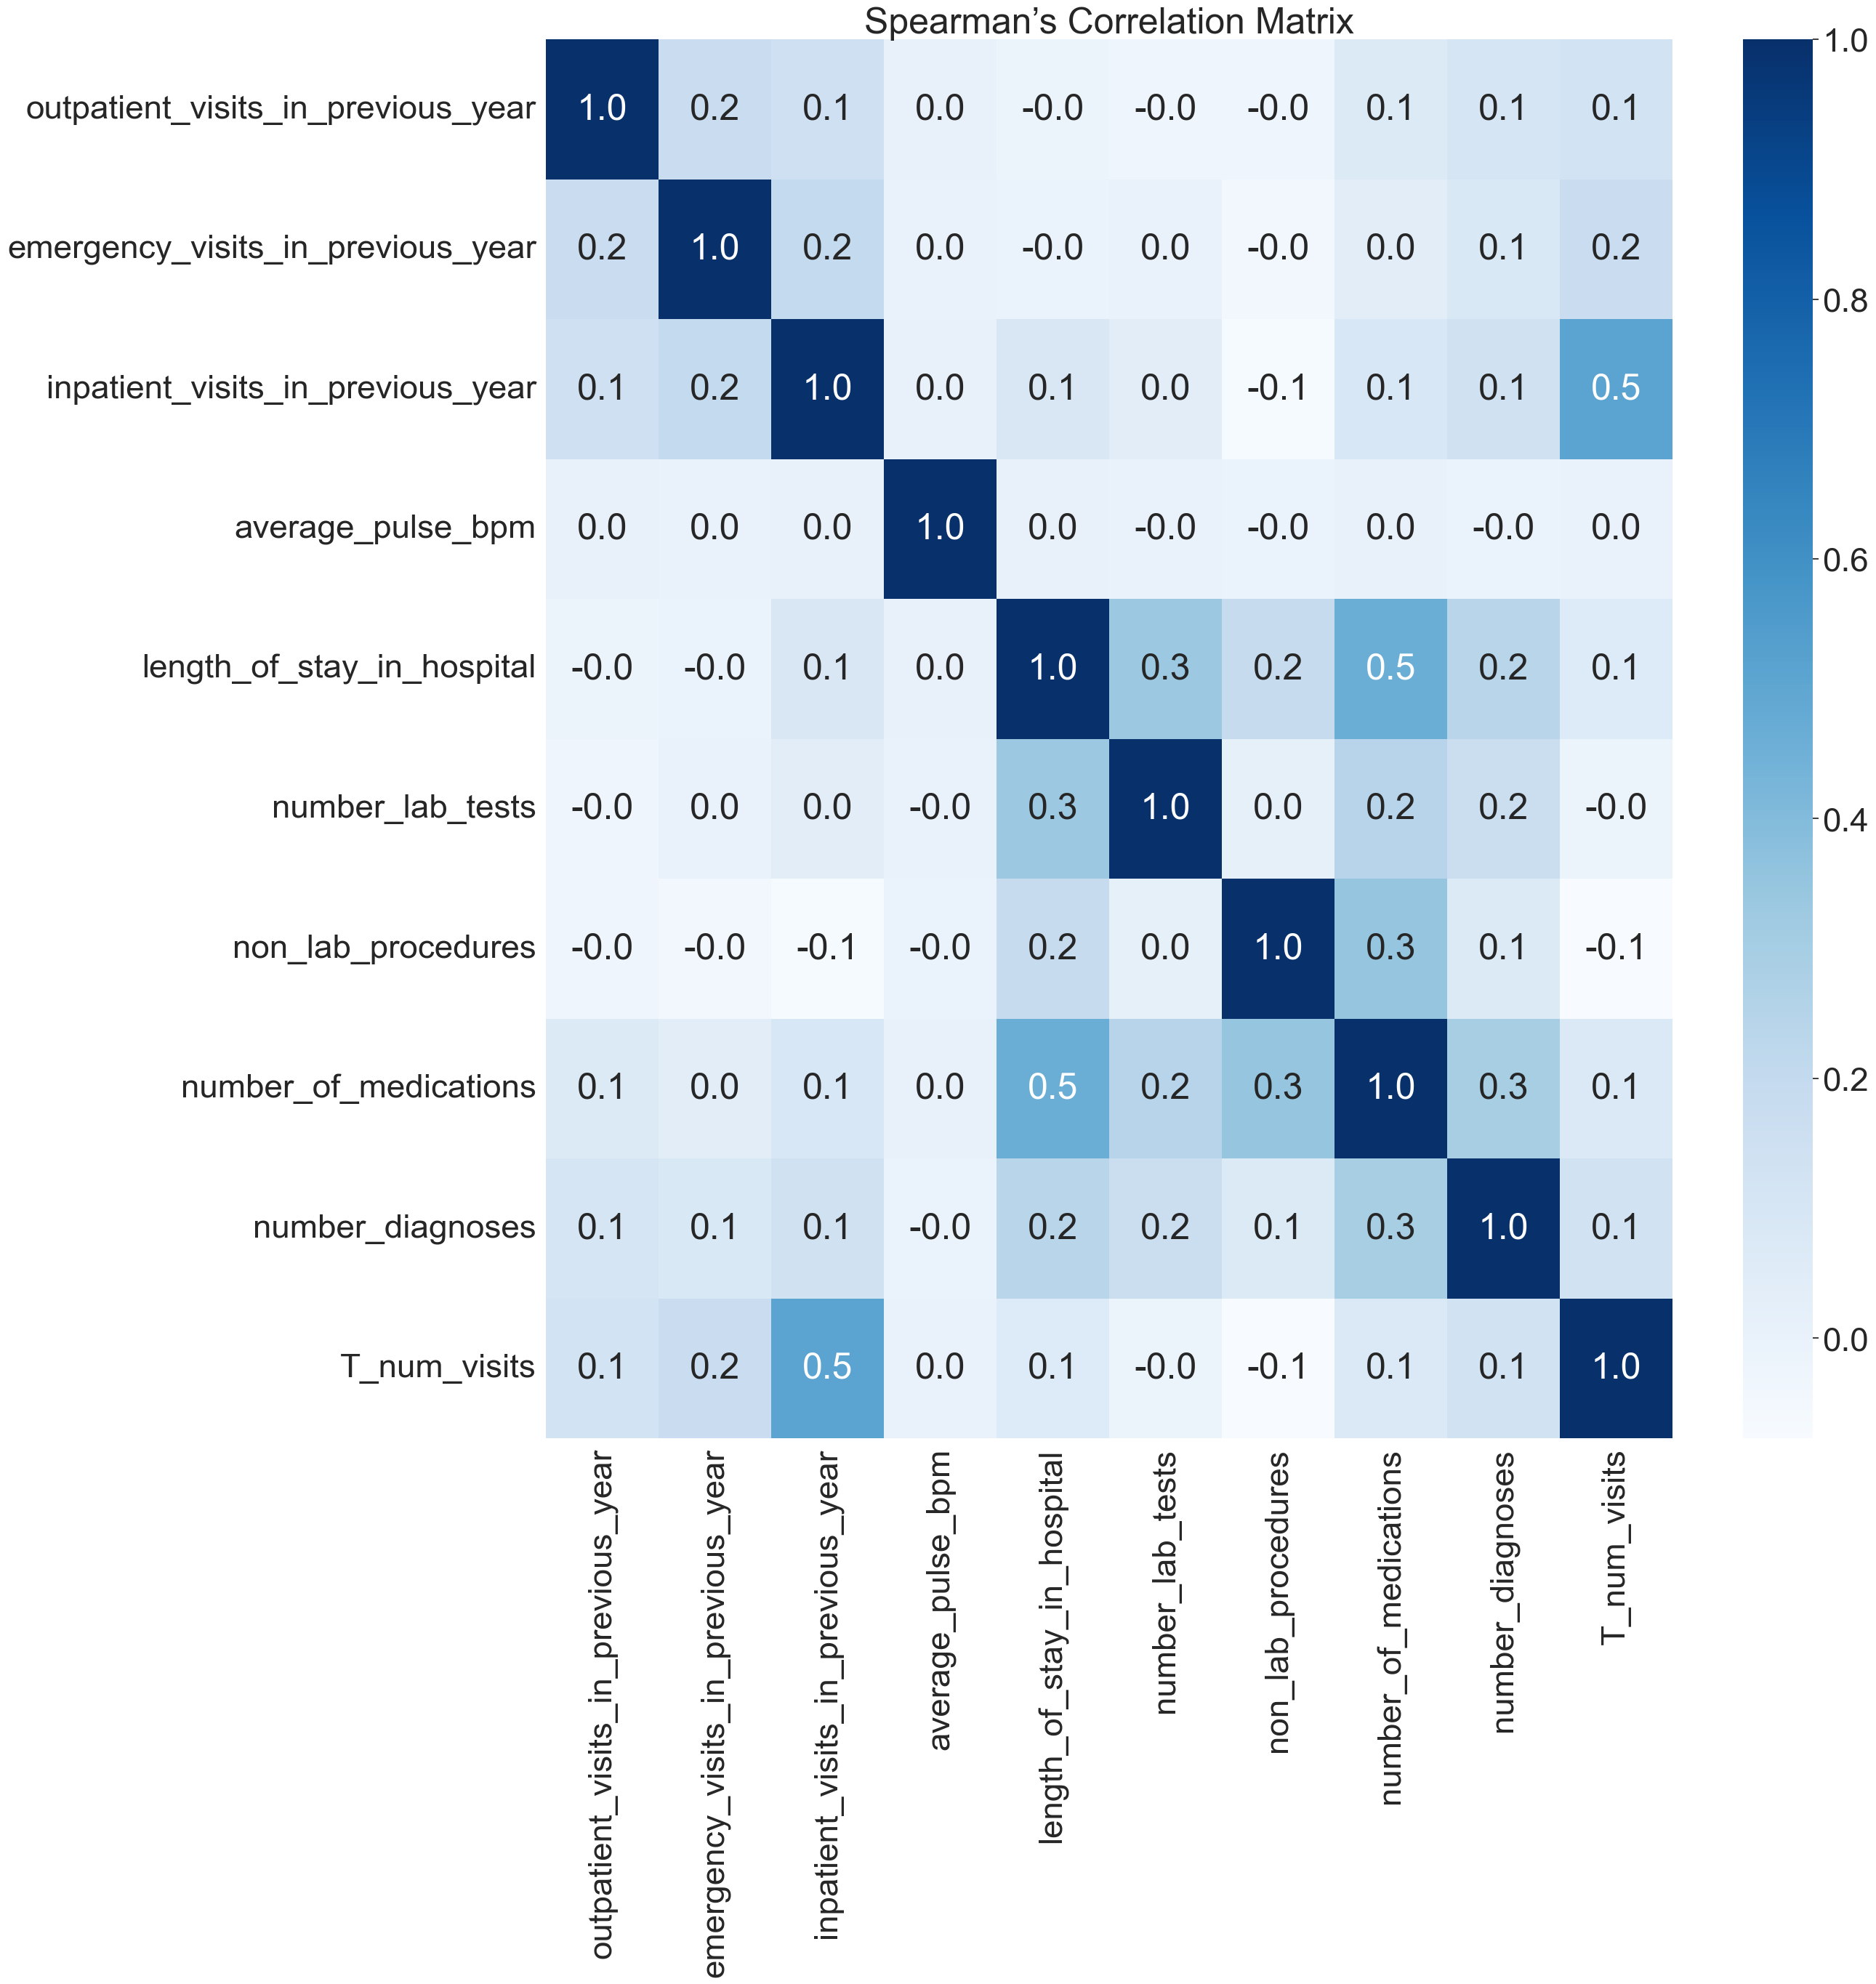

In [356]:
cor_heatmap(cor_spearman)

**Conclusion**
* We need to use other techniques of feature selection to decide which variables should we keep because there´s no high correlation between any numerical variables. We could just highlight correlations of 0.5 between:
  + length_of_stay_in_hospital and number_of_medications
  + T_num_visits and  inpatient_visits_in_previous_year


#####  **3) ANOVA**

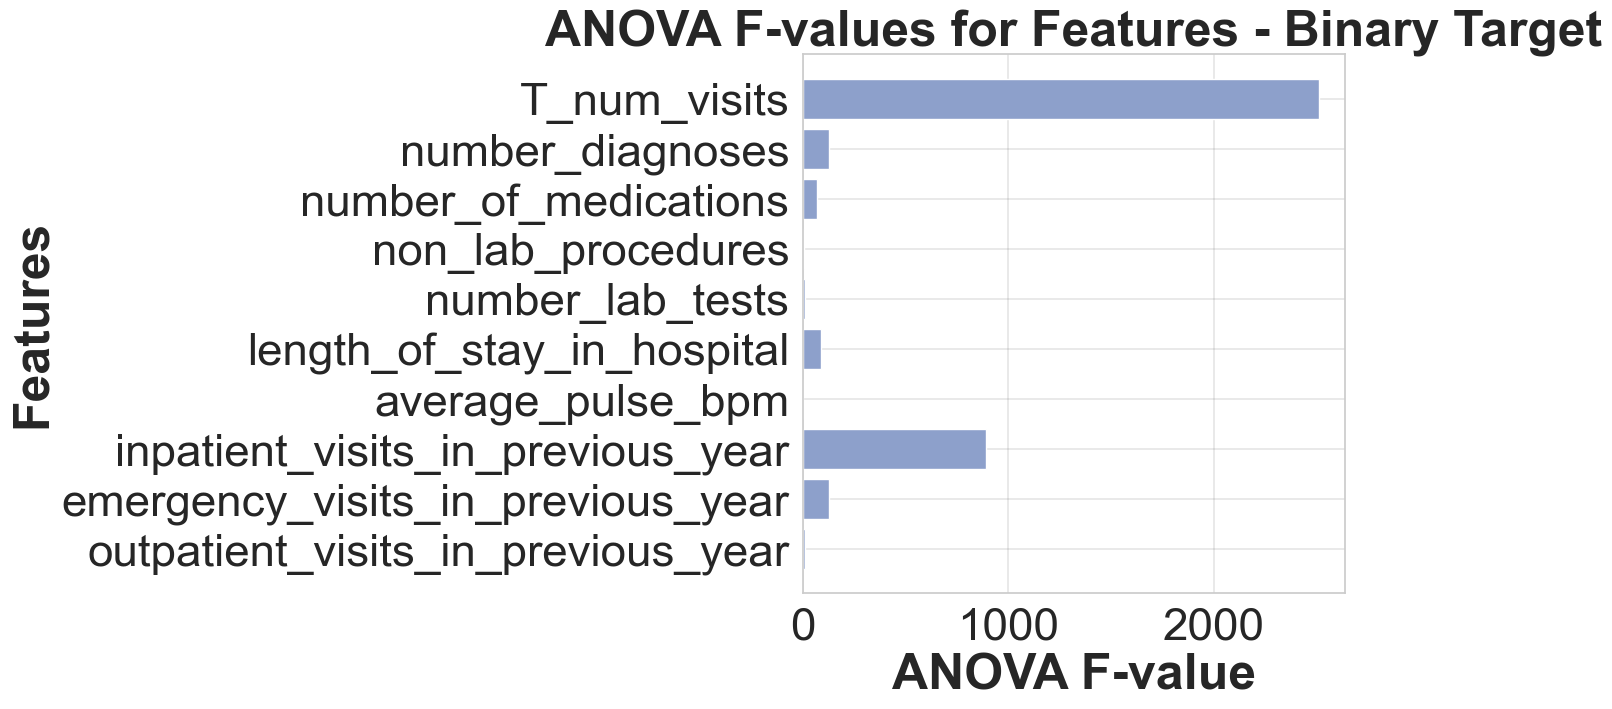

In [357]:


fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_bin_train[numerical], y_bin_train)

plt.figure(figsize=(7, 7))  
sns.set_palette("Set2") 
plt.yticks(range(len(numerical)), numerical)
plt.barh([i for i in range(len(fs.scores_))], fs.scores_, color=sns.color_palette("Set2")[2])
plt.xlabel('ANOVA F-value' , fontweight='bold')  
plt.ylabel('Features', fontweight='bold')
plt.title('ANOVA F-values for Features - Binary Target', fontweight='bold')  # Bold title
plt.grid(True, color='grey', linestyle='-', linewidth=0.25)
plt.show()


**Conclusion** According to this analysis we will drop:
* number_lab_tests
* non_lab_procedures
* average_pulse_bpm
* outpatient_visits_in_previous_year

In [358]:
columns_to_drop = [
    'average_pulse_bpm',
    'outpatient_visits_in_previous_year',
    'number_lab_tests',
    'non_lab_procedures'
]


for i in columns_to_drop:
    if i  in numerical:
        numerical.remove(i)
   
X_bin_train = X_bin_train.drop(columns=columns_to_drop)
X_bin_val= X_bin_val.drop(columns=columns_to_drop)

#### 2.8.2 Categorcial Variables <a class="anchor" id="bin-categorical"></a>

In [359]:
categorical_mult=categorical.copy() #need to have a copy of the categorical variabels before deleting something in order to use it latter in multiclass

##### **Chi-Square**

Decision Making:

* If the p-value is less than the chosen significance level (α), typically 0.05, the null hypothesis is rejected.
* A low p-value implies that the observed association in the sample is unlikely to be due to chance, indicating that there's evidence to support that the variables are associated.
* If the p-value is greater than α, there's insufficient evidence to reject the null hypothesis, suggesting no significant association.



In [360]:
from scipy import stats

# Setting a seed for reproducibility
np.random.seed(42)

def TestIndependence(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    return {'Variable': var, 'p_value': p}

p_values = [{'Variable': column, 'p_value': TestIndependence(X_bin_train[column], y_bin_train, column)['p_value']} for column in categorical]

p_values_df = pd.DataFrame(p_values).sort_values(by='p_value', ascending=False)

display(p_values_df)

Variable  \
67                                                                                             pioglitazone   
24                                                      Second_Diagnosis_diseases of the circulatory system   
38                                                       First_Diagnosis_diseases of the respiratory system   
1                                                                                     admission_type_Urgent   
13                                                     First_Diagnosis_diseases of the genitourinary system   
18                                                                        medical_specialty_Surgery-General   
45                                                                       discharge_disposition_Other reason   
8                                                                                                 glipizide   
22                                                      Second_Diagnosis_diseases of the respiratory system   
12                                                                         admission_source_Clinic Referral   
7                                                                                                race_Asian   
6                                          Additional_Diagnosis_symptoms, signs, and ill-defined conditions   
72                                                        Second_Diagnosis_diseases of the digestive system   
56                                                                                            race_Hispanic   
37                                                                                     race_AfricanAmerican   
10                                                                                                glyburide   
39                                                                                            gender_Female   
29                                                                                              gender_Male   
62                               Second_Diagnosis_external causes of injury and supplemental classification   
57                                                                Additional_Diagnosis_injury and poisoning   
55                                                    Second_Diagnosis_diseases of the genitourinary system   
36                                                                                            rosiglitazone   
11                                             admission_source_ Transfer from another health care facility   
53                                                    Additional_Diagnosis_diseases of the digestive system   
31                                                                       medical_specialty_InternalMedicine   
77                                                                            medical_specialty_Orthopedics   
58                                                                             medical_specialty_Psychiatry   
60                                                                    Second_Diagnosis_injury and poisoning   
48                                             Second_Diagnosis_symptoms, signs, and ill-defined conditions   
49                                                  Additional_Diagnosis_diseases of the circulatory system   
74                                                                 medical_specialty_Family/GeneralPractice   
42                                                                admission_source_Transfer from a hospital   
73                                                       First_Diagnosis_diseases of the circulatory system   
59                                                                      Additional_Diagnosis_other diseases   
19                                                                                              glimepiride   
66                                                                                      glucose_test_re

In [361]:
# Filter for variables with p-value less than 0.05
non_significant_variables = p_values_df[p_values_df['p_value'] >= 0.05]

display(non_significant_variables)

Variable  \
67                                                                            pioglitazone   
24                                     Second_Diagnosis_diseases of the circulatory system   
38                                      First_Diagnosis_diseases of the respiratory system   
1                                                                    admission_type_Urgent   
13                                    First_Diagnosis_diseases of the genitourinary system   
18                                                       medical_specialty_Surgery-General   
45                                                      discharge_disposition_Other reason   
8                                                                                glipizide   
22                                     Second_Diagnosis_diseases of the respiratory system   
12                                                        admission_source_Clinic Referral   
7                                                                               race_Asian   
6                         Additional_Diagnosis_symptoms, signs, and ill-defined conditions   
72                                       Second_Diagnosis_diseases of the digestive system   
56                                                                           race_Hispanic   
37                                                                    race_AfricanAmerican   
10                                                                               glyburide   
39                                                                           gender_Female   
29                                                                             gender_Male   
62              Second_Diagnosis_external causes of injury and supplemental classification   
57                                               Additional_Diagnosis_injury and poisoning   
55                                   Second_Diagnosis_diseases of the genitourinary system   
36                                                                           rosiglitazone   
11                            admission_source_ Transfer from another health care facility   
53                                   Additional_Diagnosis_diseases of the digestive system   
31                                                      medical_specialty_InternalMedicine   
77                                                           medical_specialty_Orthopedics   
58                                                            medical_specialty_Psychiatry   
60                                                   Second_Diagnosis_injury and poisoning   
48                            Second_Diagnosis_symptoms, signs, and ill-defined conditions   
49                                 Additional_Diagnosis_diseases of the circulatory system   
74                                                medical_specialty_Family/GeneralPractice   
42                                               admission_source_Transfer from a hospital   
73                                      First_Diagnosis_diseases of the circulatory system   
59                                                     Additional_Diagnosis_other diseases   
19                                                                             glimepiride   
66                                                                     glucose_test_result   
20                                                                          race_Caucasian   
47  Second_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders   

     p_value  
67  1.000000  
24  0.997917  
38  0.982661  
1   0.820409  
13  0.798917  
18  0.774739  
45  0.771070  
8   0.764321  
22  0.748540  
12  0.695916  
7   0.659518  
6   0.648644  
72  0.624657  
56  0.476918  
37  0.393906  
10  0.370269  
39  0.369692  
29  0.369692  
62  0.364788  
57  0.358099  
55  0.314822  
36  0.271103  
11  0.269834  
53  0.258961  
31  0.258221  
77  0.257073  
58  0.2424

In [362]:
columns_to_drop = [
    'pioglitazone', 'Second_Diagnosis_diseases of the circulatory system',
    'First_Diagnosis_diseases of the respiratory system', 'admission_type_Urgent',
    'First_Diagnosis_diseases of the genitourinary system', 'medical_specialty_Surgery-General',
    'discharge_disposition_Other reason', 'glipizide', 'Second_Diagnosis_diseases of the respiratory system',
    'admission_source_Clinic Referral', 'race_Asian', 'Additional_Diagnosis_symptoms, signs, and ill-defined conditions',
    'Second_Diagnosis_diseases of the digestive system', 'race_Hispanic', 'race_AfricanAmerican',
    'glyburide', 'gender_Female', 'gender_Male', 'Second_Diagnosis_external causes of injury and supplemental classification',
    'Additional_Diagnosis_injury and poisoning', 'Second_Diagnosis_diseases of the genitourinary system',
    'rosiglitazone', 'admission_source_ Transfer from another health care facility',
    'Additional_Diagnosis_diseases of the digestive system', 'medical_specialty_InternalMedicine',
    'medical_specialty_Orthopedics', 'medical_specialty_Psychiatry', 'Second_Diagnosis_injury and poisoning',
    'Second_Diagnosis_symptoms, signs, and ill-defined conditions', 'Additional_Diagnosis_diseases of the circulatory system',
    'medical_specialty_Family/GeneralPractice', 'admission_source_Transfer from a hospital',
    'First_Diagnosis_diseases of the circulatory system', 'Additional_Diagnosis_other diseases',
    'glimepiride', 'glucose_test_result', 'race_Caucasian',
    'Second_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders'
]

for i in columns_to_drop:
    if i  in categorical:
        categorical.remove(i)
   
X_bin_train = X_bin_train.drop(columns=columns_to_drop)
X_bin_val= X_bin_val.drop(columns=columns_to_drop)

#### 2.8.3 Both <a class="anchor" id="bin-both"></a>

#####  **1) Mutual Information**

In the context of feature selection, mutual information assesses the relevance of a feature to the target variable. It evaluates how much knowing the value of a feature reduces the uncertainty about the target variable.

* Scoring Features: Each feature is scored based on its mutual information with the target variable. .

* Non-linear Relationships: Unlike correlation, mutual information can capture non-linear relationships between variables, making it useful for identifying complex associations between features and the target.

* Selection Criteria: Features with high mutual information scores are often selected for modeling, while features with low scores, indicating less relevance to the target, may be discarded or deprioritized.
* Application: Is a flexible measure that can be used in various scenarios involving both continuous and categorical variables as features or targets. 

In [363]:
from sklearn.feature_selection import mutual_info_classif


# Set a random seed for reproducibility
random_seed = 42


# Compute mutual information scores for each feature in X_bin_train with y_bin_train
mutual_info_scores = mutual_info_classif(X_bin_train, y_bin_train, random_state=random_seed)

# Create a DataFrame to store feature names and their corresponding mutual information scores
feature_scores = pd.DataFrame({'Feature': X_bin_train.columns, 'Mutual_Info_Score': mutual_info_scores})

# Sort the features based on their mutual information scores and display in a DataFrame
feature_scores = feature_scores.sort_values(by='Mutual_Info_Score', ascending=False)
display(feature_scores)


Feature  \
8                                                                                              T_num_visits   
19                                                                 discharge_disposition_Discharged to home   
11                                                                                                  insulin   
2                                                                         inpatient_visits_in_previous_year   
33                                                                                 admission_type_Emergency   
16                                                                         admission_source_ Emergency Room   
7                                                                                                 insurance   
13                                                                             prescribed_diabetes_meds_Yes   
15                                                                 change_in_meds_during_hospitalization_No   
5                                                                                          number_diagnoses   
1                                                                         emergency_visits_in_previous_year   
21  discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital .   
14                                                                 change_in_meds_during_hospitalization_Ch   
12                                                                              prescribed_diabetes_meds_No   
0                                                                                                       age   
28                                                                             medical_specialty_Nephrology   
3                                                                                length_of_stay_in_hospital   
45               Additional_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders   
20                                                      discharge_disposition_Discharged/transferred to SNF   
32                                                                                  admission_type_Elective   
22                              discharge_disposition_Discharged/transferred to another short term hospital   
17                                                                     admission_source_ Physician Referral   
24                            discharge_disposition_Discharged/transferred to home with home health service   
27                                                                       medical_specialty_Emergency/Trauma   
25                                                                            discharge_disposition_Expired   
23               discharge_disposition_Discharged/transferred to another type of inpatient care institution   
38                                First_Diagnosis_external causes of injury and supplemental classification   
37                    First_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders   
18                                                                                   admission_source_Other   
26                                                                             medical_specialty_Cardiology   
9                                                                                  no medication prescribed   
30                                                                                  medical_specialty_Other   
4                                                                                     number_of_medications   
39                                                                     First_Diagnosis_injury and poisoning   
44                                                  Additional_Diagnosis_diseases of the respiratory system   
43                                                Additional_Diagnosis_diseases of the genitourinary sys

In [364]:
mi_bool = feature_scores['Mutual_Info_Score'] > 0.000000

# Create dictionary with features as keys and True/False as values
feature_dict = dict(zip(feature_scores['Feature'], mi_bool))

# Display the dictionary
#print(feature_dict)

##### **2) Logistic Regression**

In [366]:
X_bin_train.shape

(49254, 47)

In [367]:
embeded_lr_selector = SelectFromModel(LogisticRegression(max_iter=1000,penalty="l2", random_state=42), max_features=47)
embeded_lr_selector.fit(X_bin_train, y_bin_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_bin_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

7 selected features
['emergency_visits_in_previous_year', 'number_diagnoses', 'T_num_visits', 'discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital .', 'discharge_disposition_Discharged/transferred to another short term hospital', 'discharge_disposition_Discharged/transferred to another type of inpatient care institution', 'discharge_disposition_Expired']


##### **3) Random Forest**  <a class="anchor" id="rf"></a>

In [368]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=47), max_features=47)
embeded_rf_selector.fit(X_bin_train, y_bin_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_bin_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

10 selected features
['age', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'length_of_stay_in_hospital', 'number_of_medications', 'number_diagnoses', 'a1c_test_result', 'insurance', 'T_num_visits', 'Additional_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders']


##### **4) Lasso**

In [369]:
reg = LassoCV(random_state=42)

In [370]:
reg.fit(X_bin_train, y_bin_train)

LassoCV(random_state=42)

In [371]:
coef = pd.Series(reg.coef_, index = X_bin_train.columns)
coef

age                                                                                                        0.002647
emergency_visits_in_previous_year                                                                          0.086830
inpatient_visits_in_previous_year                                                                          0.023775
length_of_stay_in_hospital                                                                                -0.001180
number_of_medications                                                                                      0.024647
number_diagnoses                                                                                           0.035815
a1c_test_result                                                                                           -0.002148
insurance                                                                                                 -0.026072
T_num_visits                                                            

In [372]:
print("Lasso picked " + str(sum(coef !=0
)) + " variables and eliminated the other " +  str(sum(coef ==0
)) + " variables")

Lasso picked 45 variables and eliminated the other 2 variables


In [373]:
coef.sort_values()

discharge_disposition_Expired                                                                             -0.089854
insurance                                                                                                 -0.026072
medical_specialty_Orthopedics-Reconstructive                                                              -0.023402
medical_specialty_Radiologist                                                                             -0.019481
admission_type_Other                                                                                      -0.018149
First_Diagnosis_symptoms, signs, and ill-defined conditions                                               -0.014952
admission_source_ Emergency Room                                                                          -0.013225
no medication prescribed                                                                                  -0.012308
Additional_Diagnosis_external causes of injury and supplemental classifi

In [374]:
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(20, 40))
    sns.set_palette("Set2")  
    imp_coef.plot(kind="barh", color=sns.color_palette("Set2")[2])
    plt.title("Feature importance using " + name + " Model")
    plt.show()

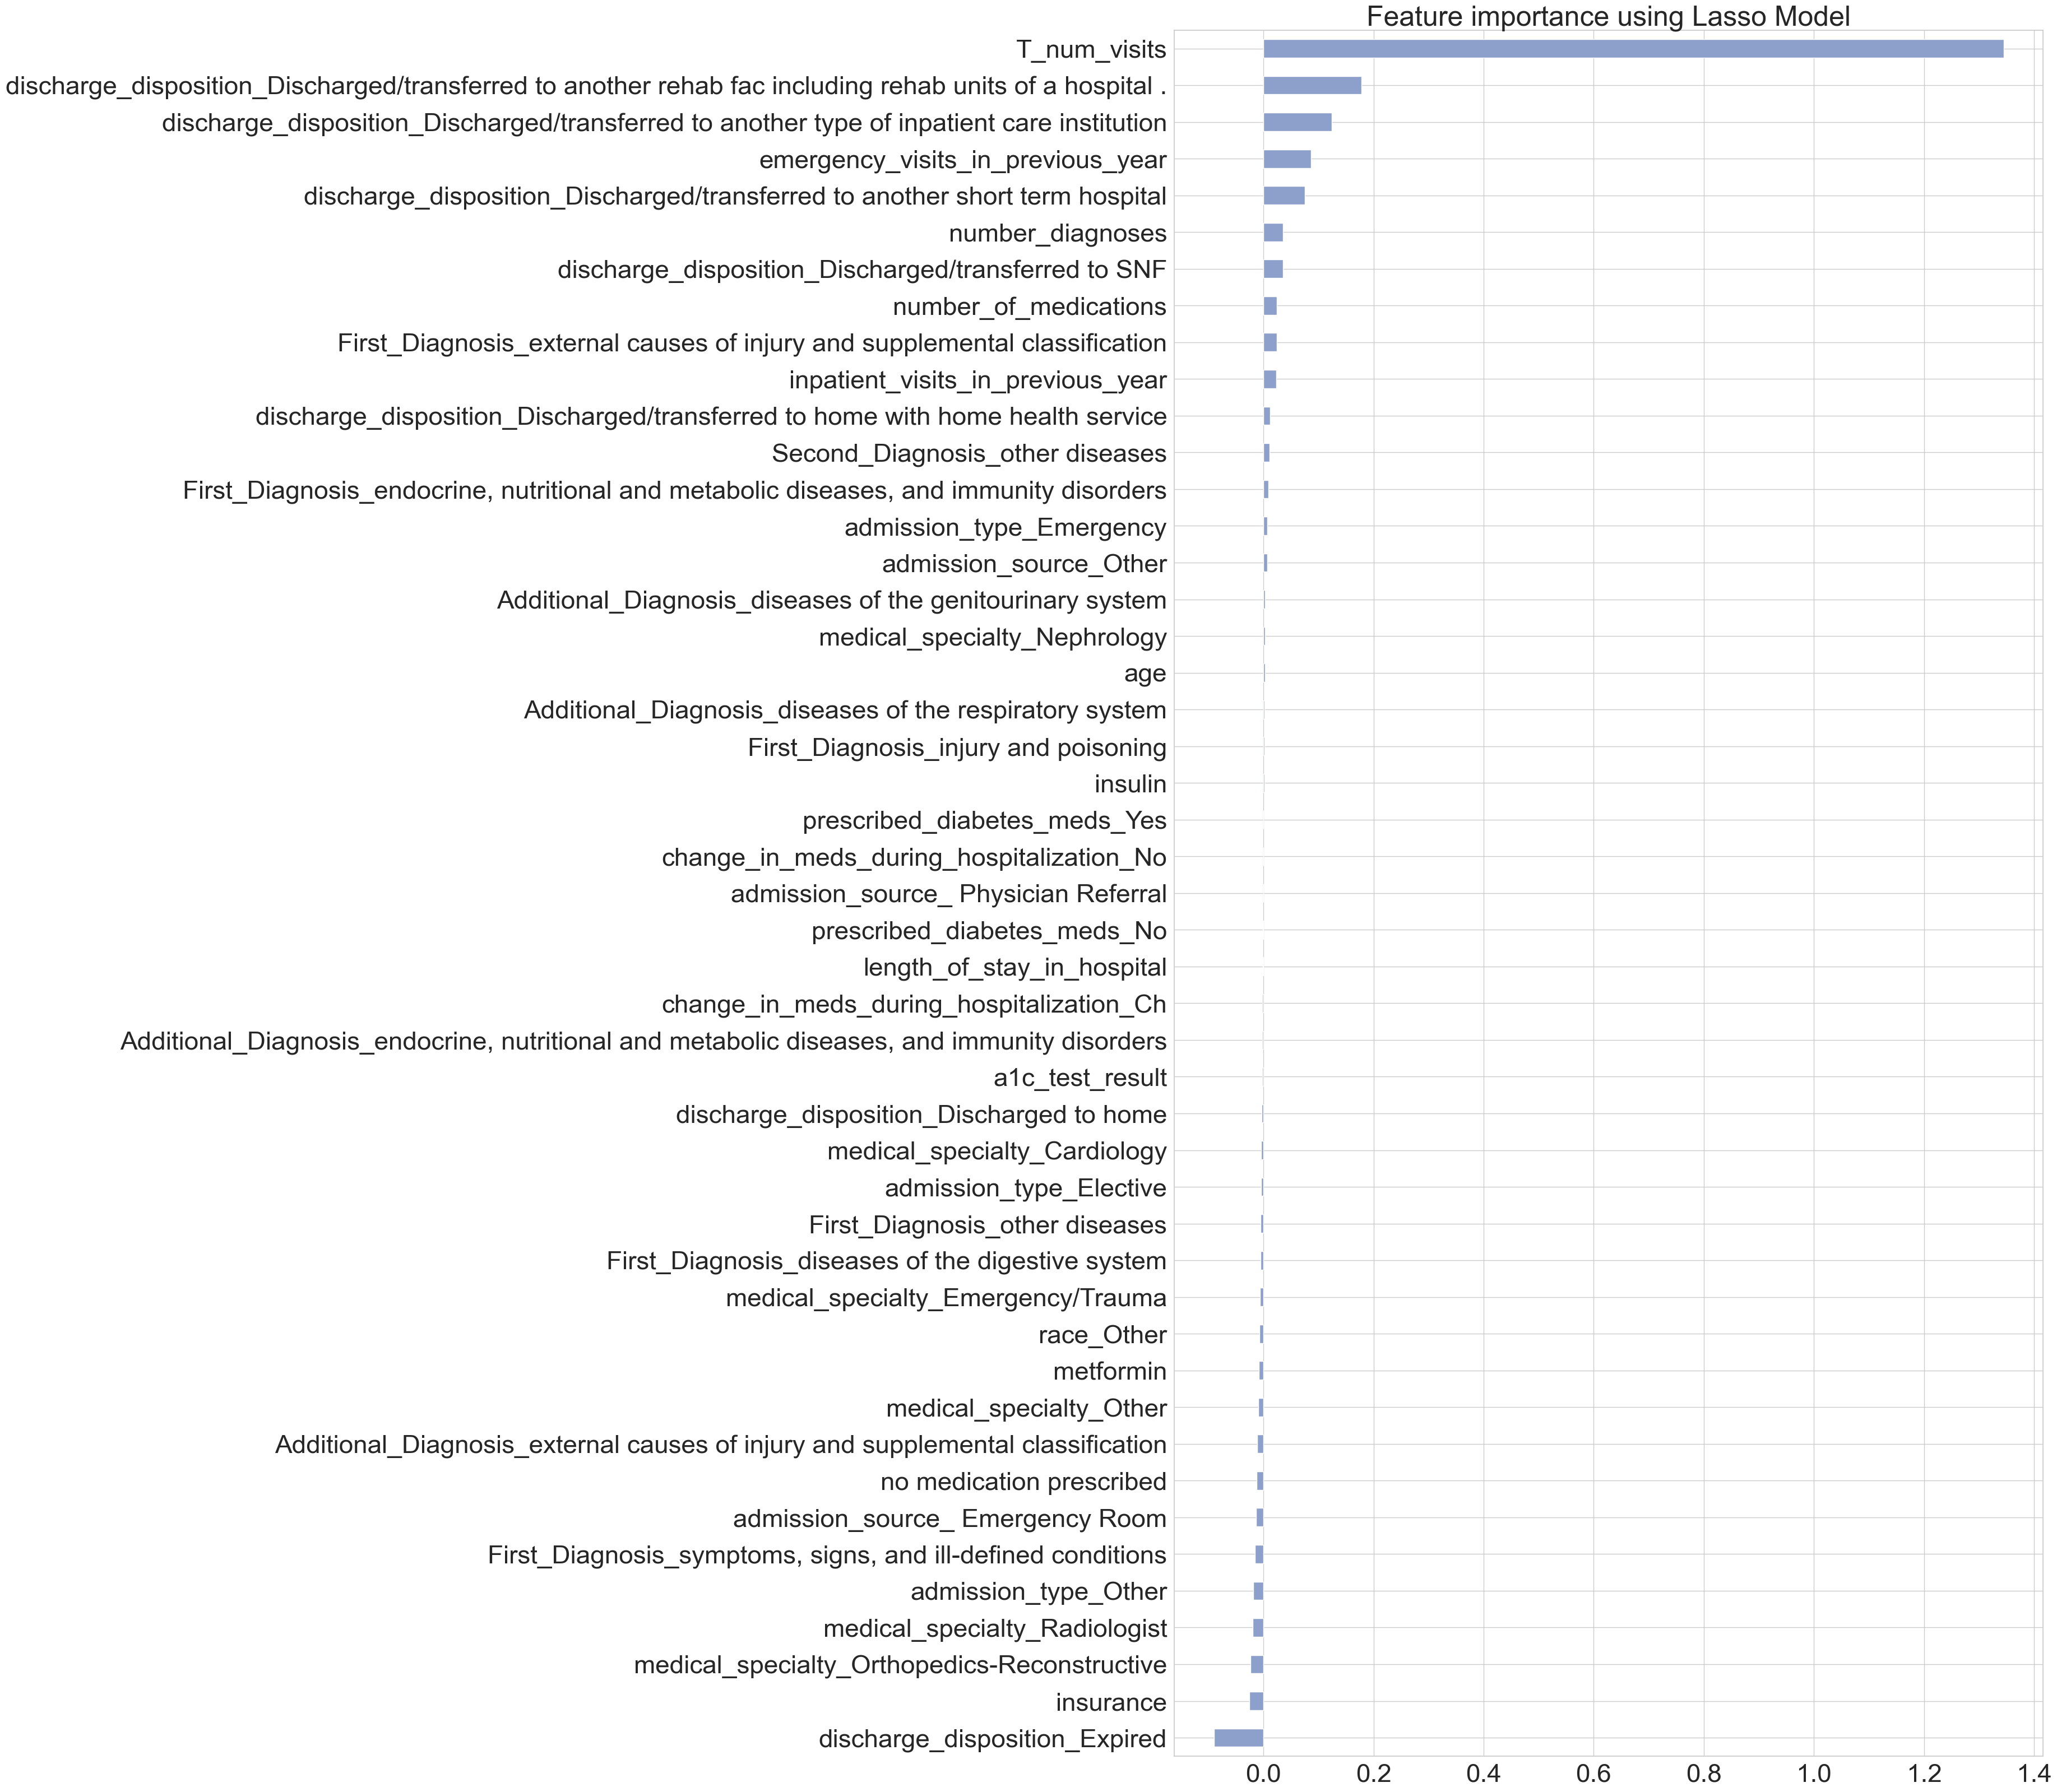

In [375]:
plot_importance(coef,'Lasso')

In [376]:
#let´s use the value of age as a reference to eliminate variables

In [377]:
print("Lasso picked " + str(sum(abs(coef) > abs(coef['age'])

)) + " variables and eliminated the other " +  str(sum(abs(coef )<abs(coef['age'])

)) + " variables")

Lasso picked 35 variables and eliminated the other 11 variables


In [378]:
threshold = abs(coef['age']) # Adjust the threshold as needed
lasso_bool = []

for coef_value in coef.values:
    if abs(coef_value) >= threshold:
        lasso_bool.append(True)
    else:
        lasso_bool.append(False)

# Create dictionary with features as keys and True/False as values
feature_dict_lasso = dict(zip(X_bin_train.columns, lasso_bool))

# Display the dictionary
print(feature_dict_lasso)


{'age': True, 'emergency_visits_in_previous_year': True, 'inpatient_visits_in_previous_year': True, 'length_of_stay_in_hospital': False, 'number_of_medications': True, 'number_diagnoses': True, 'a1c_test_result': False, 'insurance': True, 'T_num_visits': True, 'no medication prescribed': True, 'metformin': True, 'insulin': False, 'prescribed_diabetes_meds_No': False, 'prescribed_diabetes_meds_Yes': False, 'change_in_meds_during_hospitalization_Ch': False, 'change_in_meds_during_hospitalization_No': False, 'admission_source_ Emergency Room': True, 'admission_source_ Physician Referral': False, 'admission_source_Other': True, 'discharge_disposition_Discharged to home': True, 'discharge_disposition_Discharged/transferred to SNF': True, 'discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital .': True, 'discharge_disposition_Discharged/transferred to another short term hospital': True, 'discharge_disposition_Discharged/transferred to another ty

#### 2.8.4 Feature Selection Results <a class="anchor" id="bin-results"></a>

In [379]:
mi_bool_df = pd.DataFrame(list(feature_dict.items()), columns=['Feature', 'Mutual Information'])
mi_bool_df = mi_bool_df.set_index('Feature')

lasso_bool_df=pd.DataFrame(list(feature_dict.items()), columns=['Feature', 'Feature Importance using Lasso Model'])
lasso_bool_df = lasso_bool_df.set_index('Feature')

In [380]:
feature_selection_df = pd.DataFrame({'Feature':X_bin_train.columns,
                                     'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support })  
feature_selection_df = feature_selection_df.merge(mi_bool_df, on='Feature')
feature_selection_df = feature_selection_df.merge(lasso_bool_df, on='Feature')

# Select boolean columns for summation (excluding 'Feature')
bool_columns = feature_selection_df.columns[1:]
feature_selection_df['Total'] = feature_selection_df[bool_columns].sum(axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(X_bin_train))

Feature  \
1                                                                                          number_diagnoses   
2                                                                         emergency_visits_in_previous_year   
3                                                                                              T_num_visits   
4                                                                                     number_of_medications   
5                                                                                length_of_stay_in_hospital   
6                                                                                                 insurance   
7                                                                         inpatient_visits_in_previous_year   
8                                                                             discharge_disposition_Expired   
9                discharge_disposition_Discharged/transferred to another type of inpatient care institution   
10                              discharge_disposition_Discharged/transferred to another short term hospital   
11  discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital .   
12                                                                                                      age   
13               Additional_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders   
14                                                                             prescribed_diabetes_meds_Yes   
15                                                                              prescribed_diabetes_meds_No   
16                                                                                 no medication prescribed   
17                                                                                  medical_specialty_Other   
18                                                                             medical_specialty_Nephrology   
19                                                                       medical_specialty_Emergency/Trauma   
20                                                                             medical_specialty_Cardiology   
21                                                                                                  insulin   
22                            discharge_disposition_Discharged/transferred to home with home health service   
23                                                      discharge_disposition_Discharged/transferred to SNF   
24                                                                 discharge_disposition_Discharged to home   
25                                                                 change_in_meds_during_hospitalization_No   
26                                                                 change_in_meds_during_hospitalization_Ch   
27                                                                                 admission_type_Emergency   
28                                                                                  admission_type_Elective   
29                                                                                   admission_source_Other   
30                                                                     admission_source_ Physician Referral   
31                                                                         admission_source_ Emergency Room   
32                                First_Diagnosis_external causes of injury and supplemental classification   
33                    First_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders   
34                                                                                          a1c_test_result   
35                                                                                               race_Other   
36                                                                                                metfor

**Conclusion:**
We decided to drop the features that  had a Total =0

In [381]:
features_with_zero_total = feature_selection_df[feature_selection_df['Total'] == 0]['Feature'].tolist()
columns_to_drop = features_with_zero_total


for i in columns_to_drop:
    if i  in categorical:
        categorical.remove(i)
    else:
       numerical.remove(i)


X_bin_train = X_bin_train.drop(columns=columns_to_drop)
X_bin_val= X_bin_val.drop(columns=columns_to_drop)

In [382]:
# NO NOSSO MELHOR MODELO REMOVER = as aceites por 0,1,2 modelos dá piores resultados

# Get features with Total equal to 0, 1, or 2
#features_with_low_total = feature_selection_df[feature_selection_df['Total'].isin([0, 1, 2])]['Feature'].tolist()

# Drop columns with Total equal to 0, 1, or 2 from categorical and numerical lists
"""for column in features_with_low_total:
    if column in categorical:
        categorical.remove(column)
    elif column in numerical:
        numerical.remove(column)

# Drop columns with Total equal to 0, 1, or 2 from X_bin_train and X_bin_val
X_bin_train = X_bin_train.drop(columns=features_with_low_total, errors='ignore')
X_bin_val = X_bin_val.drop(columns=features_with_low_total, errors='ignore')"""

"for column in features_with_low_total:\n    if column in categorical:\n        categorical.remove(column)\n    elif column in numerical:\n        numerical.remove(column)\n\n# Drop columns with Total equal to 0, 1, or 2 from X_bin_train and X_bin_val\nX_bin_train = X_bin_train.drop(columns=features_with_low_total, errors='ignore')\nX_bin_val = X_bin_val.drop(columns=features_with_low_total, errors='ignore')"

### 2.9 Feature Selection Multiclass Target  <a class="anchor" id="featureselection-multiclass"></a>

In [383]:
#categorical_mult
numerical_mult=numerical_until_scalling.copy()

#### 2.9.1 Numerical Variables<a class="anchor" id="mult-numerical"></a>

##### **1) Univariate**

In [384]:
X_mult_train[numerical_mult].var() 

outpatient_visits_in_previous_year    0.001776
emergency_visits_in_previous_year     0.000771
inpatient_visits_in_previous_year     0.038114
average_pulse_bpm                     0.085089
length_of_stay_in_hospital            0.053183
number_lab_tests                      0.032978
non_lab_procedures                    0.081299
number_of_medications                 0.014186
number_diagnoses                      0.016667
T_num_visits                          0.002309
dtype: float64

**Conclusion:** None of the numerical variables has variance == 0, so we don´t have constants. The values obtained are not really different from the ones that we obtain in this section but for the binary target, as expected because we are only looking at the variances of the features and not evaluating its relation with the target.

##### **2) Correlation Indices: Sperman**

In [385]:
def cor_heatmap(cor):
    plt.figure(figsize=(25, 25))
    heatmap = sns.heatmap(data=cor, annot=True, cmap='Blues', fmt='.1f')
    heatmap.set_title("Spearman’s Correlation Matrix")
    plt.show()

In [386]:
cor_spearman = X_mult_train[numerical_mult].corr(method ='spearman')
cor_spearman

outpatient_visits_in_previous_year  \
outpatient_visits_in_previous_year                            1.000000   
emergency_visits_in_previous_year                             0.173125   
inpatient_visits_in_previous_year                             0.146351   
average_pulse_bpm                                             0.003079   
length_of_stay_in_hospital                                   -0.011674   
number_lab_tests                                             -0.022689   
non_lab_procedures                                           -0.028779   
number_of_medications                                         0.069108   
number_diagnoses                                              0.109718   
T_num_visits                                                  0.127113   

                                    emergency_visits_in_previous_year  \
outpatient_visits_in_previous_year                           0.173125   
emergency_visits_in_previous_year                            1.000000   
inpatient_visits_in_previous_year                            0.197618   
average_pulse_bpm                                            0.000172   
length_of_stay_in_hospital                                  -0.005402   
number_lab_tests                                             0.001138   
non_lab_procedures                                          -0.045500   
number_of_medications                                        0.038570   
number_diagnoses                                             0.086227   
T_num_visits                                                 0.175051   

                                    inpatient_visits_in_previous_year  \
outpatient_visits_in_previous_year                           0.146351   
emergency_visits_in_previous_year                            0.197618   
inpatient_visits_in_previous_year                            1.000000   
average_pulse_bpm                                            0.004685   
length_of_stay_in_hospital                                   0.088368   
number_lab_tests                                             0.038508   
non_lab_procedures                                          -0.068164   
number_of_medications                                        0.094294   
number_diagnoses                                             0.136001   
T_num_visits                                                 0.515799   

                                    average_pulse_bpm  \
outpatient_visits_in_previous_year           0.003079   
emergency_visits_in_previous_year            0.000172   
inpatient_visits_in_previous_year            0.004685   
average_pulse_bpm                            1.000000   
length_of_stay_in_hospital                   0.003025   
number_lab_tests                            -0.000605   
non_lab_procedures                          -0.005906   
number_of_medications                        0.004163   
number_diagnoses                            -0.002005   
T_num_visits                                 0.001512   

                                    length_of_stay_in_hospital  \
outpatient_visits_in_previous_year                   -0.011674   
emergency_visits_in_previous_year                    -0.005402   
inpatient_visits_in_previous_year                     0.088368   
average_pulse_bpm                                     0.003025   
length_of_stay_in_hospital                            1.000000   
number_lab_tests                                      0.333965   
non_lab_procedures                                    0.189910   
number_of_medications                                 0.462541   
number_diagnoses                                      0.241575   
T_num_visits                                          0.064225   

                                    number_lab_tests  non_lab_procedures  \
outpatient_visits_in_previous_year         -0.022689           -0.028779   
emergency_visits_in_previous_year           0.001138           -0.045500   
inpatient_visits_in_previous_y

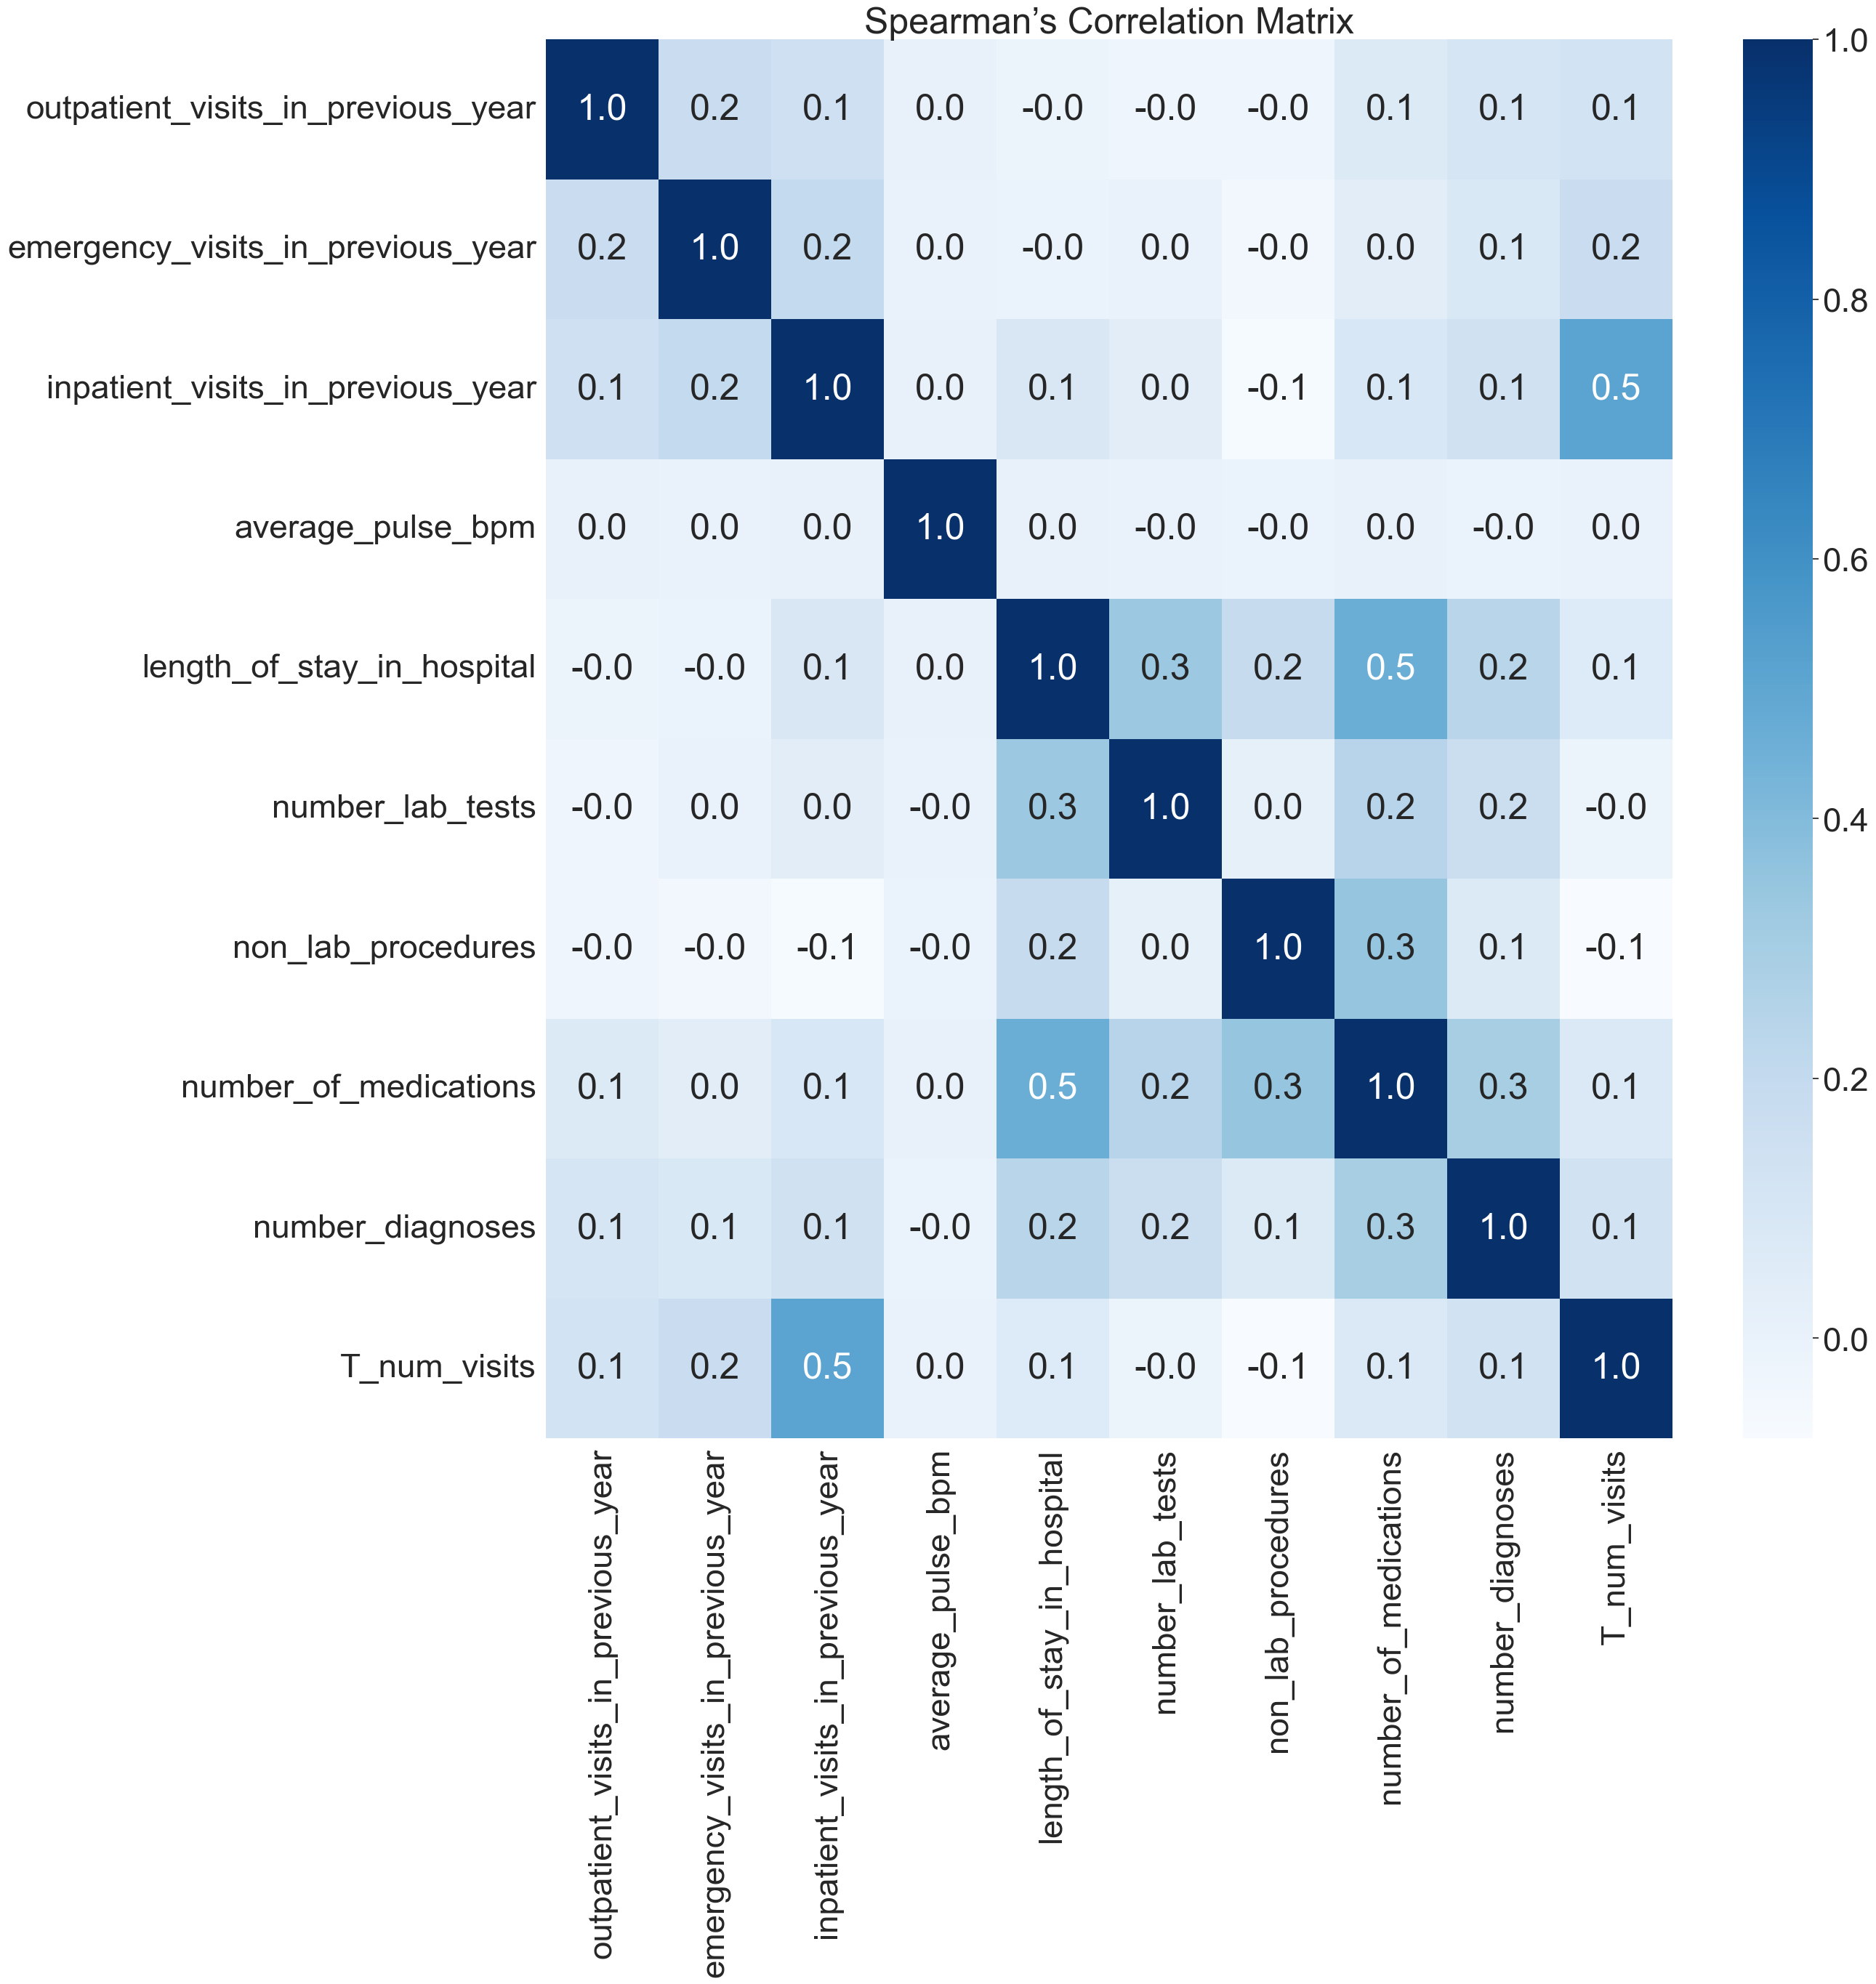

In [388]:
cor_heatmap(cor_spearman)

**Conclusion**
* We need to use other techniques of feature selection to decide which variables should we keep because there´s no high correlation between any numerical variables. We could just highlight correlations of 0.5 between:
  + length_of_stay_in_hospital and number_of_medications
  + T_num_visits and  inpatient_visits_in_previous_year
* As we expected, the values obtained are not really different from the ones that we obtain in this section but for the binary target.

#####  **3) ANOVA**

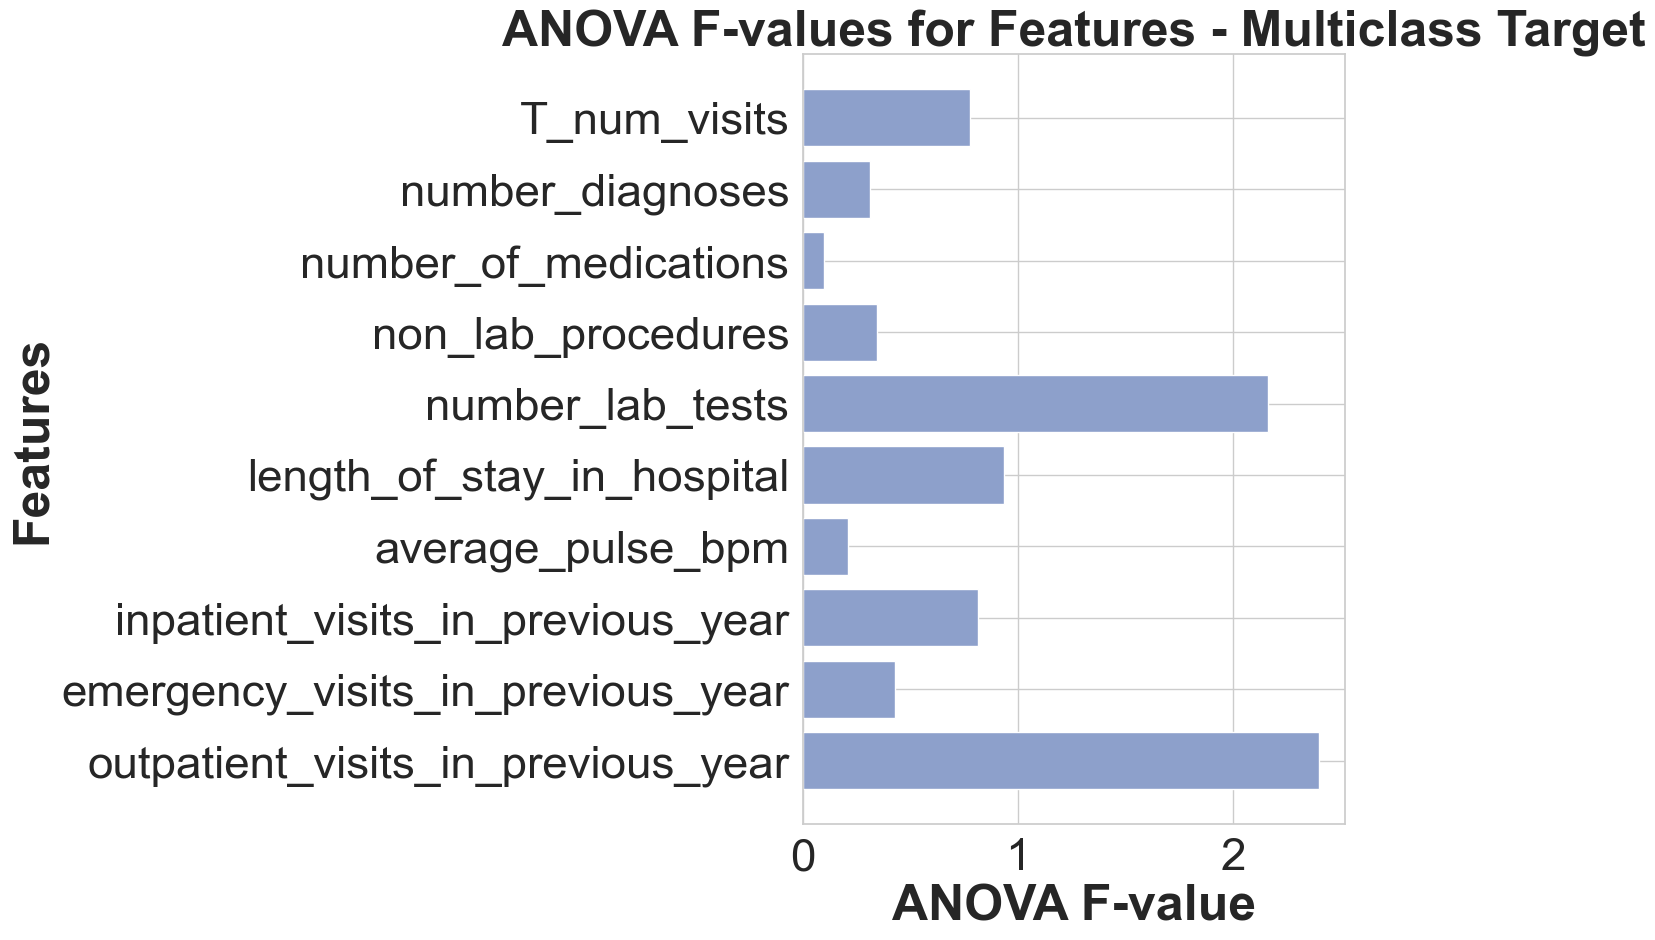

In [389]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_mult_train[numerical_mult], y_mult_train)

plt.figure(figsize=(7, 10))  # Adjust the figure size as needed
sns.set_palette("Set2")  # Set Seaborn color palette
plt.yticks(range(len(numerical_mult)), numerical_mult)
plt.barh([i for i in range(len(fs.scores_))], fs.scores_, color=sns.color_palette("Set2")[2])
plt.xlabel('ANOVA F-value' , fontweight='bold')  
plt.ylabel('Features', fontweight='bold')
plt.title('ANOVA F-values for Features - Multiclass Target', fontweight='bold')  # Bold title
plt.show()

In [390]:
numerical_mult

['outpatient_visits_in_previous_year',
 'emergency_visits_in_previous_year',
 'inpatient_visits_in_previous_year',
 'average_pulse_bpm',
 'length_of_stay_in_hospital',
 'number_lab_tests',
 'non_lab_procedures',
 'number_of_medications',
 'number_diagnoses',
 'T_num_visits']

**Conclusion** According to this analysis we will drop:
* number_of_medications




In [391]:
columns_to_drop = [
    'number_of_medications'
]

for i in columns_to_drop:
    if i  in numerical_mult:
        numerical_mult.remove(i)
   
X_mult_train = X_mult_train.drop(columns=columns_to_drop)
X_mult_val= X_mult_val.drop(columns=columns_to_drop)

#### 2.9.2 Categorical Variables<a class="anchor" id="mult-categorical"></a>

##### **Chi-Square**

In [392]:
# Setting a seed for reproducibility
np.random.seed(42)

def TestIndependence(X, y, var, alpha=0.1):
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    return {'Variable': var, 'p_value': p}

p_values = [{'Variable': column, 'p_value': TestIndependence(X_mult_train[column], y_mult_train, column)['p_value']} for column in categorical_mult]

p_values_df = pd.DataFrame(p_values).sort_values(by='p_value', ascending=False)

display(p_values_df)

Variable  \
30                                                                         admission_source_ Emergency Room   
10                                                                                                glyburide   
67                                                                                             pioglitazone   
17                                                Additional_Diagnosis_diseases of the genitourinary system   
45                                                                       discharge_disposition_Other reason   
23                                                                     First_Diagnosis_injury and poisoning   
31                                                                       medical_specialty_InternalMedicine   
15                           Additional_Diagnosis_external causes of injury and supplemental classification   
42                                                                admission_source_Transfer from a hospital   
62                               Second_Diagnosis_external causes of injury and supplemental classification   
4                                                                                   admission_type_Elective   
46                                                                            discharge_disposition_Expired   
76                                                                                                  insulin   
35                                                                                  medical_specialty_Other   
27                                                                                               race_Other   
3                                                   Additional_Diagnosis_diseases of the respiratory system   
7                                                                                                race_Asian   
21                                                                                 admission_type_Emergency   
52                                                                                                insurance   
43               discharge_disposition_Discharged/transferred to another type of inpatient care institution   
65                                                                             medical_specialty_Cardiology   
51                                                                 discharge_disposition_Discharged to home   
68                                                                                 no medication prescribed   
26                                                                              prescribed_diabetes_meds_No   
54                                                                             prescribed_diabetes_meds_Yes   
18                                                                        medical_specialty_Surgery-General   
28                                                                                          a1c_test_result   
77                                                                            medical_specialty_Orthopedics   
6                                          Additional_Diagnosis_symptoms, signs, and ill-defined conditions   
64                    First_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders   
1                                                                                     admission_type_Urgent   
74                                                                 medical_specialty_Family/GeneralPractice   
61                                              First_Diagnosis_symptoms, signs, and ill-defined conditions   
11                                             admission_source_ Transfer from another health care facility   
25                                                                     admission_source_ Physician Referral   
20                                                                                           race_Cauca

In [393]:
# Filter for variables with p-value less than 0.1
non_significant_variables = p_values_df[p_values_df['p_value'] >= 0.1]

display(non_significant_variables)

Variable  \
30                                                            admission_source_ Emergency Room   
10                                                                                   glyburide   
67                                                                                pioglitazone   
17                                   Additional_Diagnosis_diseases of the genitourinary system   
45                                                          discharge_disposition_Other reason   
23                                                        First_Diagnosis_injury and poisoning   
31                                                          medical_specialty_InternalMedicine   
15              Additional_Diagnosis_external causes of injury and supplemental classification   
42                                                   admission_source_Transfer from a hospital   
62                  Second_Diagnosis_external causes of injury and supplemental classification   
4                                                                      admission_type_Elective   
46                                                               discharge_disposition_Expired   
76                                                                                     insulin   
35                                                                     medical_specialty_Other   
27                                                                                  race_Other   
3                                      Additional_Diagnosis_diseases of the respiratory system   
7                                                                                   race_Asian   
21                                                                    admission_type_Emergency   
52                                                                                   insurance   
43  discharge_disposition_Discharged/transferred to another type of inpatient care institution   
65                                                                medical_specialty_Cardiology   
51                                                    discharge_disposition_Discharged to home   
68                                                                    no medication prescribed   
26                                                                 prescribed_diabetes_meds_No   
54                                                                prescribed_diabetes_meds_Yes   
18                                                           medical_specialty_Surgery-General   
28                                                                             a1c_test_result   
77                                                               medical_specialty_Orthopedics   
6                             Additional_Diagnosis_symptoms, signs, and ill-defined conditions   
64       First_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders   
1                                                                        admission_type_Urgent   
74                                                    medical_specialty_Family/GeneralPractice   
61                                 First_Diagnosis_symptoms, signs, and ill-defined conditions   
11                                admission_source_ Transfer from another health care facility   
25                                                        admission_source_ Physician Referral   
20                                                                              race_Caucasian   
36                                                                               rosiglitazone   
70                                                medical_specialty_Orthopedics-Reconstructive   
50                                                             Second_Diagnosis_other diseases   
55                                       Second_Diagnosis_diseases of the genitourinary system   
34                                                          medical_

In [394]:
columns_to_drop  = [
    'admission_source_ Emergency Room', 'glyburide', 'pioglitazone',
    'Additional_Diagnosis_diseases of the genitourinary system',
    'discharge_disposition_Other reason', 'First_Diagnosis_injury and poisoning',
    'medical_specialty_InternalMedicine',
    'Additional_Diagnosis_external causes of injury and supplemental classification',
    'admission_source_Transfer from a hospital',
    'Second_Diagnosis_external causes of injury and supplemental classification',
    'admission_type_Elective', 'discharge_disposition_Expired', 'insulin',
    'medical_specialty_Other', 'race_Other', 'Additional_Diagnosis_diseases of the respiratory system',
    'race_Asian', 'admission_type_Emergency', 'insurance',
    'discharge_disposition_Discharged/transferred to another type of inpatient care institution',
    'medical_specialty_Cardiology', 'discharge_disposition_Discharged to home',
    'no medication prescribed', 'prescribed_diabetes_meds_No', 'prescribed_diabetes_meds_Yes',
    'medical_specialty_Surgery-General', 'a1c_test_result', 'medical_specialty_Orthopedics',
    'Additional_Diagnosis_symptoms, signs, and ill-defined conditions',
    'First_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders',
    'admission_type_Urgent', 'medical_specialty_Family/GeneralPractice',
    'First_Diagnosis_symptoms, signs, and ill-defined conditions',
    'admission_source_ Transfer from another health care facility',
    'admission_source_ Physician Referral', 'race_Caucasian', 'rosiglitazone',
    'medical_specialty_Orthopedics-Reconstructive', 'Second_Diagnosis_other diseases',
    'Second_Diagnosis_diseases of the genitourinary system', 'medical_specialty_Emergency/Trauma',
    'Additional_Diagnosis_diseases of the circulatory system',
    'discharge_disposition_Discharged/transferred to SNF',
    'Second_Diagnosis_diseases of the circulatory system', 'change_in_meds_during_hospitalization_No',
    'change_in_meds_during_hospitalization_Ch',
    'Additional_Diagnosis_diseases of the digestive system', 'medical_specialty_Nephrology',
    'age', 'Additional_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders',
    'admission_source_Clinic Referral', 'glipizide',
    'First_Diagnosis_diseases of the genitourinary system',
    'Additional_Diagnosis_other diseases',
    'Second_Diagnosis_diseases of the digestive system', 'Additional_Diagnosis_injury and poisoning',
    'First_Diagnosis_diseases of the circulatory system', 'medical_specialty_Radiologist',
    'Second_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders',
    'medical_specialty_Psychiatry',
    'Second_Diagnosis_symptoms, signs, and ill-defined conditions',
    'discharge_disposition_Discharged/transferred to another short term hospital',
    'admission_source_Other', 'Second_Diagnosis_injury and poisoning',
    'discharge_disposition_Discharged/transferred to home with home health service',
    'First_Diagnosis_diseases of the respiratory system', 'race_AfricanAmerican',
    'glucose_test_result', 'glimepiride',
    'First_Diagnosis_diseases of the digestive system'
]



   
for i in columns_to_drop:
    if i  in categorical_mult:
        categorical_mult.remove(i)
   
X_mult_train = X_mult_train.drop(columns=columns_to_drop)
X_mult_val= X_mult_val.drop(columns=columns_to_drop)

#### 2.9.3 Both <a class="anchor" id="mult-both"></a>

#####  **1) Mutual Information**

In [395]:
# Set a random seed for reproducibility
random_seed = 42

# Assuming X_bin_train and y_bin_train are your training data

# Compute mutual information scores for each feature in X_bin_train with y_bin_train
mutual_info_scores = mutual_info_classif(X_mult_train, y_mult_train, random_state=random_seed)

# Create a DataFrame to store feature names and their corresponding mutual information scores
feature_scores = pd.DataFrame({'Feature': X_mult_train.columns, 'Mutual_Info_Score': mutual_info_scores})

# Sort the features based on their mutual information scores and display in a DataFrame
feature_scores = feature_scores.sort_values(by='Mutual_Info_Score', ascending=False)
display(feature_scores)

Feature  \
5                                                                                          number_lab_tests   
6                                                                                        non_lab_procedures   
11                                                                                     admission_type_Other   
12                                                                                            gender_Female   
7                                                                                          number_diagnoses   
13                                                                                              gender_Male   
17                                                      Second_Diagnosis_diseases of the respiratory system   
9                                                                                                 metformin   
8                                                                                              T_num_visits   
4                                                                                length_of_stay_in_hospital   
15                                First_Diagnosis_external causes of injury and supplemental classification   
1                                                                         emergency_visits_in_previous_year   
10  discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital .   
3                                                                                         average_pulse_bpm   
2                                                                         inpatient_visits_in_previous_year   
14                                                                                            race_Hispanic   
16                                                                           First_Diagnosis_other diseases   
0                                                                        outpatient_visits_in_previous_year   

    Mutual_Info_Score  
5            0.005506  
6            0.004501  
11           0.003891  
12           0.003771  
7            0.003729  
13           0.003040  
17           0.002606  
9            0.002240  
8            0.001227  
4            0.000445  
15           0.000089  
1            0.000000  
10           0.000000  
3            0.000000  
2            0.000000  
14           0.000000  
16           0.000000  
0            0.000000

In [396]:
mi_bool = feature_scores['Mutual_Info_Score'] > 0.000000

# Create dictionary with features as keys and True/False as values
feature_dict = dict(zip(feature_scores['Feature'], mi_bool))

# Display the dictionary
#print(feature_dict)

##### **2) Logistic Regression**

In [397]:
X_mult_train.shape

(49254, 18)

In [398]:
embeded_lr_selector = SelectFromModel(LogisticRegression(max_iter=10000,penalty="l2", random_state=42), max_features=18)
embeded_lr_selector.fit(X_mult_train, y_mult_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_mult_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

6 selected features
['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'T_num_visits', 'discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital .', 'admission_type_Other', 'race_Hispanic']


##### **3) Random Forest**

In [399]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=18)
embeded_rf_selector.fit(X_mult_train, y_mult_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_mult_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

6 selected features
['average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_diagnoses', 'T_num_visits']


##### **4) Lasso**

In [400]:
reg = LassoCV(random_state=42)

In [401]:
reg.fit(X_mult_train, y_mult_train)

LassoCV(random_state=42)

In [402]:
coef = pd.Series(reg.coef_, index = X_mult_train.columns)
coef

outpatient_visits_in_previous_year                                                                         2.939768e-02
emergency_visits_in_previous_year                                                                          0.000000e+00
inpatient_visits_in_previous_year                                                                          1.058915e-02
average_pulse_bpm                                                                                          2.947111e-04
length_of_stay_in_hospital                                                                                -8.971737e-03
number_lab_tests                                                                                           2.131616e-02
non_lab_procedures                                                                                        -3.123099e-03
number_diagnoses                                                                                          -0.000000e+00
T_num_visits                            

In [403]:
print("Lasso picked " + str(sum(coef !=0
)) + " variables and eliminated the other " +  str(sum(coef ==0
)) + " variables")

Lasso picked 14 variables and eliminated the other 4 variables


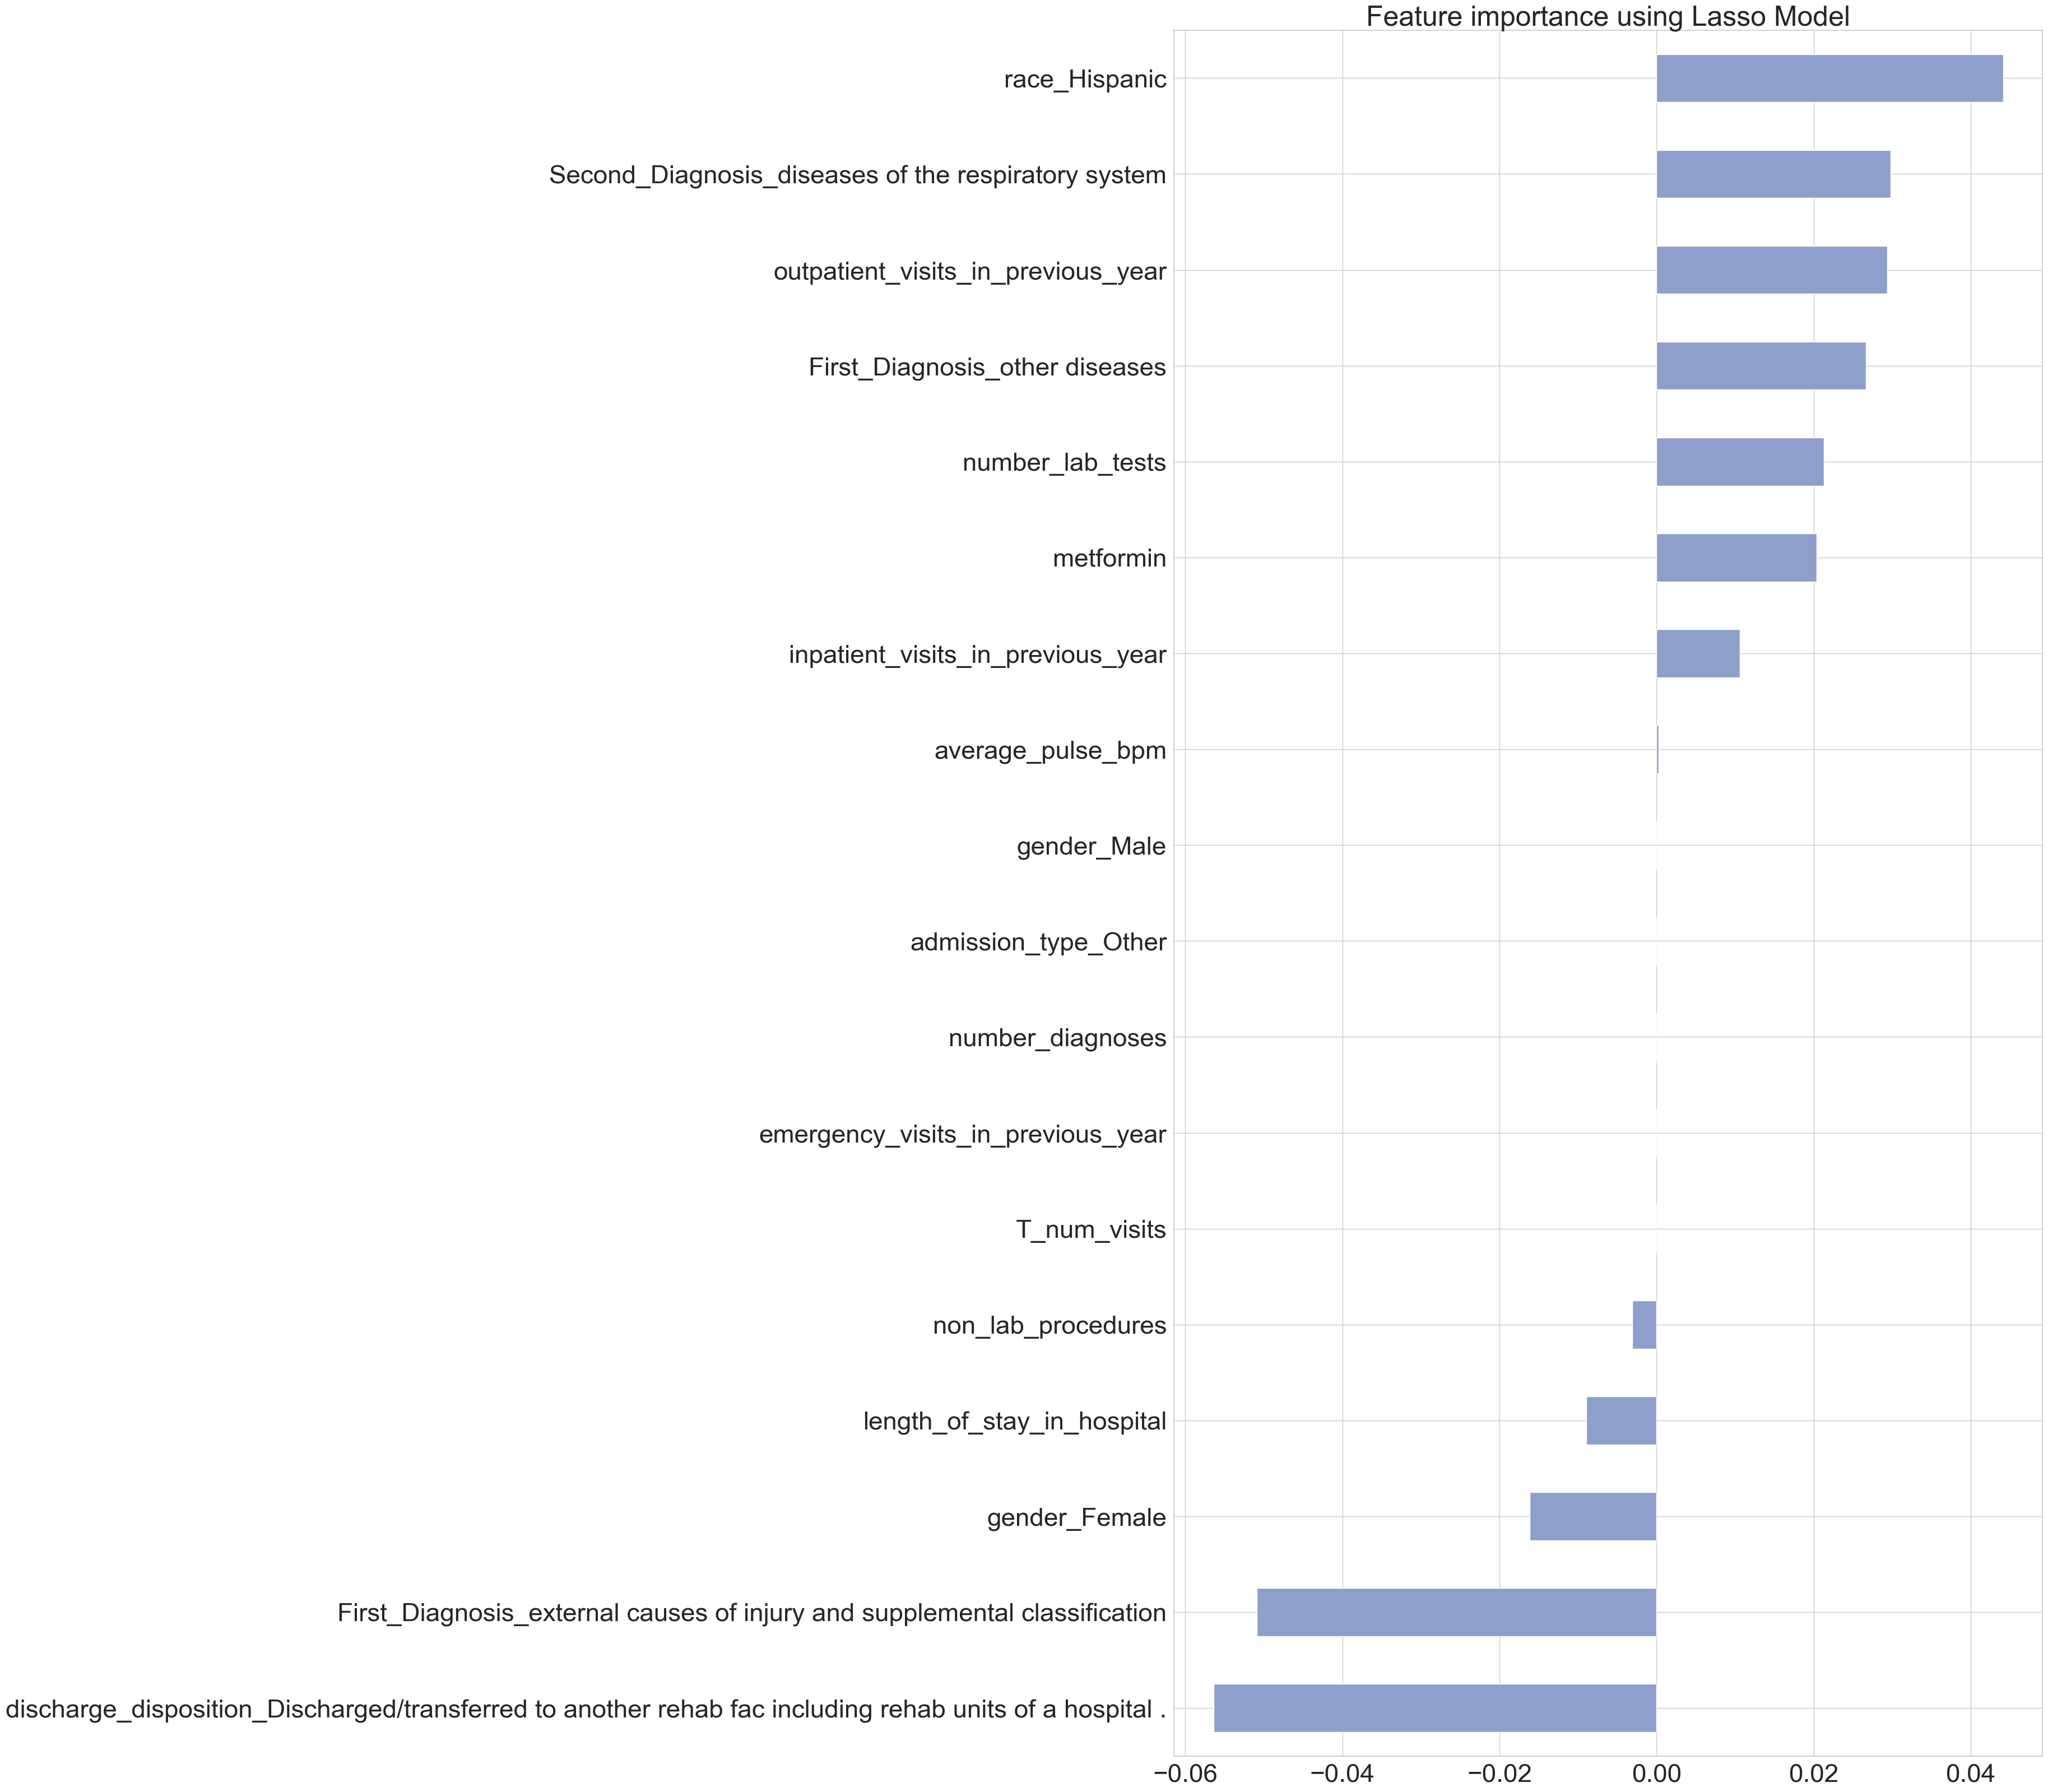

In [404]:
plot_importance(coef,'Lasso')

In [405]:
#let´s use the value of average_pulse_bpm as a reference to eliminate variables

In [406]:
coef['average_pulse_bpm']

0.00029471110092885877

In [407]:
print("Lasso picked " + str(sum(abs(coef) > abs(coef['average_pulse_bpm'])

)) + " variables and eliminated the other " +  str(sum(abs(coef )<abs(coef['average_pulse_bpm'])
)) + " variables")

Lasso picked 12 variables and eliminated the other 5 variables


In [408]:
threshold = abs(coef['average_pulse_bpm'])  # Adjust the threshold as needed
lasso_bool = []

for coef_value in coef.values:
    if abs(coef_value) >= threshold:
        lasso_bool.append(True)
    else:
        lasso_bool.append(False)

# Create dictionary with features as keys and True/False as values
feature_dict_lasso = dict(zip(X_bin_train.columns, lasso_bool))

# Display the dictionary
#print(feature_dict_lasso)


#### 2.9.4 Feature Selection Results <a class="anchor" id="mult-results"></a>

In [410]:
mi_bool_df = pd.DataFrame(list(feature_dict.items()), columns=['Feature', 'Mutual Information'])
mi_bool_df = mi_bool_df.set_index('Feature')

lasso_bool_df=pd.DataFrame(list(feature_dict.items()), columns=['Feature', 'Feature Importance using Lasso Model'])
lasso_bool_df = lasso_bool_df.set_index('Feature')

In [411]:
feature_selection_df = pd.DataFrame({'Feature':X_mult_train.columns,
                                     'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support })  
feature_selection_df = feature_selection_df.merge(mi_bool_df, on='Feature')
feature_selection_df = feature_selection_df.merge(lasso_bool_df, on='Feature')


# Select boolean columns for summation (excluding 'Feature')
bool_columns = feature_selection_df.columns[1:]
feature_selection_df['Total'] = feature_selection_df[bool_columns].sum(axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(X_mult_train))

Feature  \
1                                                                                              T_num_visits   
2                                                                                          number_lab_tests   
3                                                                                          number_diagnoses   
4                                                                                        non_lab_procedures   
5                                                                                length_of_stay_in_hospital   
6                                                                                      admission_type_Other   
7                                                                                                 metformin   
8                                                                                               gender_Male   
9                                                                                             gender_Female   
10                                                      Second_Diagnosis_diseases of the respiratory system   
11                                First_Diagnosis_external causes of injury and supplemental classification   
12                                                                                            race_Hispanic   
13                                                                       outpatient_visits_in_previous_year   
14                                                                        emergency_visits_in_previous_year   
15  discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital .   
16                                                                                        average_pulse_bpm   
17                                                                        inpatient_visits_in_previous_year   
18                                                                           First_Diagnosis_other diseases   

    Logistics  Random Forest  Mutual Information  \
1        True           True                True   
2       False           True                True   
3       False           True                True   
4       False           True                True   
5       False           True                True   
6        True          False                True   
7       False          False                True   
8       False          False                True   
9       False          False                True   
10      False          False                True   
11      False          False                True   
12       True          False               False   
13       True          False               False   
14       True          False               False   
15       True          False               False   
16      False           True               False   
17      False          False               False   
18      False          False               False   

    Feature Importance using Lasso Model  Total  
1                                   True      4  
2                                   True      3  
3                                   True      3  
4                                   True      3  
5                                   True      3  
6                                   True      3  
7                                   True      2  
8                                   True      2  
9                                   True      2  
10                                  True      2  
11                                  True      2  
12                                 False      1  
13                                 False      1  
14                                 False      1  
15                                 False      1  
16                                 False      1  
17                                 False      0  
18                                 False      0

**Conclusion:**
We decided to drop the features that  had a Total =0:



In [412]:
features_with_zero_total_mult = feature_selection_df[feature_selection_df['Total'] == 0]['Feature'].tolist()
columns_to_drop = features_with_zero_total_mult

for i in columns_to_drop:
    if i  in categorical_mult:
        categorical_mult.remove(i)
    else:
        numerical_mult.remove(i)


X_mult_train = X_mult_train.drop(columns=columns_to_drop)
X_mult_val= X_mult_val.drop(columns=columns_to_drop)

## 3. Modeling <a class="anchor" id="modeling"></a>

### 3.1 Set-up <a class="anchor" id="set-up"></a>

In [413]:
X_bin_train.shape

(49254, 34)

In [414]:
X_mult_train.shape

(49254, 16)

Functions that will be used to evaluate our models and extract assessment metrics:

In [415]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))

### 3.2 Modeling for Binary Target <a class="anchor" id="bin-model"></a>

#### 3.2.1 Simple Models (without SMOTE) <a class="anchor" id="bin-without"></a>

In [214]:
# Define the F1 scorer with pos_label=1
f1_scorer = make_scorer(f1_score, pos_label=1)

# Define models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced',max_iter=1000),
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Neural Network': MLPClassifier(solver='adam',max_iter=1000),
}

# F1_Scores
f1_scores = []
for model_name, model in models.items():
    print(f"Fitting {model_name}...")
    
    # Use the model directly on the validation set
    y_pred_val = model.fit(X_bin_train, y_bin_train).predict(X_bin_val)
    f1_val = f1_score(y_bin_val, y_pred_val, pos_label=1)
    
    f1_scores.append([f1_val])

# Create DataFrame with results
f1_res = pd.DataFrame({
    "F1_Scores": [result[0] for result in f1_scores],
    "Algorithm": list(models.keys())
})


Fitting Logistic Regression...


Fitting GaussianNB...
Fitting KNN...
Fitting Decision Tree...
Fitting SVM...


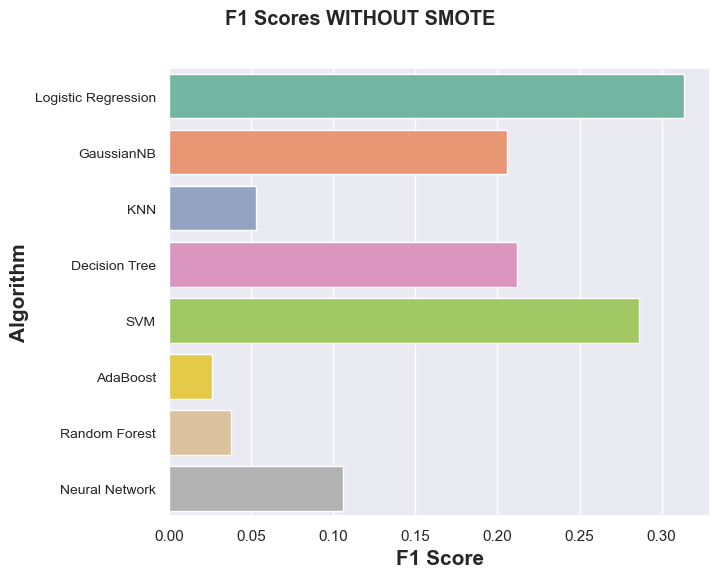

In [212]:
# Plot results
sns.set(font_scale=1)  # Adjusting font scale
plt.figure(figsize=(8, 6), dpi=100)  # Adjusting figure size
g = sns.barplot(x=f1_res["F1_Scores"], y=f1_res["Algorithm"], palette="Set2", orient="h")
plt.xlabel("F1 Score", fontsize=15, fontweight='bold')
plt.ylabel("Algorithm", fontsize=15, fontweight='bold')
plt.yticks(fontsize=10)
plt.tight_layout(pad=3)  # Adjusting padding
plt.suptitle("F1 Scores WITHOUT SMOTE", fontweight="bold", y=1.015)
plt.show()

#### 3.2.2  Models with SMOTE <a class="anchor" id="bin-with"></a>

In [ ]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn
# restart anaconda

In [226]:
oversample = SMOTE()
X_bin_train_smote, y_bin_train_smote = oversample.fit_resample(X_bin_train, y_bin_train)

In [225]:

# Define the F1 scorer with pos_label=1
f1_scorer = make_scorer(f1_score, pos_label=1)

# Define models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced',max_iter=1000),
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Neural Network': MLPClassifier(solver='adam',max_iter=1000),
}

# F1_Scores
f1_scores_smoted = []

for model_name, model in models.items():
    print(f"Fitting {model_name}...")
    
    # Use the model directly on the validation set
    y_pred_val = model.fit(X_bin_train_smote, y_bin_train_smote).predict(X_bin_val)
    f1_val = f1_score(y_bin_val, y_pred_val, pos_label=1)
    
    f1_scores_smoted.append([f1_val])

# Create DataFrame with results
f1_res_smoted = pd.DataFrame({
    "F1_Scores": [result[0] for result in f1_scores_smoted],
    "Algorithm": list(models.keys())
})


Fitting Logistic Regression...
Fitting GaussianNB...
Fitting KNN...
Fitting Decision Tree...
Fitting SVM...
Fitting AdaBoost...
Fitting Random Forest...
Fitting Neural Network...


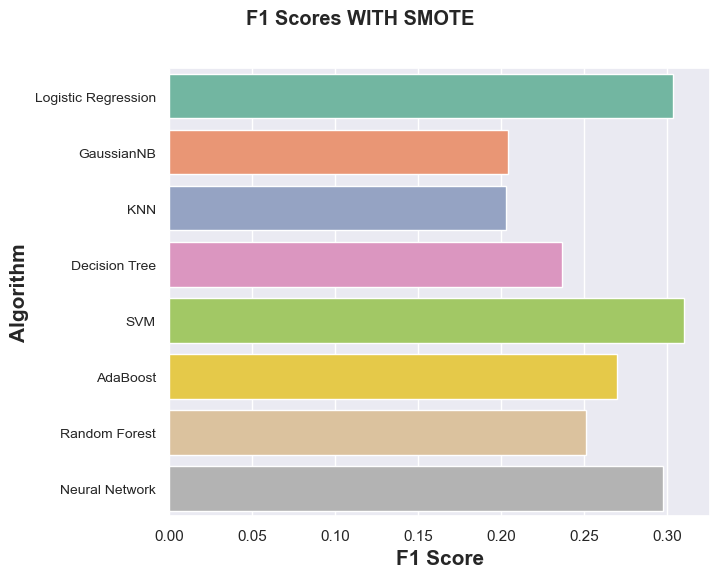

In [226]:
# Plot results
sns.set(font_scale=1)  # Adjusting font scale
plt.figure(figsize=(8, 6), dpi=100)  # Adjusting figure size
g = sns.barplot(x=f1_res_smoted["F1_Scores"], y=f1_res_smoted["Algorithm"], palette="Set2", orient="h")
plt.xlabel("F1 Score", fontsize=15, fontweight='bold')
plt.ylabel("Algorithm", fontsize=15, fontweight='bold')
plt.yticks(fontsize=10)
plt.tight_layout(pad=3)  # Adjusting padding
plt.suptitle("F1 Scores WITH SMOTE", fontweight="bold", y=1.015)
plt.show()

#### 3.2.3 Optimization: 3 best <a class="anchor" id="bin-optimization3best"></a>

By looking at the graphics, we chose 3 models that had a F1 Score around 0.30.
Now, we will search for their best parameters.

- Logisctic Regression without SMOTE
- Support Vector Machine with SMOTE
- Neural Network with SMOTE

#####  **1) Logistic Regression without SMOTE**

For a logistic regression model in scikit-learn, it's essential to have numerical data for features and categorical or numerical data for the target. That´s why we already encoded all the nominal and ordinal features and target.

In [213]:
final_f1_scores=[]

##### <font color='grey'>   GRID SEARCH: Logistic Regression</font>



In [216]:
# Define the Logistic Regression model
logistic_model = LogisticRegression()

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Define the hyperparameter grid
param_grid = {
    'penalty': [None,'l1', 'l2'],  # Regularization type
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'class_weight': ['balanced'],  # Weights associated with classes
    'solver': ['liblinear', 'lbfgs'],  # Algorithm to use in the optimization problem
    'random_state': [42]
}

# Create the custom F1 scorer
# def f1_positive(y_true, y_pred):
#    return f1_score(y_true, y_pred, pos_label=1)
# f1_scorer = make_scorer(f1_positive)

# Create a GridSearchCV object with the custom F1 scorer
best_LR_model = GridSearchCV(
    logistic_model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1
)

# Use the model directly on the validation set
y_pred_val = best_LR_model.fit(X_bin_train, y_bin_train).predict(X_bin_val)
f1_val_LR = f1_score(y_bin_val, y_pred_val, pos_label=1)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


c:\Users\maria\Documents\ANACONDA\envs\environment_ML\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\Documents\ANACONDA\envs\environment_ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\Documents\ANACONDA\envs\environment_ML\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maria\Document

In [218]:
final_f1_scores.append(f1_val_LR)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", best_LR_model.best_params_)
print("Best F1 Score: ", best_LR_model.best_score_)
print("F1 Score Validation: ", f1_val_LR)

Best Parameters:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Best F1 Score:  0.31410948338873845
F1 Score Validation:  0.3156539046950006


In [416]:
best_LR_model=LogisticRegression(C= 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear', random_state = 42)

In [418]:
labels_train = best_LR_model.predict(X_bin_train)
labels_val = best_LR_model.predict(X_bin_val)

In [419]:
metrics(y_train = y_bin_train, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     43912
           1       0.21      0.59      0.31      5342

    accuracy                           0.72     49254
   macro avg       0.58      0.66      0.57     49254
weighted avg       0.86      0.72      0.77     49254

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

In [494]:
# Define the Logistic Regression model
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

logistic_cm = LogisticRegression(C= 0.1, class_weight="balanced", penalty= 'l1', random_state= 42, solver= 'liblinear')
y_pred_val = logistic_cm.fit(X_bin_train, y_bin_train).predict(X_bin_val)
conf_matrix = confusion_matrix(y_bin_val, y_pred_val)
print(conf_matrix)

[[14276  4710]
 [  997  1388]]


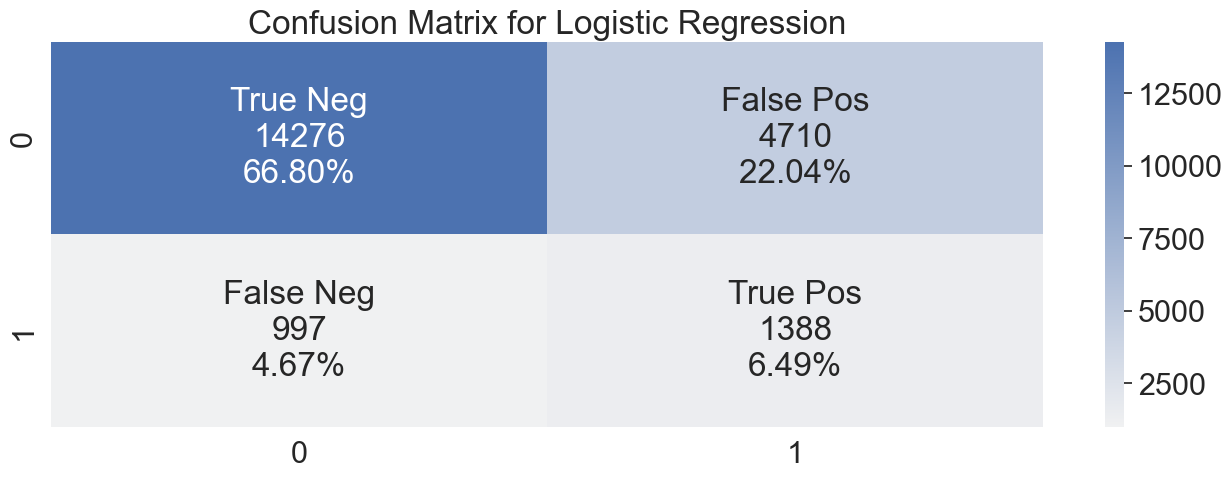

In [495]:
sns.set(font_scale=2)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']  # Adjusted group names

test_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, test_counts, test_percentage)]
test_labels = np.asarray(test_labels).reshape(2, 2)
plt.figure(figsize=(16, 5))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));


#####  **2) Support Vector Machine with SMOTE**
##### <font color='grey'>    GRID SEARCH: Support Vector Classification</font>


In [ ]:
# Define the SVM model
svm_model = SVC()

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [1,10,100],
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced'],
    'random_state': [42]
}

# Create the custom F1 scorer
# def f1_positive(y_true, y_pred):
#    return f1_score(y_true, y_pred, pos_label=1)
# f1_scorer = make_scorer(f1_positive)

# Create a GridSearchCV object for SVM
best_SVM_model = GridSearchCV(
    svm_model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1,verbose=3
)

# Use the model directly on the validation set
y_pred_val = best_SVM_model.fit(X_bin_train_smote, y_bin_train_smote).predict(X_bin_val)
f1_val_SVM = f1_score(y_bin_val, y_pred_val, pos_label=1)
final_f1_scores.append(f1_val_SVM)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", best_SVM_model.best_params_)
print("Best F1 Score: ", best_SVM_model.best_score_)
print("F1 Score Validation: ", f1_val_SVM)
#previous best Best Parameters:  {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 42}
#F1 Score Validation:  0.31455046331079384

**Note:** since we changed the place of this cell, and it takes too many time to run, we copy the output bellow:

In [1]:

"""   if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Best Parameters:  {'C': 100, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 42}
Best F1 Score:  0.7386299867723293
F1 Score Validation:  0.3011898859692613"""

"   if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):\nBest Parameters:  {'C': 100, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 42}\nBest F1 Score:  0.7386299867723293\nF1 Score Validation:  0.3011898859692613"

In [257]:
best_SVM_model=SVC(C= 100, class_weight= 'balanced', gamma= 'auto', kernel= 'rbf', random_state = 42)

In [260]:
best_SVM_model.fit(X_bin_train_smote, y_bin_train_smote)

SVC(C=100, class_weight='balanced', gamma='auto', random_state=42)

In [261]:
labels_train = best_SVM_model.predict(X_bin_train_smote)
labels_val = best_SVM_model.predict(X_bin_val)

In [262]:
metrics(y_train = y_bin_train_smote, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     44198
           1       0.76      0.75      0.76     44198

    accuracy                           0.76     88396
   macro avg       0.76      0.76      0.76     88396
weighted avg       0.76      0.76      0.76     88396

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

#####  **3)  Neural Network with SMOTE**

##### <font color='grey'>    RANDOM SEARCH: Neural Networks</font>


In [263]:
# Define the MLP model
mlp_model = MLPClassifier()

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

# Define the hyperparameter grid for MLP
param_grid = {
                'solver': ['adam'],
                'max_iter' : [1000,2000],
                'early_stopping' : [True],
                'activation': ['logistic', 'tanh', 'relu'],
                'hidden_layer_sizes': [(128,64,32),(64,32)],
                'random_state': [42]
}

# Create the custom F1 scorer
# def f1_positive(y_true, y_pred):
#    return f1_score(y_true, y_pred, pos_label=1)
# f1_scorer = make_scorer(f1_positive)

# Create a GridSearchCV object for MLP
best_MLP_model = GridSearchCV(
    mlp_model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1
)

# Use the model directly on the validation set
y_pred_val = best_MLP_model.fit(X_bin_train_smote, y_bin_train_smote).predict(X_bin_val)
f1_val_MLP = f1_score(y_bin_val, y_pred_val, pos_label=1)
final_f1_scores.append(f1_val_MLP)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", best_MLP_model.best_params_)
print("Best F1 Score: ", best_MLP_model.best_score_)
print("F1 Score Validation: ", f1_val_MLP)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Parameters:  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (128, 64, 32), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}
Best F1 Score:  0.824714926153255
F1 Score Validation:  0.2800252844500632


In [264]:
# Use the best model to make predictions
labels_train = best_MLP_model.predict(X_bin_train)
labels_val = best_MLP_model.predict(X_bin_val)

In [265]:
# Calculate and print metrics
metrics(y_train = y_bin_train, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.87      0.91     44198
           1       0.36      0.57      0.44      5511

    accuracy                           0.84     49709
   macro avg       0.65      0.72      0.67     49709
weighted avg       0.88      0.84      0.86     49709

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

#####  **4)  Results**

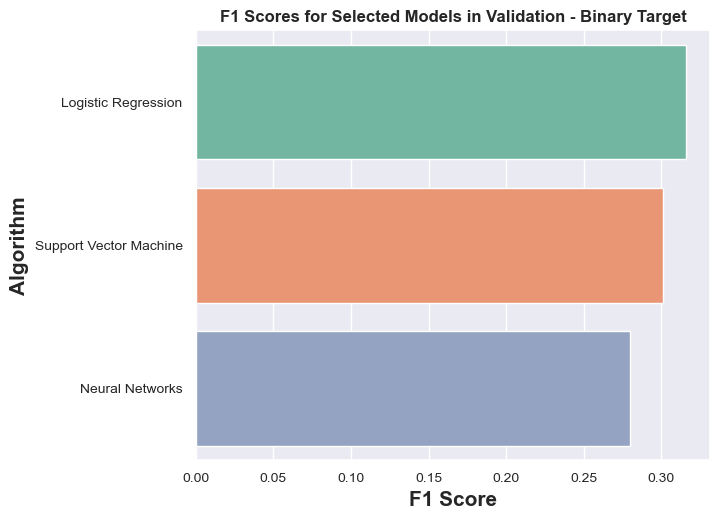

In [293]:
# F1 scores for the three models
final_f1_scores = [0.3156539046950006, 0.3011898859692613, 0.2800252844500632]
models = ['Logistic Regression', 'Support Vector Machine', 'Neural Networks']

# Create a DataFrame
df = pd.DataFrame({'Algorithm': models, 'F1 Score': final_f1_scores})

# Plot the F1 scores
sns.set(font_scale=1)
plt.figure(figsize=(8, 6), dpi=100)  # Adjust the figsize parameter for different dimensions
g = sns.barplot(x='F1 Score', y='Algorithm', data=df, palette='Set2', orient='h')
plt.xlabel("F1 Score", fontsize=15, fontweight='bold')
plt.ylabel("Algorithm", fontsize=15, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("F1 Scores for Selected Models in Validation - Binary Target", fontweight="bold")
plt.tight_layout(pad=3)
plt.show()

#### 3.2.4 Optimization: Other models <a class="anchor" id="bin-optimizationother"></a>


#####  **1)  KNN**

##### <font color='grey'>    RANDOM SEARCH: KNN</font>

In [244]:
# old_KNN_model = KNeighborsClassifier(n_neighbors=2, algorithm='auto', leaf_size=10, weights='distance' , metric='minkowski', p=2)
# 0.14  

In [221]:
# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Define the hyperparameter grid
param_dist = {
    'n_neighbors': [2,3,5,7],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan','minkowski'],  # Distance metric
    'leaf_size': [5 , 10, 20, 30],  # Size of leaf nodes in KD tree
    'algorithm': ['auto', 'ball_tree', 'brute'],
    'p': [1, 2, 3]
}

# Create a scorer for F1 weighted
#f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    knn_model, param_distributions=param_dist, n_iter=20, cv=cv, scoring='f1', random_state=42, n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_bin_train, y_bin_train)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)


Best Parameters:  {'weights': 'distance', 'p': 1, 'n_neighbors': 2, 'metric': 'minkowski', 'leaf_size': 5, 'algorithm': 'brute'}
Best F1 Score:  0.1562615025333503


C:\Users\TCastilho\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.10508628 0.04653629 0.04651971 0.10330908
 0.07067839 0.08417349 0.15274631 0.1562615  0.10711949        nan
 0.10710712 0.08491095        nan 0.1562615  0.0449693  0.10331467
        nan        nan]
  warnings.warn(


##### <font color='grey'>    GRID SEARCH: KNN</font>

In [222]:
# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [2,5,6,7],  # Number of neighbors
    'weights': ['distance'],  # Weighting scheme
    'metric': ['minkowski'],  # Distance metric
    'leaf_size': [5,10],  # Size of leaf nodes in KD tree
    'algorithm': ['auto', 'ball_tree', 'brute'],
    'p': [1, 2]
}

# Create a scorer for F1 weighted
#f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a GridSearchCV object
best_KNN_model = GridSearchCV(
    knn_model, param_grid=param_grid, cv=cv, scoring='f1'
)

# Fit the GridSearchCV object to the data
best_KNN_model.fit(X_bin_train, y_bin_train)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", best_KNN_model.best_params_)
print("Best F1 Score: ", best_KNN_model.best_score_)

Best Parameters:  {'algorithm': 'auto', 'leaf_size': 5, 'metric': 'minkowski', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Best F1 Score:  0.1562615025333503


In [225]:
best_KNN_model = KNeighborsClassifier(algorithm='auto',leaf_size=5,metric='minkowski',n_neighbors=2,p=1,weights='distance')
best_KNN_model.fit(X_bin_train, y_bin_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=2, p=1, weights='distance')

In [226]:
labels_train = best_KNN_model.predict(X_bin_train)
labels_val = best_KNN_model.predict(X_bin_val)

In [227]:
pred_prob = best_KNN_model.predict_proba(X_bin_val)
pred_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.63329306, 0.36670694],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.44672646, 0.55327354]])

In [228]:
metrics(y_train = y_bin_train, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44198
           1       1.00      0.99      1.00      5511

    accuracy                           1.00     49709
   macro avg       1.00      1.00      1.00     49709
weighted avg       1.00      1.00      1.00     49709

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

##### **2) Decision Trees**

 ##### <font color='grey'>    RANDOM SEARCH:  Decision Trees</font>

In [230]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5,0.5,'sqrt', 'log2', None]
}

# Create a scorer for F1 weighted
#f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dt_model, param_distributions=param_dist, n_iter=20, cv=cv, scoring='f1', random_state=42, n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_bin_train, y_bin_train)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)


Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Best F1 Score:  0.20660417500824146


 ##### <font color='grey'>    GRID SEARCH:  Decision Trees</font>

In [239]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini'],
    'splitter': ['best'],
    'max_depth': [10, 50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5,0.5,'sqrt', 'log2', None]
}

# Create a scorer for F1 weighted
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a RandomizedSearchCV object
best_DT_model = GridSearchCV(
    dt_model, param_grid=param_grid, cv=cv, scoring='f1')

# Fit the RandomizedSearchCV object to the data
best_DT_model.fit(X_bin_train, y_bin_train)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", best_DT_model.best_params_)
print("Best F1 Score: ", best_DT_model.best_score_)


Best Parameters:  {'criterion': 'gini', 'max_depth': 100, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best F1 Score:  0.2132207928164726


In [240]:
labels_train = best_DT_model.predict(X_bin_train)
labels_val = best_DT_model.predict(X_bin_val)

In [242]:
best_DT_model.predict_proba(X_bin_val)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [243]:
metrics(y_train = y_bin_train, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44198
           1       1.00      0.99      1.00      5511

    accuracy                           1.00     49709
   macro avg       1.00      1.00      1.00     49709
weighted avg       1.00      1.00      1.00     49709

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

#####  **3)  Gaussian Naive Bayes**
##### <font color='grey'>   GRID SEARCH: Gaussian Naive Bayes</font>

In [283]:
# Define the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Define the hyperparameter grid (Note: Gaussian Naive Bayes does not have many hyperparameters to tune)
param_grid = {
        "var_smoothing":[1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3]   
}

# Create a scorer for F1 weighted
#f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a GridSearchCV object
best_GNB_model = GridSearchCV(
    gnb_model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1
)

# Fit the GridSearchCV object to the data
best_GNB_model.fit(X_bin_train, y_bin_train)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", best_GNB_model.best_params_)
print("Best F1 Score: ", best_GNB_model.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Best Parameters:  {'C': 100, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 42}
Best F1 Score:  0.7386299867723293
F1 Score Validation:  0.3011898859692613


In [284]:
labels_train = best_GNB_model.predict(X_bin_train)
labels_val = best_GNB_model.predict(X_bin_val)

C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [ ]:
best_GNB_model.predict_proba(X_bin_val)

In [285]:
metrics(y_train = y_bin_train_smote, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     44207
           1       0.77      0.74      0.76     44207

    accuracy                           0.76     88414
   macro avg       0.76      0.76      0.76     88414
weighted avg       0.76      0.76      0.76     88414

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

#####  **4) AdaBost**

##### <font color='grey'>    GRID SEARCH: AdaBost</font>


In [221]:
# Define the AdaBoost model
adaboost_model = AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 1)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    # Add other hyperparameters as needed
}

# Create a scorer for F1 weighted
#f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a GridSearchCV object
best_AB_model = GridSearchCV(
    adaboost_model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1
)

# Fit the GridSearchCV object to the data
best_AB_model.fit(X_bin_train, y_bin_train)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", best_AB_model.best_params_)
print("Best F1 Score: ", best_AB_model.best_score_)


Best Parameters:  {'learning_rate': 1.0, 'n_estimators': 200}
Best F1 Score:  0.03375134315272594


In [222]:
labels_train = best_AB_model.predict(X_bin_train)
labels_val = best_AB_model.predict(X_bin_val)

In [223]:
best_AB_model.predict_proba(X_bin_val)

array([[0.50168206, 0.49831794],
       [0.50398204, 0.49601796],
       [0.5046988 , 0.4953012 ],
       ...,
       [0.50249528, 0.49750472],
       [0.50197693, 0.49802307],
       [0.50151673, 0.49848327]])

In [224]:
metrics(y_train = y_bin_train, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     44198
           1       0.50      0.02      0.04      5511

    accuracy                           0.89     49709
   macro avg       0.70      0.51      0.49     49709
weighted avg       0.85      0.89      0.84     49709

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

#####  **5) Random Forest**

##### <font color='grey'>    RANDOM SEARCH: Random Forest</font>

In [218]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 1)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10,50, 100, 200,300,500],
    'criterion' : ['gini','entropy'],
    'bootstrap': [True, False],
    'max_depth': [None, 10, 50,100,200,500],
    'min_samples_split': [2,10,100,1000,10000],
    'min_samples_leaf': [2,20,100,200,2000],
    'max_features': [5,0.5,'sqrt', 'log2', None]
}

#f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_grid, n_iter=30, cv=cv, scoring='f1', random_state=42, n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_bin_train, y_bin_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)


Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 100, 'max_features': None, 'max_depth': 500, 'criterion': 'entropy', 'bootstrap': False}
Best Accuracy:  0.03633949020506742


##### <font color='grey'>    GRID SEARCH: Random Forest</font>

In [225]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 1)

# Define the hyperparameter grid
# Some of theses parameters were set to a specific value because of previous tests done that resulted in a high f1 score
param_grid = {
    'n_estimators': [100],
    'criterion' : ['entropy'],
    'bootstrap': [False],
    'max_depth': [10,50,100,200,500],
    'min_samples_split': [2,20,200,2000,3000],
    'min_samples_leaf': [100],
    'max_features': [0.5,5]
}

#f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a RandomizedSearchCV object
best_rf_model = GridSearchCV(rf_model, param_grid=param_grid,cv=cv, scoring='f1')

# Fit the RandomizedSearchCV object to the data
best_rf_model.fit(X_bin_train, y_bin_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", best_rf_model.best_params_)
print("Best Accuracy: ", best_rf_model.best_score_)


Best Parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 0.5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}
Best Accuracy:  0.00666023583089149


In [832]:
oversample = SMOTE()

In [ ]:
X_bin_train, y_bin_train = oversample.fit_resample(X_bin_train, y_bin_train)
old_best_Randomforest = RandomForestClassifier(max_depth=10, min_samples_split=3000, max_features=4, random_state=42, min_samples_leaf=100)
old_best_Randomforest.fit(X_bin_train,y_bin_train)

In [228]:
labels_train = old_best_Randomforest.predict(X_bin_train)
labels_val = old_best_Randomforest.predict(X_bin_val)

In [229]:
old_best_Randomforest.predict_proba(X_bin_val)

array([[0.82971187, 0.17028813],
       [0.94542309, 0.05457691],
       [0.93102976, 0.06897024],
       ...,
       [0.87898493, 0.12101507],
       [0.85355141, 0.14644859],
       [0.82380726, 0.17619274]])

In [230]:
metrics(y_train = y_bin_train, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     44198
           1       0.00      0.00      0.00      5511

    accuracy                           0.89     49709
   macro avg       0.44      0.50      0.47     49709
weighted avg       0.79      0.89      0.84     49709

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

C:\Users\TCastilho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TCastilho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TCastilho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TCastilho\anaconda3\Lib\site-packa

### 3.3 Modeling for Multiclass Target <a class="anchor" id="mult-model"></a>

#### 3.3.1 Simple Models (without SMOTE) <a class="anchor" id="mult-without"></a>

In [212]:
# Define models
models = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM (balanced)': SVC(class_weight='balanced'),
    "SVM": SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest (balanced)': RandomForestClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(solver='adam',max_iter=1000),
}

# F1_Scores
f1_scores = []

for model_name, model in models.items():
    print(f"Fitting {model_name}...")
    
    # Use the model directly on the validation set
    y_pred_val = model.fit(X_mult_train, y_mult_train).predict(X_mult_val)
    f1_val = f1_score(y_mult_val, y_pred_val, pos_label=1,average="weighted")
    
    f1_scores.append([f1_val])

# Create DataFrame with results
f1_res = pd.DataFrame({
    "F1_Scores": [result[0] for result in f1_scores],
    "Algorithm": list(models.keys())
})


Fitting GaussianNB...
Fitting KNN...
Fitting Decision Tree...
Fitting SVM (balanced)...
Fitting SVM...
Fitting AdaBoost...
Fitting Random Forest (balanced)...
Fitting Random Forest...
Fitting Neural Network...


C:\Users\guicu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\guicu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\guicu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


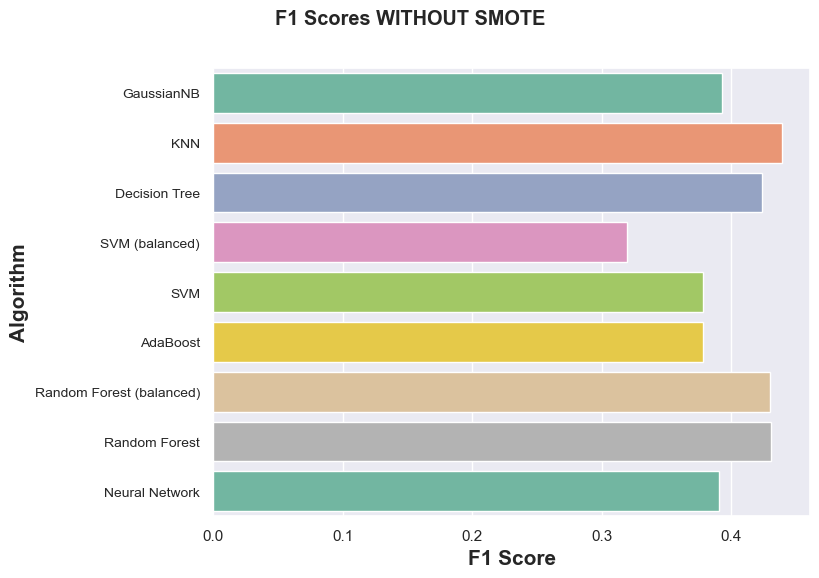

In [213]:
# Plot results
sns.set(font_scale=1)  # Adjusting font scale
plt.figure(figsize=(9, 6), dpi=100)  # Adjusting figure size
g = sns.barplot(x=f1_res["F1_Scores"], y=f1_res["Algorithm"], palette="Set2", orient="h")
plt.xlabel("F1 Score", fontsize=15, fontweight='bold')
plt.ylabel("Algorithm", fontsize=15, fontweight='bold')
plt.yticks(fontsize=10)
plt.tight_layout(pad=3)  # Adjusting padding
plt.suptitle("F1 Scores WITHOUT SMOTE", fontweight="bold", y=1.015)
plt.show()

#### 3.3.2  Models with SMOTE <a class="anchor" id="mult-with"></a>

In [215]:
oversample = SMOTE()
X_mult_train_smote, y_mult_train_smote = oversample.fit_resample(X_mult_train, y_mult_train)

In [216]:

# Define the F1 scorer with pos_label=1
f1_scorer = make_scorer(f1_score, pos_label=1,average="weighted")

# Define models
models = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM (balanced)': SVC(class_weight='balanced'),
    "SVM": SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest (balanced)': RandomForestClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(solver='adam',max_iter=1000),
}

# F1_Scores
f1_scores_smoted = []

for model_name, model in models.items():
    print(f"Fitting {model_name}...")
    
    # Use the model directly on the validation set
    y_pred_val = model.fit(X_mult_train_smote, y_mult_train_smote).predict(X_mult_val)
    f1_val = f1_score(y_mult_val, y_pred_val, pos_label=1,average="weighted")
    
    f1_scores_smoted.append([f1_val])

# Create DataFrame with results
f1_res_smoted = pd.DataFrame({
    "F1_Scores": [result[0] for result in f1_scores_smoted],
    "Algorithm": list(models.keys())
})


Fitting GaussianNB...
Fitting KNN...
Fitting Decision Tree...
Fitting SVM (balanced)...
Fitting SVM...
Fitting AdaBoost...
Fitting Random Forest (balanced)...
Fitting Random Forest...
Fitting Neural Network...


C:\Users\guicu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\guicu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\guicu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


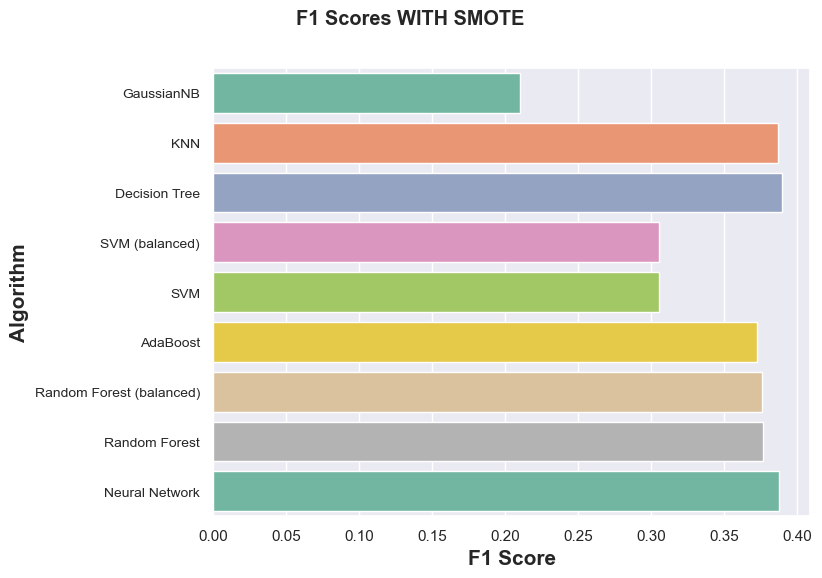

In [217]:
# Plot results
sns.set(font_scale=1)  # Adjusting font scale
plt.figure(figsize=(9, 6), dpi=100)  # Adjusting figure size
g = sns.barplot(x=f1_res_smoted["F1_Scores"], y=f1_res_smoted["Algorithm"], palette="Set2", orient="h")
plt.xlabel("F1 Score", fontsize=15, fontweight='bold')
plt.ylabel("Algorithm", fontsize=15, fontweight='bold')
plt.yticks(fontsize=10)
plt.tight_layout(pad=3)  # Adjusting padding
plt.suptitle("F1 Scores WITH SMOTE", fontweight="bold", y=1.015)
plt.show()

#### 3.3.3 Optimization: 3 best <a class="anchor" id="mult-optimization3best"></a>

By looking at the graphics, we chose 3 models that had best F1 Score
Now, we will search for their best parameters.

- Random Forest
- KNN
- Decision tree

#####  **1)  Random Forest**

##### <font color='grey'>    GRID SEARCH: Random Forest</font>

In [ ]:
# Define the Random Forest model
random_forest_model = RandomForestClassifier()

# Create a scorer with 'f1_weighted'
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'class_weight' : ['balanced']
}
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': [None, 'sqrt', 'log2'],

# Create a grid search object
random_forest_model_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring=f1_weighted_scorer, cv=3)

# Perform the grid search on the training data
random_forest_model_search.fit(X_mult_train,y_mult_train)

# Print results
print("Best Parameters:", random_forest_model_search.best_params_)


**Note:** since we changed the place of this cell, and it takes too many time to run, we copy the output bellow:

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Get the best parameters
best_params = random_forest_model_search2.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_forest_model_mult = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_forest_model_mult.predict(X_mult_val)

# Evaluate the model using F1 score with 'weighted' averaging
f1_weighted = f1_score(y_mult_val, y_pred, average='weighted')
print("F1 Score (weighted):", f1_weighted)

**Note:** since we changed the place of this cell, and it takes too many time to run, we copy the output bellow:


Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}
F1 Score (weighted): 0.37794196560562693

#####  **2)  KNN**
##### <font color='grey'>   GRID SEARCH: KNN</font>

In [246]:
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


# Create the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
}

# Create the F1 score scorer for weighted averaging
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring=f1_weighted_scorer, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_mult_train, y_mult_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_knn_model.predict(X_mult_val)

# Evaluate the model using F1 score
f1 = f1_score(y_mult_val, y_pred, average='weighted')
print("Weighted F1 Score:", f1)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Weighted F1 Score: 0.4413021012128841


In [248]:
# Create the KNN model with the best parameters
final_knn_model = KNeighborsClassifier(n_neighbors=9, weights='distance', algorithm='auto')

# Fit the model to the training data
final_knn_model.fit(X_mult_train, y_mult_train)

# Predict on the validation set
y_pred = final_knn_model.predict(X_mult_val)

# Evaluate the model using F1 score
f1 = f1_score(y_mult_val, y_pred, average='weighted')
print("Weighted F1 Score on Validation Set:", f1)

# Additional: Print classification report
print("Classification Report:")
print(classification_report(y_mult_val, y_pred))

Weighted F1 Score on Validation Set: 0.4413021012128841
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.71      0.62     11522
           1       0.11      0.02      0.04      2385
           2       0.35      0.27      0.30      7464

    accuracy                           0.48     21371
   macro avg       0.33      0.33      0.32     21371
weighted avg       0.43      0.48      0.44     21371



#####  **3)  Decision Tree**

In [287]:
# Define the parameter grid
param_grid = {
    'min_samples_split': [2,10,50,200],
    'min_samples_leaf': [1, 10, 50],
    'criterion': ['gini', 'entropy'],
    'max_features':[None,0.5]
}

# Create the F1 score scorer for weighted averaging
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation using F1 score as the scoring metric
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring=f1_weighted_scorer,verbose=1)

# Fit the grid search to your data
grid_search.fit(X_mult_train, y_mult_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Best Parameters: {'criterion': 'gini', 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 50}
F1 Score: 0.4428030427540035
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61     11522
           1       0.10      0.01      0.03      2385
           2       0.35      0.29      0.31      7464

    accuracy                           0.48     21371
   macro avg       0.33      0.33      0.32     21371
weighted avg       0.43      0.48      0.44     21371



C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [290]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_dt_model.predict(X_mult_val)

# Evaluate the model using F1 score
f1 = f1_score(y_mult_val, y_pred, average='weighted')
print("F1 Score:", f1)

# Additional: Print classification report
print("Classification Report:")
print(classification_report(y_mult_val, y_pred))

Best Parameters: {'criterion': 'gini', 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 50}
F1 Score: 0.4428030427540035
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61     11522
           1       0.10      0.01      0.03      2385
           2       0.35      0.29      0.31      7464

    accuracy                           0.48     21371
   macro avg       0.33      0.33      0.32     21371
weighted avg       0.43      0.48      0.44     21371



C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [272]:
# Create and fit the Decision Tree model
dt_cf = DecisionTreeClassifier(random_state=42, criterion="gini", max_features=0.5, min_samples_leaf=1, min_samples_split=50)
y_pred=dt_cf.fit(X_mult_train, y_mult_train).predict(X_mult_val)
conf_matrix_dt = confusion_matrix(y_mult_val, y_pred)
print(conf_matrix_dt)

[[8123  164 3235]
 [1657   41  687]
 [5168  103 2193]]


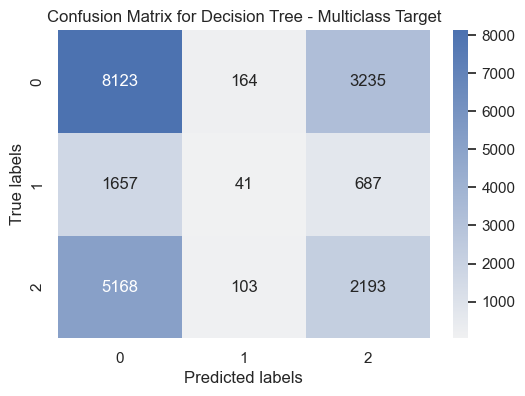

In [296]:
# Create confusion matrix
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap=sns.color_palette("light:b", as_cmap=True), xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree - Multiclass Target')
plt.show()

**Meaning:**<br>
[[Correct predictions for Class 0, Predicted as 1 but actually 0, Predicted as 2 but actually 0],<br>
 [Predicted as 0 but actually 1, Correct predictions for Class 1, Predicted as 2 but actually 1],<br>
 [Predicted as 0 but actually 2, Predicted as 1 but actually 2, Correct predictions for Class 2]]

#####  **4)  Results**

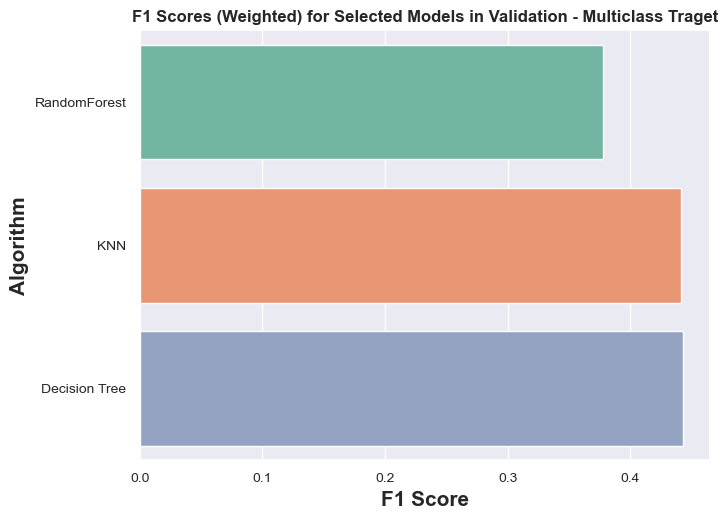

In [294]:
# F1 scores for the three models
final_f1_scores = [0.37794196560562693,0.4413021012128841 , 0.4428030427540035]
models = ['RandomForest', 'KNN', 'Decision Tree']

# Create a DataFrame
df = pd.DataFrame({'Algorithm': models, 'F1 Score': final_f1_scores})

# Plot the F1 scores
sns.set(font_scale=1)
plt.figure(figsize=(8, 6), dpi=100)  # Adjust the figsize parameter for different dimensions
g = sns.barplot(x='F1 Score', y='Algorithm', data=df, palette='Set2', orient='h')
plt.xlabel("F1 Score", fontsize=15, fontweight='bold')
plt.ylabel("Algorithm", fontsize=15, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("F1 Scores (Weighted) for Selected Models in Validation - Multiclass Traget", fontweight="bold")
plt.tight_layout(pad=3)
plt.show()

#### 3.3.4 Optimization: Other models <a class="anchor" id="mult-optimizationother"></a>


#####  **1)  SV Classifier**

##### <font color='grey'>    GRID SEARCH: Support Vector Classification</font>


In [296]:
# Define the SVM classifier
svm_classifier_mult = SVC()

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Create the F1 score scorer for weighted averaging
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_classifier_mult, param_grid, cv=5, scoring=f1_weighted_scorer, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_mult_train, y_mult_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_svm_model_mult = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_svm_model_mult.predict(X_mult_val)

# Evaluate the model using F1 score
f1 = f1_score(y_mult_val, y_pred,average='weighted')
print("F1 Score:", f1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
F1 Score: 0.32637071616898544


In [298]:
# Create a new SVM model with the best parameters
best_svm_model_mult = SVC(C=10, gamma='scale', kernel='rbf')

# Train the model on your data
best_svm_model_mult.fit(X_mult_train, y_mult_train)

# Predict on the validation set
y_pred = best_svm_model_mult.predict(X_mult_val)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


# Evaluate the model using F1 score
f1 = f1_score(y_mult_val, y_pred, average='weighted')
print("Weighted F1 Score on Validation Set:", f1)

# Additional: Print classification report
print("Classification Report:")
print(classification_report(y_mult_val, y_pred))


Weighted F1 Score on Validation Set: 0.37913630721292574
Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70     11522
           1       0.00      0.00      0.00      2385
           2       0.41      0.00      0.00      7464

    accuracy                           0.54     21371
   macro avg       0.32      0.33      0.23     21371
weighted avg       0.43      0.54      0.38     21371



#####  **2)  AdaBost**

##### <font color='grey'>    GRID SEARCH: AdaBost</font>

In [300]:

# Define the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=2)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5, 1]
}

# Create a scorer with 'f1_weighted'
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Create a grid search object with the custom scorer
grid_search = GridSearchCV(
    estimator=adaboost_model,
    param_grid=param_grid,
    scoring=f1_weighted_scorer,
    cv=5,
    verbose=1
)

# Perform the grid search on the training data
grid_search.fit(X_mult_train, y_mult_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_ada_model_mult = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_ada_model_mult.predict(X_mult_val)

# Evaluate the model using F1 score with 'weighted' averaging
f1_weighted = f1_score(y_mult_val, y_pred, average='weighted')
print("F1 Score (weighted):", f1_weighted)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 1, 'n_estimators': 50}
F1 Score (weighted): 0.37794196560562693


In [301]:
# Additional: Print classification report
print("Classification Report:")
print(classification_report(y_mult_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70     11522
           1       0.14      0.00      0.00      2385
           2       0.33      0.00      0.00      7464

    accuracy                           0.54     21371
   macro avg       0.34      0.33      0.23     21371
weighted avg       0.42      0.54      0.38     21371



#####  **3)  Gaussian Naive Bayes**
##### <font color='grey'>   GRID SEARCH: Gaussian Naive Bayes</font>

In [ ]:

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Define the hyperparameters and their possible values
param_grid = {
    'var_smoothing': [1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  #the value of f1-score doesnt change as we change the var_smoothing
}

weighted_f1_scorer = make_scorer(f1_score, average='weighted')

# Create the GridSearchCV object with scoring='f1'
grid_search = GridSearchCV(nb_model, param_grid, scoring=weighted_f1_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_mult_train, y_mult_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_nb_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_nb_model.predict(X_mult_val)

# Evaluate the model using F1 score
f1 = f1_score(y_mult_val, y_pred, average='weighted')
print("F1 Score:", f1)

# Additional: Print classification report
print("Classification Report:")
print(classification_report(y_mult_val, y_pred))

In [303]:

# Define the Random Forest model
random_forest_model = RandomForestClassifier()

# Create a scorer with 'f1_weighted'
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'class_weight' : ['balanced']
}
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': [None, 'sqrt', 'log2'],

# Create a grid search object
random_forest_model_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring=f1_weighted_scorer, cv=3)

# Perform the grid search on the training data
random_forest_model_search.fit(X_mult_train,y_mult_train)

# Print results
print("Best Parameters:", random_forest_model_search.best_params_)


Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


Best Parameters: {'var_smoothing': 1e-05}
F1 Score: 0.38748144757169095
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.95      0.69     11522
           1       0.09      0.03      0.04      2385
           2       0.33      0.02      0.04      7464

    accuracy                           0.52     21371
   macro avg       0.32      0.33      0.26     21371
weighted avg       0.42      0.52      0.39     21371

#####  **4)  Neural Networks**

##### <font color='grey'>    GRID SEARCH: NN</font>

In [210]:

# Ignore FutureWarning related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")


# Step 5: Design the Neural Network Architecture using MLPClassifier
model = MLPClassifier(random_state=42)

# Step 6: Set up the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(128, 64,32), (64,32)],
    'solver': ['adam', 'sgd'],
    "early_stopping":[True,False],
    'max_iter': [1000,2000],
    "activation":["relu","tanh","logistic"]
}

# Step 7: Define scoring metric
weighted_f1_scorer = make_scorer(f1_score, average='weighted')

# Step 8: Perform grid search using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=weighted_f1_scorer, verbose=1)
grid_search.fit(X_mult_train, y_mult_train)

# Step 9: Get the best model
best_model = grid_search.best_estimator_

# Step 10: Test the best model
y_pred = best_model.predict(X_mult_val)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\guicu\anaconda3\Lib\site-packages\sklearn\neural_network\_m

NameError: name 'y_mult_test' is not defined

In [211]:

# Step 11: Evaluate the best model
weighted_f1 = f1_score(y_mult_val, y_pred, average='weighted')

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Weighted F1 Score: {weighted_f1}')

Best Parameters: {'activation': 'tanh', 'early_stopping': False, 'hidden_layer_sizes': (128, 64, 32), 'max_iter': 2000, 'solver': 'adam'}
Weighted F1 Score: 0.4405681758388689


### 3.4 Extra: HistGradientBoosting  <a class="anchor" id="extra-model"></a>

#### 3.4.1 Binnary Target <a class="anchor" id="binhgb"></a>

##### **1) In a dataset with the imputed missing values**  

In [435]:
HGB_with_missing = HistGradientBoostingClassifier(class_weight='balanced', random_state=1)

In [436]:
HGB_with_missing.fit(X_bin_train, y_bin_train)

HistGradientBoostingClassifier(class_weight='balanced', random_state=1)

In [437]:
labels_train = HGB_with_missing.predict(X_bin_train)
labels_val = HGB_with_missing.predict(X_bin_val)

In [438]:
metrics(y_train = y_bin_train, pred_train = labels_train, y_val = y_bin_val, pred_val = labels_val)
print("F1 Score Validation: ", f1_score(y_bin_val, labels_val, pos_label=1))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     43912
           1       0.23      0.76      0.35      5342

    accuracy                           0.69     49254
   macro avg       0.59      0.72      0.58     49254
weighted avg       0.88      0.69      0.75     49254

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

 ##### **2) In a dataset without the imputed missing values** :

In [440]:
#ALTERATIONS NEEDDE IN THE DATASET
#1)ENCODING
#--1.1 nominal ecoding
     #reducing dim
train_for_histgrad['discharge_disposition'] = train_for_histgrad['discharge_disposition'].replace(discharge_types_to_replace, 'Other reason')
val_for_histgrad['discharge_disposition'] = val_for_histgrad['discharge_disposition'].replace(discharge_types_to_replace, 'Other reason')
val_for_histgrad['discharge_disposition'] = val_for_histgrad['discharge_disposition'].replace('Expired in a medical facility. Medicaid only, hospice.', 'Other reason')

train_for_histgrad['medical_specialty'] = train_for_histgrad['medical_specialty'].replace(medical_specialty_to_replace, 'Other')
val_for_histgrad['medical_specialty'] = val_for_histgrad['medical_specialty'].replace(medical_specialty_to_replace, 'Other')

train_for_histgrad['admission_source'] = train_for_histgrad['admission_source'].replace(admission_source_to_replace, 'Other')
val_for_histgrad['admission_source'] = val_for_histgrad['admission_source'].replace(admission_source_to_replace, 'Other')

train_for_histgrad['admission_type'] = train_for_histgrad['admission_type'].replace(admission_type_to_replace, 'Other')
val_for_histgrad['admission_type'] = val_for_histgrad['admission_type'].replace(admission_type_to_replace, 'Other')

    #one-hot ecoding
train_for_histgrad = pd.get_dummies(train_for_histgrad, columns=nominal_cols_to_encode)
val_for_histgrad = pd.get_dummies(val_for_histgrad, columns=nominal_cols_to_encode)


#--1.2 ordinal encoding
train_for_histgrad['age'] = label_encoder.fit_transform(train_for_histgrad['age'])
val_for_histgrad['age'] = label_encoder.fit_transform(val_for_histgrad['age'])

#____a1c_test_result
# Mapping values to their corresponding encoded values
mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}

# Applying the mapping to the 'a1c_test_result' column
train_for_histgrad['a1c_test_result'] = train_for_histgrad['a1c_test_result'].replace(mapping)
val_for_histgrad['a1c_test_result'] = val_for_histgrad['a1c_test_result'].replace(mapping)


#____glucose_test_result
# Mapping values to their corresponding encoded values
mapping_glucose = {'None': 0, 'Normal': 1, 'High': 2, 'Dangerously high': 3}

# Applying the mapping to the 'glucose_test_result' column
train_for_histgrad['glucose_test_result'] = train_for_histgrad['glucose_test_result'].replace(mapping_glucose)
val_for_histgrad['glucose_test_result'] = val_for_histgrad['glucose_test_result'].replace(mapping_glucose)


In [427]:
# Defining the different variables

#binary
X_bin_train_hist=train_for_histgrad.copy()
X_bin_val_hist=val_for_histgrad.copy()

y_bin_train_hist=y_bin_train.copy()
y_bin_val_hist= y_bin_val.copy()

#multiclass
X_mult_train_hist= train_for_histgrad.copy()
X_mult_val_hist=val_for_histgrad.copy()
y_mult_train_hist = y_mult_train.copy()
y_mult_val_hist= y_mult_val.copy()

In [428]:
#binary
columns_to_drop = [
"average_pulse_bpm",
"outpatient_visits_in_previous_year",
"number_lab_tests",
"non_lab_procedures",
'pioglitazone', 'Second_Diagnosis_diseases of the circulatory system',
'First_Diagnosis_diseases of the respiratory system', 'admission_type_Urgent',
'First_Diagnosis_diseases of the genitourinary system', 'medical_specialty_Surgery-General',
'discharge_disposition_Other reason', 'glipizide', 'Second_Diagnosis_diseases of the respiratory system',
'admission_source_Clinic Referral', 'race_Asian', 'Additional_Diagnosis_symptoms, signs, and ill-defined conditions',
'Second_Diagnosis_diseases of the digestive system', 'race_Hispanic', 'race_AfricanAmerican',
'glyburide', 'gender_Female', 'gender_Male', 'Second_Diagnosis_external causes of injury and supplemental classification',
'Additional_Diagnosis_injury and poisoning', 'Second_Diagnosis_diseases of the genitourinary system',
'rosiglitazone', 'admission_source_ Transfer from another health care facility',
'Additional_Diagnosis_diseases of the digestive system', 'medical_specialty_InternalMedicine',
'medical_specialty_Orthopedics', 'medical_specialty_Psychiatry', 'Second_Diagnosis_injury and poisoning',
'Second_Diagnosis_symptoms, signs, and ill-defined conditions', 'Additional_Diagnosis_diseases of the circulatory system',
'medical_specialty_Family/GeneralPractice', 'admission_source_Transfer from a hospital',
'First_Diagnosis_diseases of the circulatory system', 'Additional_Diagnosis_other diseases',
'glimepiride', 'glucose_test_result', 'race_Caucasian',
'Second_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders'
]
X_bin_train_hist = X_bin_train_hist.drop(columns=columns_to_drop)
X_bin_val_hist= X_bin_val_hist.drop(columns=columns_to_drop)

In [429]:
columns_to_drop = features_with_zero_total
X_bin_train_hist = X_bin_train_hist.drop(columns=columns_to_drop)
X_bin_val_hist= X_bin_val_hist.drop(columns=columns_to_drop)

In [430]:
X_bin_train_hist.shape

(49254, 34)

In [431]:
HGB_without_missing = HistGradientBoostingClassifier(class_weight='balanced',random_state=1)

# Train the classifier
HGB_without_missing.fit(X_bin_train_hist, y_bin_train_hist)

HistGradientBoostingClassifier(class_weight='balanced', random_state=1)

In [432]:
labels_train = HGB_without_missing.predict(X_bin_train_hist)
labels_val = HGB_without_missing.predict(X_bin_val_hist)

In [433]:
metrics(y_train = y_bin_train_hist, pred_train = labels_train, y_val = y_bin_val_hist, pred_val = labels_val)
print("F1 Score Validation: ", f1_score(y_bin_val_hist, labels_val, pos_label=1))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     43912
           1       0.23      0.76      0.35      5342

    accuracy                           0.70     49254
   macro avg       0.59      0.72      0.58     49254
weighted avg       0.88      0.70      0.75     49254

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

In [496]:
# Define the HGB model
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

HGB_cm = HistGradientBoostingClassifier( class_weight="balanced")
y_pred_val = logistic_cm.fit(X_bin_train_hist, y_bin_train_hist).predict(X_bin_val_hist)
conf_matrix = confusion_matrix(y_bin_val_hist, y_pred_val)
print(conf_matrix)

[[14290  4696]
 [ 1007  1378]]


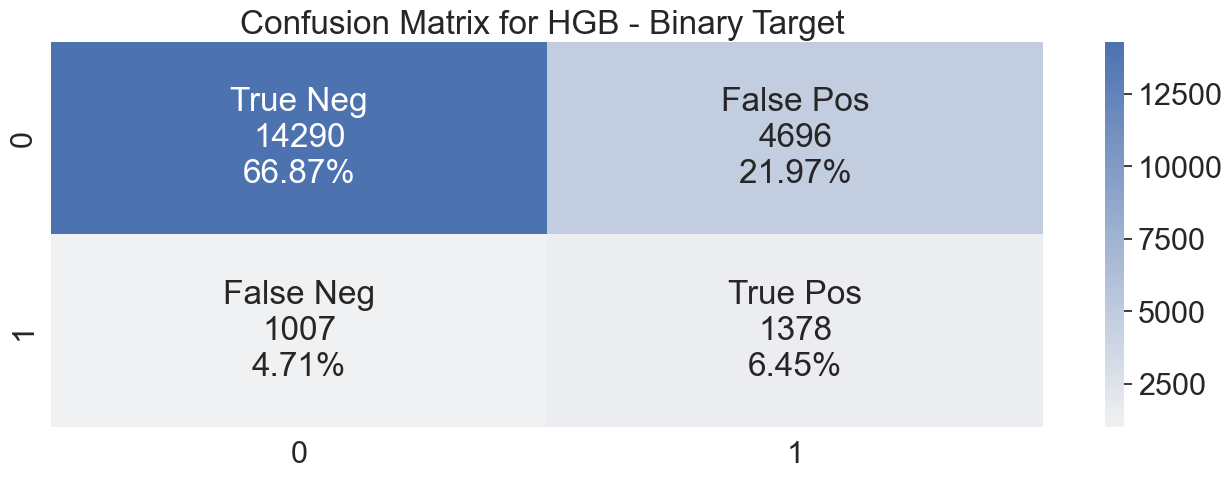

In [497]:
sns.set(font_scale=2)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']  # Adjusted group names
test_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, test_counts, test_percentage)]
test_labels = np.asarray(test_labels).reshape(2, 2)
plt.figure(figsize=(16, 5))
plt.title("Confusion Matrix for HGB - Binary Target ")
sns.heatmap(conf_matrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));


**Conclusion:** by looking at the results of F1 Score Validation - HGB_without_missing is the best model

##### <font color='grey'>    Comparing HGB with our Best Model, Logistic Regreession (Without Smothing) </font>
By comparing both Hist GradientBoosting Classifiers, we can see thatboth models got a pretty similar F1 Score in the validation subset. 
However, the best model was the one where we used our missing values.
So, we will be comparing it to our previous best model, Logistic Regression (Without Smothing).

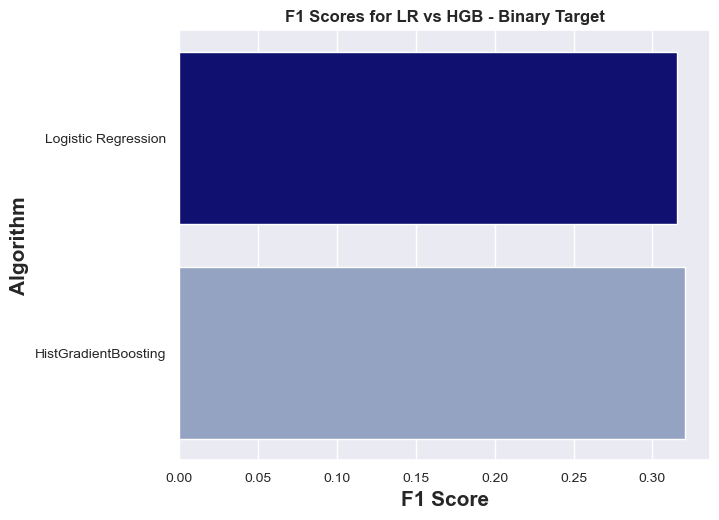

In [434]:
# F1 scores for the three models
HGB_vs_best_LR_f1_scores = [0.3156539046950006,0.32047315741583254]
models = ['Logistic Regression','HistGradientBoosting']

# Create a DataFrame
df = pd.DataFrame({'Algorithm': models, 'F1 Score': HGB_vs_best_LR_f1_scores})
# Define a palette with different shades of blue for each bar
palette = {model: 'navy' if model in models[0] else sns.color_palette('Set2', n_colors=8)[2] for model in df['Algorithm']}
# Plot the F1 scores
sns.set(font_scale=1)
plt.figure(figsize=(8, 6), dpi=100)  # Adjust the figsize parameter for different dimensions
g = sns.barplot(x='F1 Score', y='Algorithm', data=df, palette=palette, orient='h')
plt.xlabel("F1 Score", fontsize=15, fontweight='bold')
plt.ylabel("Algorithm", fontsize=15, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("F1 Scores for LR vs HGB - Binary Target", fontweight="bold")
plt.tight_layout(pad=3)
plt.show()



**Conclusion:** For the binary target, HistGradientBoosting without the inputation of missing values is the best model.

#### 3.4.2 Multiclass Target <a class="anchor" id="multhgb"></a>

##### **1) In a dataset with the imputed missing values**  

In [445]:
HGB_with_missing = HistGradientBoostingClassifier(class_weight='balanced', random_state=1)

In [446]:
HGB_with_missing.fit(X_mult_train, y_mult_train)

HistGradientBoostingClassifier(class_weight='balanced', random_state=1)

In [447]:
labels_train = HGB_with_missing.predict(X_mult_train)
labels_val = HGB_with_missing.predict(X_mult_val)

In [448]:
metrics(y_train = y_mult_train, pred_train = labels_train, y_val = y_mult_val, pred_val = labels_val)
print("F1 Score Validation: ", f1_score(y_mult_val, labels_val, pos_label=1,average="weighted"))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.41      0.49     26555
           1       0.17      0.43      0.24      5484
           2       0.40      0.40      0.40     17215

    accuracy                           0.41     49254
   macro avg       0.39      0.41      0.37     49254
weighted avg       0.48      0.41      0.43     49254

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

 ##### **2) In a dataset without the imputed missing values**  : 

In [449]:
#multiclass
columns_to_drop = ['number_of_medications',
'admission_source_ Emergency Room', 'glyburide', 'pioglitazone',
'Additional_Diagnosis_diseases of the genitourinary system',
'discharge_disposition_Other reason', 'First_Diagnosis_injury and poisoning',
'medical_specialty_InternalMedicine',
'Additional_Diagnosis_external causes of injury and supplemental classification',
'admission_source_Transfer from a hospital',
'Second_Diagnosis_external causes of injury and supplemental classification',
'admission_type_Elective', 'discharge_disposition_Expired', 'insulin',
'medical_specialty_Other', 'race_Other', 'Additional_Diagnosis_diseases of the respiratory system',
'race_Asian', 'admission_type_Emergency', 'insurance',
'discharge_disposition_Discharged/transferred to another type of inpatient care institution',
'medical_specialty_Cardiology', 'discharge_disposition_Discharged to home',
'no medication prescribed', 'prescribed_diabetes_meds_No', 'prescribed_diabetes_meds_Yes',
'medical_specialty_Surgery-General', 'a1c_test_result', 'medical_specialty_Orthopedics',
'Additional_Diagnosis_symptoms, signs, and ill-defined conditions',
'First_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders',
'admission_type_Urgent', 'medical_specialty_Family/GeneralPractice',
'First_Diagnosis_symptoms, signs, and ill-defined conditions',
'admission_source_ Transfer from another health care facility',
'admission_source_ Physician Referral', 'race_Caucasian', 'rosiglitazone',
'medical_specialty_Orthopedics-Reconstructive', 'Second_Diagnosis_other diseases',
'Second_Diagnosis_diseases of the genitourinary system', 'medical_specialty_Emergency/Trauma',
'Additional_Diagnosis_diseases of the circulatory system',
'discharge_disposition_Discharged/transferred to SNF',
'Second_Diagnosis_diseases of the circulatory system', 'change_in_meds_during_hospitalization_No',
'change_in_meds_during_hospitalization_Ch',
'Additional_Diagnosis_diseases of the digestive system', 'medical_specialty_Nephrology',
'age', 'Additional_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders',
'admission_source_Clinic Referral', 'glipizide',
'First_Diagnosis_diseases of the genitourinary system',
'Additional_Diagnosis_other diseases',
'Second_Diagnosis_diseases of the digestive system', 'Additional_Diagnosis_injury and poisoning',
'First_Diagnosis_diseases of the circulatory system', 'medical_specialty_Radiologist',
'Second_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders',
'medical_specialty_Psychiatry',
'Second_Diagnosis_symptoms, signs, and ill-defined conditions',
'discharge_disposition_Discharged/transferred to another short term hospital',
'admission_source_Other', 'Second_Diagnosis_injury and poisoning',
'discharge_disposition_Discharged/transferred to home with home health service',
'First_Diagnosis_diseases of the respiratory system', 'race_AfricanAmerican',
'glucose_test_result', 'glimepiride',
'First_Diagnosis_diseases of the digestive system'
]
X_mult_train_hist = X_mult_train_hist.drop(columns=columns_to_drop)
X_mult_val_hist= X_mult_val_hist.drop(columns=columns_to_drop)

In [450]:
columns_to_drop = features_with_zero_total_mult
X_mult_train_hist = X_mult_train_hist.drop(columns=columns_to_drop)
X_mult_val_hist= X_mult_val_hist.drop(columns=columns_to_drop)

In [451]:
X_mult_train_hist.shape

(49254, 16)

In [452]:
HGB_without_missing = HistGradientBoostingClassifier(class_weight='balanced', random_state=1)

In [453]:
HGB_without_missing.fit(X_mult_train_hist, y_mult_train_hist)

HistGradientBoostingClassifier(class_weight='balanced', random_state=1)

In [454]:
labels_train = HGB_without_missing.predict(X_mult_train_hist)
labels_val = HGB_without_missing.predict(X_mult_val_hist)

In [455]:
metrics(y_train = y_mult_train_hist, pred_train = labels_train, y_val = y_mult_val_hist, pred_val = labels_val)
print("F1 Score Validation: ", f1_score(y_mult_val_hist, labels_val, pos_label=1, average="weighted"))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.41      0.49     26555
           1       0.16      0.46      0.24      5484
           2       0.41      0.36      0.38     17215

    accuracy                           0.40     49254
   macro avg       0.39      0.41      0.37     49254
weighted avg       0.48      0.40      0.42     49254

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

In [461]:
# Create and fit the HGB model
HGB_cf = HistGradientBoostingClassifier(class_weight='balanced', random_state=1)
y_pred=HGB_cf.fit(X_mult_train_hist, y_mult_train_hist).predict(X_mult_val_hist)
conf_matrix_HGB = confusion_matrix(y_mult_val_hist, y_pred)
print(conf_matrix_HGB)

[[4236 3712 3574]
 [ 874  750  761]
 [2727 2435 2302]]


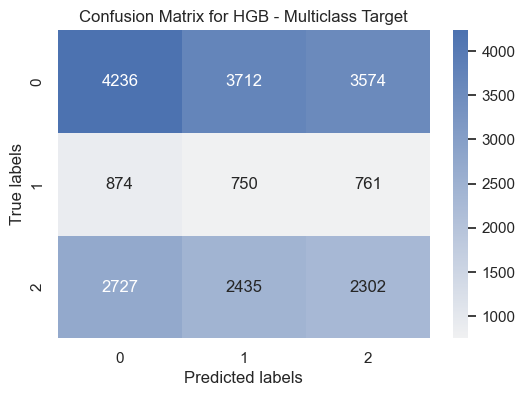

In [462]:
# Create confusion matrix
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_HGB, annot=True, fmt='d', cmap=sns.color_palette("light:b", as_cmap=True), xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for HGB - Multiclass Target')
plt.show()

**Conclusion:** by looking at the results of F1 Score Validation - HGB_without_missing is not best model, but since the differences are not that different we choose this one


##### <font color='grey'>    Comparing HGB with our Best Model, Decision Tree </font>
By comparing both Hist GradientBoosting Classifiers, we can see that the dataset in which the missing values were not imputed, the F1 Score (Weighted) in the validation subset was higher. Regardless of this, the Decision Tree's F1 Score (Weighted) was much higher.
Let us see the difference in the next graph.

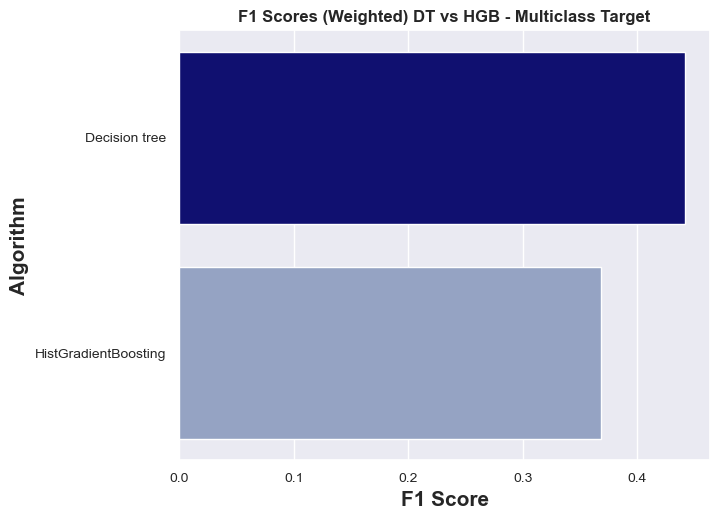

In [459]:

# F1 scores for the three models
HGB_vs_best_DT_f1_scores = [0.4413021012128841,0.3680107425582791]


models = ['Decision tree', 'HistGradientBoosting']

# Create a DataFrame
df = pd.DataFrame({'Algorithm': models, 'F1 Score': HGB_vs_best_DT_f1_scores})

# Define a palette with different shades of blue for each bar
palette = {model: 'navy' if model in models[0] else sns.color_palette('Set2', n_colors=8)[2] for model in df['Algorithm']}

# Plot the F1 scores using the defined palette
sns.set(font_scale=1)
plt.figure(figsize=(8, 6), dpi=100)  # Adjust the figsize parameter for different dimensions
g = sns.barplot(x='F1 Score', y='Algorithm', data=df, palette=palette, orient='h')
plt.xlabel("F1 Score", fontsize=15, fontweight='bold')
plt.ylabel("Algorithm", fontsize=15, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("F1 Scores (Weighted) DT vs HGB - Multiclass Target", fontweight="bold")
plt.tight_layout(pad=3)
plt.show()


 ## 4. Deployment - Test Dataset  <a class="anchor" id="d-teste"></a>

In [463]:
test_original=pd.read_csv("test.csv", sep=",")

In [464]:
test = test_original.copy()

In [465]:
test.set_index('encounter_id', inplace = True)
test.head()
test.columns

Index(['country', 'patient_id', 'race', 'gender', 'age', 'weight',
       'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication'],
      dtype='object')

In [466]:
undesirable_chars = ["?", " "]
initial_count = test.isna().sum()

test.replace(undesirable_chars, np.nan, inplace=True)

replacements_count = test.isna().sum()-initial_count 
print('\033[1m' + '-> Undesirable Characters' + '\033[0m')
print(" Number of Undesirable Characters Replaced:\n" , replacements_count)

-> Undesirable Characters
 Number of Undesirable Characters Replaced:
 country                                      0
patient_id                                   0
race                                       657
gender                                       0
age                                          0
weight                                   29579
payer_code                               12055
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                               0
medical_specialty                        15027
average_pulse_bpm                            0
discharge_disposition                        0
admission_source                             0
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                   

In [467]:
test.gender.replace("Unknown/Invalid" , np.nan , inplace=True)
test.admission_type.replace("Not Available" , np.nan , inplace=True)
test.admission_source.replace(" Not Available" , np.nan , inplace=True)
test.glucose_test_result.replace(np.nan, "None", inplace=True)
test.a1c_test_result.replace(np.nan, "None", inplace=True)

In [468]:
test= test.drop('country', axis=1)
test['insurance'] = test['payer_code'].notnull().astype(int)
test = test.drop('payer_code', axis=1)

test['First_Diagnosis'] = test['primary_diagnosis'].apply(assign_icd9_interval)
test['Second_Diagnosis'] = test['secondary_diagnosis'].apply(assign_icd9_interval)
test['Additional_Diagnosis'] = test['additional_diagnosis'].apply(assign_icd9_interval)

test = test.drop('primary_diagnosis', axis=1)
test = test.drop('secondary_diagnosis', axis=1)
test = test.drop('additional_diagnosis', axis=1)


values_to_replace= ['infectious and parasitic diseases', 'neoplasms','mental disorders','diseases of the musculoskeletal system and connective tissue','diseases of the skin and subcutaneous tissue','diseases of the blood and blood-forming organs','diseases of the nervous system and sense organs','complications of pregnancy, childbirth, and the puerperium','congenital anomalies']

test['First_Diagnosis']=other_diseases(values_to_replace,test['First_Diagnosis'])
test['Second_Diagnosis']=other_diseases(values_to_replace,test['Second_Diagnosis'])
test['Additional_Diagnosis']=other_diseases(values_to_replace,test['Additional_Diagnosis'])

test['T_num_visits'] = test.groupby('patient_id')['patient_id'].transform('count')


test['medication'].replace('[]', "['no medication prescribed']", inplace=True)


medication_list=extract_unique_medications(test, "medication")
test = transform_to_multiple_columns(test, 'medication')
below_threshold_meds = medications_below_threshold(test[medication_list])
test.drop(columns=below_threshold_meds, inplace=True)
medications_to_remove = below_threshold_meds
medication_list = [med for med in medication_list if med not in medications_to_remove]
medication_list

test['number_medication_prescribed'] = np.where(
    test['no medication prescribed'] == 1,
    0,  # If 'no medication prescribed' == 1, set the value to 0
    test[['glipizide', 'pioglitazone', 'glimepiride', 'glyburide', 'rosiglitazone', 'metformin', 'insulin']].sum(axis=1)
)


In [469]:
test.columns

Index(['patient_id', 'race', 'gender', 'age', 'weight',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'insurance', 'First_Diagnosis', 'Second_Diagnosis',
       'Additional_Diagnosis', 'T_num_visits', 'glipizide', 'glyburide',
       'glimepiride', 'pioglitazone', 'no medication prescribed', 'metformin',
       'insulin', 'rosiglitazone', 'number_medication_prescribed'],
      dtype='object')

###  **Is there any patient in test that was in train?**

In [470]:
# Check if 'patient_id' in X_with_patient_id exists in 'test'
patient_ids_exist = X_with_patient_id['patient_id'].isin(test['patient_id'])

# Filter the patient IDs that exist in both datasets
common_patient_ids = X_with_patient_id[X_with_patient_id['patient_id'].isin(test['patient_id'])]['patient_id']

# Check if the lengths are equal to determine if all patient IDs in X_with_patient_id are in test
are_all_patient_ids_in_test = len(common_patient_ids) == len(X_with_patient_id['patient_id'])

# Print the results
print("Patient IDs from X_with_patient_id that exist in test:")
print(common_patient_ids)
print("\nAre all patient IDs from X_with_patient_id in test? :", are_all_patient_ids_in_test)


Patient IDs from X_with_patient_id that exist in test:
Series([], Name: patient_id, dtype: object)

Are all patient IDs from X_with_patient_id in test? : False


In [471]:
duplicates = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    if len(group['gender'].unique()) > 1:
        print(f"Patient ID: {patient_id} - Multiple gender values: {group['gender'].unique()}")
    else:
       continue

In [472]:
for patient_id, group in duplicates.groupby('patient_id'):
    if len(group['gender'].unique()) > 1:
        # Extract the first gender value
        first_gender_value = group['gender'].iloc[0]
        
        # Fill all gender values with the first value
        train.loc[train['patient_id'] == patient_id, 'gender'] = first_gender_value
        
        print(f"Patient ID: {patient_id} - Multiple gender values filled with: {first_gender_value}")

In [473]:
duplicates = train[train.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    if len(group['gender'].unique()) > 1:
        print(f"Patient ID: {patient_id} - Multiple gender values: {group['gender'].unique()}")
    else:
       continue

In [474]:
duplicates = test[test.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    non_null_races = group['race'].dropna().unique()
    if len(non_null_races) > 1:
        print(f"Patient ID: {patient_id} - Multiple race values: {non_null_races}")


Patient ID: 3228903 - Multiple race values: ['AfricanAmerican' 'Caucasian']
Patient ID: 3588723 - Multiple race values: ['AfricanAmerican' 'Caucasian']
Patient ID: 20721366 - Multiple race values: ['AfricanAmerican' 'Other']
Patient ID: 24332220 - Multiple race values: ['Asian' 'Caucasian']
Patient ID: 30689766 - Multiple race values: ['Hispanic' 'Other']
Patient ID: 34367490 - Multiple race values: ['Other' 'Asian']
Patient ID: 36967347 - Multiple race values: ['Asian' 'Other']
Patient ID: 37547937 - Multiple race values: ['Hispanic' 'Other']
Patient ID: 40668975 - Multiple race values: ['Hispanic' 'Caucasian']
Patient ID: 46248840 - Multiple race values: ['AfricanAmerican' 'Asian']
Patient ID: 59074128 - Multiple race values: ['Hispanic' 'Caucasian']
Patient ID: 59275179 - Multiple race values: ['Other' 'Caucasian']
Patient ID: 59732757 - Multiple race values: ['Other' 'Caucasian']
Patient ID: 60987717 - Multiple race values: ['AfricanAmerican' 'Caucasian']
Patient ID: 88844373 - Mul

In [475]:
race_list = ['Caucasian', 'AfricanAmerican', 'Other', 'Hispanic', 'Asian']

#Dataframe with the various ids of duplicated rows (same patients)
duplicates = test[test.duplicated(subset=['patient_id'], keep=False)]

#Group the dataframe by the patient id 
for patient_id, group in duplicates.groupby('patient_id'):
    non_null_races = group['race'].dropna().unique()
    
    if len(non_null_races) > 1:

        # Find the most common race value
        race_counter = Counter(group['race'])
        most_common_race = race_counter.most_common(1)[0][0]
        
        # If there's a tie, select races not equal to 'nan' within the race_list
        ties = [race for race, count in race_counter.items() if count == race_counter.most_common(1)[0][1] and race in race_list and pd.notnull(race) and race != 0]
        
        if len(ties) == 1:
            test.loc[group.index, 'race'] = ties[0]
        else:
            random_race = np.random.choice(ties)
            test.loc[group.index, 'race'] = random_race

In [476]:
duplicates = test[test.duplicated(subset=['patient_id'], keep=False)]

for patient_id, group in duplicates.groupby('patient_id'):
    non_null_races = group['race'].dropna().unique()
    if len(non_null_races) > 1:
        print(f"Patient ID: {patient_id} - Multiple race values: {non_null_races}")


In [477]:
test.drop('patient_id', axis=1, inplace=True)

In [478]:
test[numerical_until_scalling] = scaler.transform(test[numerical_until_scalling])

In [479]:
test = test.drop('weight', axis=1)

In [480]:
variables_to_fill = ['age','gender', 'First_Diagnosis', 'Second_Diagnosis','Additional_Diagnosis','discharge_disposition','age']

# Calculate and store the mode for each variable
modes = {}
for variable in variables_to_fill:
    mode_value = test[variable].mode().values[0]
    modes[variable] = mode_value

# Fill missing values with the mode value
for variable, mode_value in modes.items():
    test[variable].fillna(mode_value, inplace=True)


In [481]:
categorical_columns = ['medical_specialty', 'admission_type', 'admission_source', 'race']

for column in categorical_columns:
    test[column] = impute_categorical_with_knn(test,numerical_until_scalling, column)


In [482]:
test.isna().sum()

race                                     0
gender                                   0
age                                      0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
insurance                                0
First_Diagnosis                          0
Second_Diagnosis                         0
Additional_

In [483]:
test['discharge_disposition'] = test['discharge_disposition'].replace(discharge_types_to_replace, 'Other reason')
test['medical_specialty'] = test['medical_specialty'].replace(medical_specialty_to_replace, 'Other')
test['admission_source'] = test['admission_source'].replace(admission_source_to_replace, 'Other')
test['admission_type'] = test['admission_type'].replace(admission_type_to_replace, 'Other')

In [484]:
test = pd.get_dummies(test, columns=nominal_cols_to_encode)

In [485]:
test['age'] = label_encoder.transform(test['age'])

#____a1c_test_result
# Mapping values to their corresponding encoded values
mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}

# Applying the mapping to the 'a1c_test_result' column
test['a1c_test_result'] = test['a1c_test_result'].replace(mapping)

#____glucose_test_result
# Mapping values to their corresponding encoded values
mapping_glucose = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
# Applying the mapping to the 'glucose_test_result' column
test['glucose_test_result'] = test['glucose_test_result'].replace(mapping_glucose)

In [486]:
columns_to_drop = features_with_zero_total+[
"average_pulse_bpm",
"outpatient_visits_in_previous_year",
"number_lab_tests",
"non_lab_procedures",
'pioglitazone', 'Second_Diagnosis_diseases of the circulatory system',
'First_Diagnosis_diseases of the respiratory system', 'admission_type_Urgent',
'First_Diagnosis_diseases of the genitourinary system', 'medical_specialty_Surgery-General',
'discharge_disposition_Other reason', 'glipizide', 'Second_Diagnosis_diseases of the respiratory system',
'admission_source_Clinic Referral', 'race_Asian', 'Additional_Diagnosis_symptoms, signs, and ill-defined conditions',
'Second_Diagnosis_diseases of the digestive system', 'race_Hispanic', 'race_AfricanAmerican',
'glyburide', 'gender_Female', 'gender_Male', 'Second_Diagnosis_external causes of injury and supplemental classification',
'Additional_Diagnosis_injury and poisoning', 'Second_Diagnosis_diseases of the genitourinary system',
'rosiglitazone', 'admission_source_ Transfer from another health care facility',
'Additional_Diagnosis_diseases of the digestive system', 'medical_specialty_InternalMedicine',
'medical_specialty_Orthopedics', 'medical_specialty_Psychiatry', 'Second_Diagnosis_injury and poisoning',
'Second_Diagnosis_symptoms, signs, and ill-defined conditions', 'Additional_Diagnosis_diseases of the circulatory system',
'medical_specialty_Family/GeneralPractice', 'admission_source_Transfer from a hospital',
'First_Diagnosis_diseases of the circulatory system', 'Additional_Diagnosis_other diseases',
'glimepiride', 'glucose_test_result', 'race_Caucasian',
'Second_Diagnosis_endocrine, nutritional and metabolic diseases, and immunity disorders'

]

test = test.drop(columns=columns_to_drop)


In [487]:
columns_to_keep = X_bin_train.columns

In [488]:
len(columns_to_keep)

34

In [489]:
test= test[columns_to_keep]

In [490]:
test.shape

(30530, 34)

**1) MLP**

In [319]:
final_predictions_MLP = mlpModel.predict(test)
final_predictions_MLP

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [320]:
answer = pd.DataFrame([test.index.T, final_predictions_MLP]).T
answer.columns = ['encounter_id', 'readmitted_binary']
answer.head(5)

encounter_id  readmitted_binary
0        499502                  0
1        447319                  0
2        309126                  0
3        181183                  0
4        359339                  0

In [321]:
mapping_target = {0: 'No', 1:'Yes'}

# Applying the mapping to the 'readmitted_binary' column
answer['readmitted_binary'] = answer['readmitted_binary'].replace(mapping_target)


In [322]:
answer['readmitted_binary']=answer['readmitted_binary'].astype(str)

In [323]:
answer.to_csv('submissionMLP.csv', index=None)

**2) RFC**

In [309]:
final_predictions_RFC = rfcModel.predict(test)
final_predictions_RFC

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [310]:
answer = pd.DataFrame([test.index.T, final_predictions_RFC]).T
answer.columns = ['encounter_id', 'readmitted_binary']
answer.head(5)

encounter_id  readmitted_binary
0        499502                  0
1        447319                  1
2        309126                  0
3        181183                  0
4        359339                  0

In [311]:
mapping_target = {0: 'No', 1:'Yes'}

# Applying the mapping to the 'readmitted_binary' column
answer['readmitted_binary'] = answer['readmitted_binary'].replace(mapping_target)

In [312]:
answer['readmitted_binary']=answer['readmitted_binary'].astype(str)

In [313]:
answer.to_csv('submissionRFC.csv', index=None)

**3) LR**

In [314]:
final_predictions_LR = log_model.predict(test)
final_predictions_LR

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [315]:
answer = pd.DataFrame([test.index.T, final_predictions_LR]).T
answer.columns = ['encounter_id', 'readmitted_binary']
answer.head(5)

encounter_id  readmitted_binary
0        499502                  0
1        447319                  0
2        309126                  0
3        181183                  0
4        359339                  0

In [316]:
mapping_target = {0: 'No', 1:'Yes'}

# Applying the mapping to the 'readmitted_binary' column
answer['readmitted_binary'] = answer['readmitted_binary'].replace(mapping_target)

In [317]:
answer['readmitted_binary']=answer['readmitted_binary'].astype(str)

In [318]:
answer.to_csv('submissionLR.csv', index=None)

**4) HGB_model**

In [ ]:
final_predictions_HGB = HGB_model.predict(test)
final_predictions_HGB

In [ ]:
answer = pd.DataFrame([test.index.T, final_predictions_HGB]).T
answer.columns = ['encounter_id', 'readmitted_binary']
answer.head(5)

In [ ]:
mapping_target = {0: 'No', 1:'Yes'}

# Applying the mapping to the 'readmitted_binary' column
answer['readmitted_binary'] = answer['readmitted_binary'].replace(mapping_target)

In [ ]:
answer['readmitted_binary']=answer['readmitted_binary'].astype(str)

In [ ]:
answer.to_csv('submissionHGB.csv', index=None)